In [1]:
import pandas as pd

# Import Modules for the Classical GANN

In [2]:
import deepchem as dc
from molgan import BasicMolGANModel as MolGAN
from deepchem.models.optimizers import ExponentialDecay
from tensorflow import one_hot


In [3]:
from deepchem.datasets import load_chembl

ModuleNotFoundError: No module named 'deepchem.datasets'

In [4]:
from deepchem.molnet.load_function.chembl_datasets import load_chembl

In [19]:
smilesDF = pd.read_csv('Qsmiles.txt', delimiter = '\t', header = None)
smilesDF

,0
0,OC12CC(C1)C1CC2O1
1,CCC1CN1CC(N)=O
2,N#CC(CO)NC1CC1
3,O=Cn1cn[nH]c1=O
4,CC(O)c1ncon1
...,...
4984,CC1CC(C)C2CC1C2
4985,CCCn1ccnn1
4986,C#CC12CCC1(OC)C2
4987,CC1C(C)C2C1C2(C)O


In [21]:
smilesList = list(smilesDF[0])
smilesList

['OC12CC(C1)C1CC2O1',
 'CCC1CN1CC(N)=O',
 'N#CC(CO)NC1CC1',
 'O=Cn1cn[nH]c1=O',
 'CC(O)c1ncon1',
 'COCC1OC1(C)C#N',
 'N#CC1(C#N)C2CNC21',
 'O=CC12C3CC1C2C3=O',
 'O=C1NC=CC12CC2O',
 'O=CC12C3CCN1C2C3',
 'N#CC1CC2C3CN2C13',
 'C1OC2C3OC4C3CC142',
 'CC1=CC(=O)C(=O)C1',
 'COC1CC2CCOC21',
 'CC1C2C(O)C3C2C13C',
 'CN1CC(O)(C=O)C1=O',
 'C1OCC12CC21COC1',
 'COc1nocc1C',
 'C#CC(C)(O)C1OC1C',
 'CC(C)C#CC1NC1C',
 'CN1C=NC(C=O)[C]1[NH]',
 'C1OC2C1C1OC21',
 'CCCC1(OC)CC1C',
 'CC1C(C#N)[N][CH]N1C',
 'CC(=O)c1conc1O',
 'COC1=NC2C(N)C2N1',
 'c1noc2c1C1CC2O1',
 'N#CC1=NCC=C([NH])N1',
 'CC1CC2(CC#N)NC12',
 'CC12CC(O1)C1(O)CC21',
 'O=C1C2CC1C21CC1O',
 'CNC(=O)NCCC#N',
 'C1CC2C3CC2(C1)CO3',
 'C1=CC23COC2C1CO3',
 'CN(C=O)C1CC1C#N',
 'O=CC12CC3CC(C1)N32',
 'OC1(C#CC2CO2)CC1',
 'CC12C=CC(C=CC1)O2',
 'CC1C2C(C)C1C2C=O',
 'CCC12CC3C(C1C)C32',
 'CC1=NOC=N[C]1[NH]',
 'CCC1Cc2ncnn21',
 'NC1=NCCN1C=O',
 'N#CC1CN=C(N)O1',
 'C#CC(CC)CNC=O',
 'NC1=CC(=O)C(=O)NC1',
 'Cc1n[nH]c(C#N)c1N',
 'CCC1N2CC1(C#N)C2',
 'CC1C2C(=O)

In [22]:
smiles = smilesList
feat = dc.feat.MolGanFeaturizer()
features = feat.featurize(smiles)
features = list(filter(lambda x: x is not None, features))

In [17]:
dataset = load_chembl(featurizer = dc.feat.MolGanFeaturizer(), set = '5thresh')

Failed to featurize datapoint 0, COc1ccccc1N1CCN(CCCCCNC(=O)c2c(C)n(Cc3ccccc3)nn2)CC1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1, C#CC1=CC[C@H](N(CCC)CCCCNC(=O)c2cc3ccccc3s2)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2, CC(NC(C)(C)C)C(=O)c1ccc(Br)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3, N#Cc1ccc2[nH]c(CN3CCN(c4ccccc4)CC3)cc2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4, CNC[C@]1(O)Cc2ccccc2[C@@H]1Oc1cccc(O)c1C. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5, CC(C)Oc1ccccc1N1CCN(Cc2cc(CN3CCCCC3=O)cs2)CC1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with siz

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 46, Cc1cc(NC(=O)c2cccc(-n3cc(NC(=O)Nc4ccccc4Cl)cn3)c2)ccn1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 47, CO[C@H]1O[C@H](Cn2cc(COC(=O)c3ccc(S(N)(=O)=O)cc3)nn2)[C@@H](OC(C)=O)[C@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 48, NS(=O)(=O)Oc1ccc(NC(=O)Nc2ccc3OCCc3c2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 49, O=C(NCCCN1CCCC1=O)c1cnccc1Nc1c2nccnc2nc(-c2cc(Br)ccc2F)n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 50, COc1ccccc1N1CCN(CCCCc2ccc3c(c2)COC(=O)N3CCN2CCC(=C(c3ccc(F)cc3)c3ccc(F)cc3)CC2)CC1. Appending empty array
Exception message: index 45 is out of bou

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 91, N#Cc1ccc2[nH]cc([C@H]3CC[C@@H](N4CCc5ccccc5C4)CC3)c2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 92, COc1cccc(OC)c1-c1cccc2c1-c1cccc3c1[C@@H](C2)N(C)CC3. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 93, CC1(C)CC=C(c2cc(C(C)(C)O)ccc2NC(=O)c2nc(C#N)c[nH]2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 94, Clc1ccc(-n2cc(CCCN3CCN(c4ccccc4)CC3)cn2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 95, N#CCC(=O)N1CCC(Nc2c3cc[nH]c3ncc2C(N)=O)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 96, C[C@@H](O)[C@H](NS(=O)(=

Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 138, Cn1nc(-c2ccc(F)cc2)c2c1CCN(C(=O)C[C@H](N)Cc1cc(F)ccc1F)C2. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 139, C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 140, CC(C)N1CC(=O)C(NC(=O)[C@H](Cc2ccccc2)NC(=O)OCc2ccccc2)CC1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 141, N=C(N)NCCC[C@@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@@H]2CCCN2C(=O)c2ccccc2C(=O)CCCNCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC1=O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 142, C[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)NCC(=O)N[C@@H](Cc1ccccc1)C(=O)

Failed to featurize datapoint 180, C#CCN(C)[C@H](C)Cc1ccc(OCCCCNc2c3CCCCc3nc3ccccc23)cc1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 181, Cc1ccc2c(Nc3ccc(N4CCN(C)[C@@H](C)C4)cc3)c(C)c(C)nc2c1C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 182, C=C1CN2C3CCC2C1C(c1ccc(I)cc1)C3. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 183, Cc1ccc2c(OCCN3CCC(Cc4ccc5OCC(=O)Nc5c4)CC3)cc(C#N)cc2n1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 184, Oc1ccc2c(-c3cc(Br)c(O)cc3O)noc2c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 185, c1ccc(Nc2nc3c(cc4C[C@@H]5[C@@H]6CCCC[C@]6(CCN5CC5CC5)c4c3)s2)cc1. Appending empty array
Exception message

Failed to featurize datapoint 226, O=C1NCN(c2ccccc2)C12CCN([C@@H]1CCCC[C@@]1(O)c1ccccn1)CC2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 227, CC(C)[C@H]1CN=C2C=C3N(CCc4ccccc4)[C@@H](Cc4ccc(O)cc4)CN3[C@@H](Cc3ccccc3)CN21. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 228, CC(C)[C@@H](CN1CC[C@@](C)(c2cccc(O)c2)[C@@H](C)C1)NC(=O)[C@H]1Cc2ccc(OCCCF)cc2CN1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 229, C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2c(NC3CCCC3)nc(Cl)nc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 230, COc1ccc(C(=O)N2CCN(c3nc(N)c4cc(OC)c(OC)cc4n3)[C@@H]3CCCC[C@@H]32)o1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize dat

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 273, Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1C#Cc1cnc(N)nc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 274, C/C=C/CN1C(=O)c2ccccc2S1(=O)=O. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 275, CNC(=O)c1cc([C@@H](C)Nc2cc(F)cc(F)c2)c2oc(N3CCOCC3)cc(=O)c2c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 276, CCOC(=O)c1cn(-c2ccc3OS(=O)(=O)C=Cc3c2)nn1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 277, O=C(NCCc1ccc(Cl)cc1Cl)c1ccc(N/C(=N/C2CCCCC2)N2CCNCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 278, Cn1cc2c(n1)nc(NNC(=S)Nc1cc

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 318, O=c1[nH]c2ccccc2n(C2CCN(C3CCCCCCC3)CC2)c1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 319, CCCCNCCN1CN(c2ccccc2)C2(CCN(Cc3c(Cl)cccc3Cl)CC2)C1=O. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 320, Oc1ccc(C2CNCCc3c(Cl)c(O)c(O)cc32)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 321, CC(C)(C)NS(=O)(=O)c1cncc(-c2cn3nc(NC(=O)NCCN4CCOCC4)nc3cc2)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 322, CN(C)[C@H]1CCN(c2ccc(C(F)(F)F)cc2NC(=O)c2cc(C#Cc3cnc(N)nc3)ccc2F)C1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 323, CS(=

Failed to featurize datapoint 364, O=S(=O)(NC1CCC(Nc2ncc3ccccc3n2)CC1)c1ccc(Br)cc1OC(F)(F)F. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 365, CC#CCNc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(C(=O)C(C)CC)CC2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 366, CCCCCCCCCCCCCCCC(NCc1ccc(O)cc1)=C1C(=O)OC(CO)C1=O. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 367, COC(=O)[C@@H]1C2CCC(C[C@@H]1OC(c1ccc(Cl)cc1)c1ccc(Cl)cc1)N2C. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 368, CC(=O)c1ccc(OCc2ccccc2)c(C/C=C/c2ccccc2/C=C/C(=O)O)c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 369, Cn1cnc(S(=O)(=O)Nc2ccc3OC4(CCN(CCc5cccc6ccccc56)CC4)CC(=

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 408, COc1ccc(Nc2nccc(-c3c4cccnn4nc3)n2)cc1OC. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 409, Cc1c(N2CC(C)(C)c3ccc(N4CCOCC4)cc32)c2ccc(F)cc2nc1-c1ccccn1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 410, COc1cccc(C(=O)NC2C[C@@H]3CC[C@H](C2)N3Cc2ccccn2)c1OC. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 411, COc1nsc(OCCCOCCCOCCCOc2nsnc2-c2cccnc2)n1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 412, COc1ccc(-c2ccc([C@H](N[C@@H](CC(C)C)C(=O)NCC#N)C(F)(F)F)cc2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 413, Nc1ccccc1N

Failed to featurize datapoint 454, CCc1cccc([C@H]2CCC[C@H]2NC[C@H](O)c2ccc(O)c3c2sc(=O)[nH]3)c1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 455, CC(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H]1CSSC[C@H](C(N)=O)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@@H](CCC(=O)O)NC1=O. Appending empty array
Exception message: index 93 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 456, Cc1c(Cl)cccc1N1CCN(CCCCOc2ccc3CCC(=O)Nc3n2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 457, CN[C@@H]1Cc2cccc3c2n(C1)c(=O)[nH]3. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 458, CCCCCCCCCCCCCCCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)N[C@@H](CCCC)C(=O)N[C@H]1CCC(=O)NCCCC[C@@H](C(N)=O)NC(

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 497, COc1ccc(S(=O)(=O)N(CC(C)C)[C@H](CCSCc2ccccc2)C(=O)NO)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 498, CCCn1c(=O)[nH]c2c([nH]c(-c3ccc(S(=O)(=O)O)cc3)n2)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 499, COC(=O)C1C2CCC(CC1c1ccc(-c3cccs3)cc1)N2. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 500, Cc1ccc2c(N3CCN(CCc4cccc(NC(=O)c5ccccc5)c4)CC3)cccc2n1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 501, Cc1c(Sc2cccc3ccccc23)[nH]c2nc(N)nc(N)c12. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 502, N=C(NCc1ccc(Cl)cc1)SC

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 543, O=C1Nc2ccc(I)cc2/C1=C/c1cc(Br)c(O)c(Br)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 544, CCCc1c(OCCCOc2ccc3ccn(CC(=O)O)c3c2)ccc2cc(C(=O)c3ccccc3)ccc12. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 545, CCCN1CCC(COc2nc3c(Cl)cccc3c3ccccc23)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 546, CCn1c(=O)c2c(nc(Cc3cccs3)n2C)n(Cc2ccco2)c1=O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 547, Cc1ccc(C(=O)CN(/C=C/C(=O)C(F)(F)F)c2ccc(S(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 548, CC(C)(O)Cn1cc(-c2ccc

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 589, O=C1/C(=C/c2ccc(F)cc2)COc2cc(OCCCCCCNc3c4CCCCc4nc4ccccc34)ccc12. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 590, Nc1cc(Cl)c(S(N)(=O)=O)cc1S(N)(=O)=O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 591, CCCc1c(OCCCN(C)c2ccc(CC(=O)O)c(Cl)c2)ccc2c1onc2C(F)(F)F. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 592, COc1ccccc1N1CCN(CCCCNc2ccccn2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 593, COC(=O)N1C[C@H]2[C@@H](N3CCCC3)CC[C@@H]1CN2C(=O)Cc1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 594, CC#CCOc1ccc

Failed to featurize datapoint 635, CCN(CC)C(=O)c1ccc(N(c2cccc(O)c2)C2CCN(CCC3CC3)CC2)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 636, COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4ccc(OC(F)(F)F)cc4)nc-32)cc1OC1CCCC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 637, O=c1cc(N2CCOCC2)nc(Cc2nc3ccccc3n2C2CCCCC2)[nH]1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 638, O=C1CN(CCc2ccccc2)CCN1CCOC(c1ccc(F)cc1)c1ccc(F)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 639, O=S(=O)(NC1CCN(CCOc2cccc3c2CCCC3)C1)c1cc(F)ccc1F. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 640, CCCC[C@@H](C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O)N(C

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 680, Nc1cnc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)c(Cl)c3)CC2)cn1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 681, N#Cc1c2C(=O)N3CCNC[C@H]3Cc2ccc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 682, NS(=O)(=O)c1c(F)c(F)c(SC2=S=Nn3c2nc2ccccc23)c(F)c1F. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 683, Cc1ccc(CNCC2(F)CCN(C(=O)c3cc(Br)cs3)CC2)nc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 684, Nn1c(Cc2ccccc2)nnc1SCC(=O)Nc1nc2ccc(S(N)(=O)=O)cc2s1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 685, CC(C)(C)NS(=O)(=O)c1cncc(-c2cn3nc(

Failed to featurize datapoint 724, CCc1cccc(C[C@H](O)/C=C/[C@H]2CCC(=S)N2CCCCCCC(=O)O)c1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 725, CCC1COc2cc3c(cc2N1CC(F)(F)F)c(C(F)(F)F)cc(=O)[nH]3. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 726, COc1ccc(-c2ccccc2)cc1NCc1cnc2nc(N)nc(N)c2c1C. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 727, CC(C)[C@H](C(=O)NO)N(CCn1cc(CCCCOc2cccnc2F)nn1)S(=O)(=O)c1ccc(OCCF)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 728, CS(=O)(=O)c1ccc(/C=C(/C(=O)O)c2ccc(F)cc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 729, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccccc1

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 769, CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCCCNCCc3ccc(OC)cc3)c21. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 770, Cn1c(=O)c2c(cc(-c3ccc(S(=O)(=O)NCCc4ccccn4)cc3)[nH]2)n(C)c1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 771, O=C1CC2(CCCC2)C(=O)N1CCN1CCN(c2cc(Cl)ccc2Cl)CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 772, N#CC1(c2ccccc2)CCN(CCCNC(=O)N2C(=O)NC3=C(C(=O)OC3)C2c2ccc(F)c(F)c2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 773, O=C1NC(=O)[C@](CNC(=O)c2cc3cc(Cl)ccc3o2)(c2nccs2)N1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to

Failed to featurize datapoint 815, CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)CCSSC[C@@H](C(=O)N(CC(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)C2CC2)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O. Appending empty array
Exception message: index 56 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 816, Clc1ccc(N2CCN(CCCCc3nc4ccccc4s3)CC2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 817, C[C@](N)(COP(=O)(O)O)C(=O)Nc1ccc(OCCc2ccc(-c3ccccc3)cc2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 818, CNCc1cc(NS(C)(=O)=O)ccc1Oc1ccc(Cl)cc1C. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 819, O=S(=O)(c1cccc2ccccc12)N(CCCN1CCN(c2ccccc2)CC1)CC1CCCCC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 860, CC(C)Cn1c(=O)c2c(nc(-c3c[nH]nc3)[nH]2)n(C)c1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 861, NS(=O)(=O)c1ccc(CCNS(=O)(=O)[C@@H]2O[C@H](C(=O)O)[C@H](O)[C@H](O)[C@H]2O)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 862, COc1ccc(NC(=O)Nc2ccc(Cl)cc2)cc1-c1c(Cl)cnn1C. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 863, COc1ccccc1N1CCN(CCCCNC(=O)c2cccn3nccc23)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 864, C[C@H]1NC[C@@]2(c3cccs3)C[C@@H]12. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 865, O=C1CC2(CCCC2)CC(=O)N

Exception message: index 51 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 904, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(NCC)nc(C#CCC(C)O)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 905, C[C@@H]1CN(c2cccc3cc(F)ccc23)CCN1CC[C@H]1OCCc2cc(C(N)=O)ccc21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 906, CCCN(CCC)S(=O)(=O)c1ccc(C(=O)Nc2ccc(Cl)cc2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 907, CC(=O)N[C@H]1Cc2ccccc2CN([C@H](Cc2ccccc2)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(N)=O)C1=O. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 908, CN1CCC(COCc2cc(C(F)(F)F)cc(Cl)n2)(c2ccc(Cl)cc2)CC1. Appending empty array
Exception message: index 16 is ou

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 948, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(N4CCN(c5ccc(OCCOC)cc5)CC4)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 949, CC(C)c1ccccc1-c1nc2c(oc3ccc(Br)cc32)c(=O)[nH]1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 950, O=C(O)Cn1c2c(CN(C(=O)c3cccc4ccccc34)CC2)c2cc(Cl)ccc21. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 951, O=C1NCN(c2ccccc2)C12CCN(C(c1ccccc1)c1ccc(Cl)cc1)CC2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 952, Nc1ccc(S(=O)(=O)n2cc(C3=CCNCC3)c3ccccc32)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize dat

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 991, COc1ccccc1N1CCN(C[C@H]2CO[C@](CN3CCCC3=O)(c3ccccc3)O2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 992, COc1ccccc1/C(C)=C\c1coc2nc(N)nc(N)c12. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 993, CC(C)(C)OC(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCC#N. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 994, CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 995, COC(=O)C1C2CC3CCC1N3C/C2=C\c1ccc(-c2cccc(C(F)(F)F)c2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 996, COc1ccc(Cn2cnc(N)c3nc(C(C)(C)COc4c

Failed to featurize datapoint 1036, Cc1c2c(ccc1)C[C@@H]1c3c-2cccc3CCN1C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1037, Nc1ccc(-c2ccccc2)cc1NC(=O)c1ccc(C(=O)N2CCC3(CCCN3)CC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1038, COc1ccc2c(c1)CCN2[C@@H]1CN[C@H](C(=O)N2CCSC2)C1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1039, O=C1c2ccccc2S(=O)(=O)N1Cc1cc(Br)ccc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1040, CCSc1cccc2c1nc(-c1cnc3ccccc3n1)[nH]2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1041, N=C(N)c1cc(C[C@H](NS(=O)(=O)c2cc(NC(=O)CCN)ccc2)C(=O)N2CCC(NC(=O)Nc3ccccc3)CC2)ccc1. Appending empty array
Exceptio

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1082, N#C[C@@H]1CCCN1C(=O)[C@@H](N)C1CCCC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1083, C[C@@H](O)[C@H](NC(=O)[C@@H]1CSSC[C@H](NC(=O)[C@H](N)Cc2ccccc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](Cc2c[nH]c3ccccc23)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H]([C@@H](C)O)C(=O)N1)C(N)=O. Appending empty array
Exception message: index 64 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1084, N#C/C(=C\C=C\c1ccccc1)C(=O)Nc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1085, CC1(N2CCC(n3c(-c4cccc(C(F)(F)F)c4)nc4ccccc43)CC2)CCCCCCC1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1086, CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)c1cc2cccnc2s1. A

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1126, CN(c1nc2nn(C)cc2c2nc(-c3ccco3)nn12)C1CCCCC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1127, Clc1ccc2[nH]c(C3=CCN(Cc4ccccc4)CC3)nc2c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1128, CCCCC1(O)CCN(C(c2ccccc2)c2ccccc2)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1129, Nc1nc(N)c2nc(CN3c4ccccc4C=Cc4c(C#CCCC(=O)O)cccc43)cnc2n1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1130, CCOC(=O)c1nc(NC(=O)Cc2ccccc2)nc2nn(C)cc12. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1131, Cc1ccnn1CC12CNCC[C@]1(c1ccc(Cl)c(Cl)c1)C

Failed to featurize datapoint 1172, CCOC(=O)c1cnc(NCC2CCCCC2)n2nc(-c3ccco3)nc12. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1173, Nc1cccc2c1nc(NC(=O)c1ccccc1)c1nn(-c3ccccc3)c(=O)n12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1174, O=S(=O)(N[C@H]1CCC[C@@H]1S)c1ccc(Oc2ccccc2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1175, CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@@H](NS(=O)(=O)c3ccc(Cl)cc3Cl)CC2)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1176, Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(Oc6ccccc6)ccc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1177, Cn1ncc2c1c1nc(-c3ccco3)nn1c(N)n2. Appending empty array


Failed to featurize datapoint 1218, COc1ccc2c(c1)CCN(S(N)(=O)=O)C2c1cccc(N)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1219, Cc1cccc(C)c1Nc1ccccc1CC(=O)O. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1220, NCCCCCN(Cc1ccccc1)C(=O)[C@H](N)Cc1ccc(-c2ccccc2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1221, NC(=O)[C@@H]1CCCN1C(=O)Nc1nc2ccc(-c3cnc(N)c(C(F)(F)F)c3)cc2s1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1222, CCCn1cc2c(n1)nc(NC(=O)C(c1ccccc1)c1ccccc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1223, CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)cc2C(F)(F)F)CC1. Appending empty arra

Failed to featurize datapoint 1264, Cc1ccc(NC(=O)NCc2ccc(-c3n[nH]c4c3Cc3cc(CN5CCN(C)CC5)ccc3-4)s2)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1265, CN1Cc2c(N)cccc2[C@@H](c2ccccc2)C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1266, CCOc1ccc(Oc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(C4CC4)CC3)cc2)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1267, Cn1cc2c(n1)nc(NC(=O)Cc1ccccc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1268, COc1cc2c(cc1OC)C1=NOC(CN3CCN(C/C(C)=C/c4ccccc4)CC3)C1CN2. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1269, C[C@H](N)Cn1ncc2ccc(O)cc21. Appending empty array
Exception messag

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1309, O=C(O)COc1c(O)cc(-c2ccc(C(F)(F)F)cc2)cc1OCc1ccccc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1310, COc1ccccc1N1CCN(CCCCN2C(=O)CC(c3ccc([N+](=O)[O-])cc3)CC2=O)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1311, CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CCN(C(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccc(O)cc2)NC(C)=O)[C@@H](CCCN=C(N)N)C1=O. Appending empty array
Exception message: index 55 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1312, Cc1ccc(S(=O)(=O)N(CCN=[N+]=[N-])[C@@H](C(=O)NO)C(C)C)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1313, COc1ccccc1CC(c1cccc(F)c1)N1CCNCC1. Appending empty array
Exception message: index 21 is out of bounds fo

Failed to featurize datapoint 1353, NC(=O)c1cn(-c2ccc(S(N)(=O)=O)cc2)nc1-c1ccc(Br)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1354, Cc1ccc2c(OCCN3CCC(Cc4cc(N5C[C@H](C)N[C@H](C)C5)ccc4)CC3)cccc2n1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1355, CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@H](NS(=O)(=O)c3ccccc3[N+](=O)[O-])CC2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1356, COC(=O)c1cc2c(N)c3c(CCCC3)nc2nc1C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1357, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(N4CCN(c5ccc(OCCCc6ccccc6)cc5)CC4)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1358, Cc1c(-c2ccc(NC(=O)

Failed to featurize datapoint 1397, O=C(NC(P(=O)(O)O)P(=O)(O)O)c1ccc(Br)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1398, C[C@@H]1CCCN1CCc1ccc(-c2ccc(S(=O)(=O)NCc3ccncc3)cc2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1399, CCCCC(CC(=O)NO)S(=O)(=O)c1ccccc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1400, CC1CCC(C[C@H](NC(=O)c2ccco2)C(=O)N[C@H]2CC[C@@H](C)N(S(=O)(=O)c3ccccn3)CC2=O)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1401, COc1cc(CN2CCN(c3ccc(Cl)cc3)CC2)c(OCCF)cc1OC. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1402, CCc1nc2cc(/C=C/C(=O)NO)ccc2c(=O)n1CCc1ccc(OC)cc1. Appending empty array
Exc

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1442, O=C1CCc2c3c(cc(C(C4CC4)n4ccnc4)c2)CCN13. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1443, Cc1nc2cc(-n3ncc(C(=O)c4cc5ccc(N6CCOCC6)cc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1444, Cc1nc2cc(-n3ncc(C(=O)c4cc5ccc(-c6cccs6)cc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1445, COc1cc(Cl)ccc1Oc1cc(C)ncc1CN(C)C. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1446, C[C@@H]1CCCN1CCc1ccc(-c2ccc(S(=O)(=O)Nc3ccccc3)cc2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1447, CN(C)C(=O

Failed to featurize datapoint 1488, CCCC(=O)OC[C@H]1O[C@@H](n2cc(-c3ccc(S(N)(=O)=O)cc3)nn2)[C@H](OC(=O)CCC)[C@@H](OC(=O)CCC)[C@H]1OC(=O)CCC. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1489, COC(=O)C1C2CCC(CC1c1cc(F)cc(F)c1)N2. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1490, COc1ccccc1N1CCN(C[C@H]2CO[C@@](CN3C(=O)CCCC3=O)(c3ccccc3)O2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1491, COC(=O)C1(c2ccccc2)CCN(CCCNC(=O)N2C(=O)NC3=C(C(=O)OC3)C2c2cc3nonc3cc2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1492, CC(C)C[C@H]1CN2C(=CC3=NC[C@H](Cc4ccccc4)N3C[C@@H]2Cc2ccc(O)cc2)N1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize d

Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2187, O=C(O[C@H]1CN2CCC1CC2)[C@](O)(c1ccccc1)c1cccs1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2188, NC(=O)c1ccc(F)c2c1CC(N(CCCCn1ccc3c(F)cccc31)C1CCC1)CO2. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2189, CC1=CC(=O)c2ccccc2C1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2190, COc1ccc(CC(=O)N2CCC3(CC2)CN([C@@H]2CCc4cc(-c5cc(C)ncn5)ccc42)C3)c(C(N)=O)c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2191, COC1CCN(c2nccc(Nc3cc(NC(=O)c4c(Cl)cccc4Cl)ccn3)n2)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2192, C=C(C(

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2231, NS(=O)(=O)c1nnc(NC(=O)Cc2ccccc2Br)s1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2232, O=C(Cc1ccc2ccccc2c1)Nc1nc2nn(CCc3ccccc3)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2233, NS(=O)(=O)Oc1ccc2c(c1)OC(=O)C1CCCCCC21. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2234, O=C1NCN(c2ccccc2)C12CCN(C(c1ccccc1)c1ccccc1Cl)CC2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2235, CNC(=O)[C@@H](NC(=O)[C@@H](CC(=O)CS)CC(C)C)C(C)(C)C. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2236, CC(C)NCc1ccc(C[C@@H]2

Failed to featurize datapoint 2276, CCOC(=O)c1cnc(SCC(=O)c2ccc(S(N)(=O)=O)c(Cl)c2)[nH]c1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2277, C[C@H](Oc1ccccc1-c1cccc([N+](=O)[O-])c1)C1=NCCN1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2278, COc1ccc(C2=CCN(c3ccc(Cl)c(Cl)c3)C2=O)cc1OCCN1CCCCC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2279, C[C@]1(c2ccccc2)C[C@@H](c2cccc(-c3ccc(C(N)=O)cc3C(=O)O)c2)Nc2ccc(C(=N)N)cc21. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2280, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(NCC)nc(C#CC(O)c4cccc(C(=O)OC)c4)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2281, CNCc1cnc(C)c

Failed to featurize datapoint 2321, C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@@H](NC(=O)[C@@H](Cc2ccccc2)NC(=O)CN2CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC2)CSSC[C@@H](C(=O)N[C@H](CO)[C@@H](C)O)NC1=O. Appending empty array
Exception message: index 94 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2322, NS(=O)(=O)c1ccc(NC(=O)CCN2CCOCC2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2323, CCN(CC)CCCNC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2324, O=c1cc(Cn2c(-c3ccncc3)nc3ccccc32)c2ccc(F)c(F)c2[nH]1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2325, CN1CCN(Cc2ccc3Cc4c([nH]nc4-c4ccc(CNC(=O)Nc5ccccc5)s4)-c3c2)CC1. Appending empty array

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2365, Cc1nc(CNC(=O)c2nc(N)nc(-c3ccc(C)o3)c2)ccc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2366, COc1ccc(Nc2nccnc2-c2nc(C)nc(N)n2)cn1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2367, COc1ccc2c(c1)CCN(S(N)(=O)=O)C2c1ccccc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2368, C=C[C@]12CC[C@H](O)CC1=CCC1C2CC[C@@]2(C)C1CC[C@@H]2O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2369, O=C1N(CCNC2CCC2)CN(c2ccccc2)C12CCN(Cc1c(Cl)cccc1Cl)CC2. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2370, NS(=O)(=O)c1ccc(-n2cc(-c3ccc(Br)cc

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2410, Cc1cccc(OCC(=O)Nc2nc(-c3ccccc3)n[nH]2)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2411, CC(C)(O)c1nc2c(N3CCOCC3)nc(-c3cnc(N)nc3)nc2n1CCO. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2412, NS(=O)(=O)c1ccc(-n2nc(CO)cc2-c2ccccc2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2413, Clc1ccc(N2CCN(Cc3nn4ccccc4c3)CC2)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2414, O=C(N[C@H]1COCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c(O)cccc2C(=O)O)c(O)c1)c1ccc(O)cc1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2415, Cc1ccccc1C(C)O

Failed to featurize datapoint 2454, Clc1ccc(C(CC2CCCCC2)C2CCCCN2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2455, C#Cc1ccc2cc(C(=O)NCCCCN3CCN(c4ccccc4OC)CC3)sc2c1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2456, O=C(O)c1ccc(-n2cc(COc3ccc4ccc(=O)oc4c3)nn2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2457, CCN(C(C)=O)c1ccc(OC)c2c1sc(NC(=O)c1cn(Cc3cccc(C(F)(F)F)c3)nc1)n2. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2458, CO[C@@]12CC[C@@]3(C[C@@H]1CNC(=O)/C=C/c1ccc([N+](=O)[O-])cc1)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1C. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2459, C=CCN1CCC(NC(=O)Nc2nc3nn(C)cc3c3n

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2498, CCCC[C@H]1NC(=O)C[C@H]2/C=C/CCSSC[C@@H](NC1=O)C(=O)N[C@H]([C@@H](C)CC)[C@@H](O)CC(=O)O2. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2499, Cc1cc(N)nc(COc2cccc(OCC3CCNCC3)c2)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2500, OC1CCC(Nc2nc(-c3ccccc3)nc3c2cc[nH]3)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2501, Cc1cccc(C)c1OCC(C)N. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2502, NC(=O)c1ccc(Oc2ccc(CCNCc3ccccc3)cc2)nc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2503, Cc1c(C[C@H](N)C(=O)N[C@H](C)C(=O)NCC

Exception message: index 51 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2542, Cc1ccc(S(=O)(=O)N2CCc3cc(C(=O)NCCN(Cc4ccccc4)C(C)(C)C)ccc3C2)cc1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2543, CCCN1CCC(c2ccc(Cl)cc2)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2544, O=C([C@@H]1C[C@H](N2CCN(c3nc4cnccc4o3)CC2)CN1)N1CCC(F)(F)C1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2545, CCC[C@H]1C(=O)N([C@@H](Cc2ccc3ccccc3c2)C(=O)NC)CCN1C(=O)[C@@H](Cc1ccc(F)cc1)NC(=O)c1cccnc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2546, C#CCCCCC(=O)NCCNC(=O)COc1ccc(CCCn2ncc3c2nc(N)n2nc(-c4ccco4)nc32)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2586, Cc1coc([C@H]2[C@@H]3CNC[C@@]32c2ccc(Cl)c(Cl)c2)n1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2587, CC(C)(C(=O)N[C@H]1C2C[C@H]3CC1C[C@@](C(=O)O)(C2)C3)N1CCN(c2ccc(C(F)(F)F)cn2)CC1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2588, Cn1c(Cc2cccs2)nc2c1c(=O)n(CC1CC1)c(=O)n2Cc1ccco1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2589, COc1cccc(-n2cc(COc3ccc4ccc(=O)oc4c3)nn2)c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2590, CCn1c(=O)[nH]c2c([nH]c(-c3ccc(S(=O)(=O)N4CCN(Cc5ccc6OCOc6c5)CC4)cc3)n2)c1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2630, CCN(CCCCCCOc1cc(O)c2c(=O)c(-c3ccc(O)cc3)coc2c1)Cc1ccccc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2631, O=C(Nc1cnc(-c2ccncc2)c(-c2ccco2)n1)C1CCCC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2632, CCCCCn1cc(C(=O)NC2CCCCCC2)c(=O)n2nc(C(C)(C)C)cc12. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2633, COc1cc2c(cc1OC)CN(C(=O)c1ccc(S(N)(=O)=O)cc1)CC2. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2634, O=C1NCN(c2ccccc2)C12CCN(C(c1ccccc1F)c1ccccc1F)CC2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2635, NC1=Nc2cc(CCC

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2676, CC#CC1=CCC(N(CCC)CCCCn2cc(C)nn2)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2677, O=C1NCN(c2ccccc2)C12CCN([C@@H]1CCCC[C@@]1(O)c1ccccc1)CC2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2678, OC1(c2cccc(F)c2)CCN(C(c2ccccc2)c2ccccc2)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2679, c1ccc2oc(C3=NCCN3)cc2c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2680, C=CCc1ccccc1C(C)OC1=NCCN1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2681, Cc1ccc(-c2cc(-c3ccco3)nc(N)c2C#N)o1. Appending empty array
Exception messa

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2719, O=C1Nc2c(c(OCc3noc(O)n3)ccc2Cl)C2(CCCCC2)N1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2720, C#CCNCc1cc2cc(OCc3ccccc3)ccc2[nH]1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2721, N#Cc1ccc(NC(=O)Nc2ccc(OS(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2722, O=C(NCc1ccccc1)c1cc2c(-c3ccccc3)[nH]nc2s1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2723, CCCC(=O)O[C@@H]1[C@@H](C)[C@@]2(O)[C@@H](C=C(CO)C[C@]3(O)C(=O)C(C)=C[C@@H]23)[C@@H]2C(C)(C)[C@]12OC(=O)CCC. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoi

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2766, CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)[C@@H]1CC=C(CO)C[C@@H]21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2767, NC1=N[C@@](c2cccc(-c3cncnc3)c2)(c2ccnc(C(F)F)c2)c2cccc(F)c12. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2768, COc1cc(CC#Cc2c(C)nc(N)nc2N)cc(OC)c1OC. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2769, CCCC[C@@H](NC(C)=O)C(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@@H](CCCNC(=N)N)NC(=O)[C@H](Cc2ccc3ccccc3c2)NC(=O)C2(CCCCC2)NC1=O. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2770, CN1CC[C@]2(c3cccc(O)c3)C[C@H](O)C[C@@H]1C2. Appending empty array
Ex

Failed to featurize datapoint 2809, Nc1nc2nn(CCc3cc(Br)c(Br)cc3Br)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2810, Cc1noc(C)c1-c1ccc(S(=O)(=O)Nc2ccc3CCN(C)CCc3c2)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2811, CCCOc1ccc(C[C@H](CC)C(=O)O)cc1CNC(=O)c1ccc(C23CC4CC(CC(C4)C2)C3)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2812, Cc1cc(N)nc(C[C@H]2CNC[C@H]2NCCNCc2ccc(Cl)cc2)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2813, O=C([C@@H]1C[C@H](N2CCc3cc(F)ccc32)CN1)N1CCSC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2814, N=C(N)NCCC[C@@H]1C[C@H](OCc2ccc3ccccc3c2)CN1C(=O)[C@@H](Cc1cccc

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2853, COc1ccc2c(c1)Cc1c-2[nH]c2ccccc12. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2854, NS(=O)(=O)c1ccc(CCNC(=O)Cn2ccnc2[N+](=O)[O-])cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2855, CC(=O)Nc1c(C)c(-c2c3c(c(C(N)=O)cc2)[nH]c2cc(C(=O)N4CCN(C)CC4)ccc23)ccc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2856, Cc1ccc(C(=O)NCc2cccc(Oc3ccc(OC(C)(C)C(=O)O)c(C)c3)c2)c(C)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2857, Cn1c(=O)c2c(nc(COc3ccccc3)n2C)n(C)c1=O. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2858, Cc1ccc(-

Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2898, Cn1c(=O)c2c([nH]c(-c3cn(Cc4cccc(C(F)(F)F)c4)nc3)n2)n(C)c1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2899, COc1c(O)c2c3c(c1OC)CCN[C@@H]3Cc1ccccc1-2. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2900, NC(=O)[C@]12CC3CC(C1)[C@@H](NC(=O)C1(N4CCN(c5ccc(C(F)(F)F)cn5)CC4)CCCC1)C(C3)C2. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2901, C[C@]12CC[C@@H]3c4ccc(CS(N)(=O)=O)cc4CC[C@H]3[C@@H]1CCC2=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2902, CCCN(CCC)C(=O)c1cc(N2CCCCC2)cc(C(=O)N[C@@H](Cc2ccccc2)[C@H](O)CNC(C)(C)c2cncc(OC)c2)c1. Appending empty array
Exception message: index 39 is out of 

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2943, Cc1ccc(C(=O)Nc2nc3ccccc3n2CCN2CCCC2)nc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2944, C[C@H](Cc1c[nH]c2c(OS(C)(=O)=O)cccc12)NC[C@H](O)c1cccc(NS(=O)(=O)c2cccc(N)c2)c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2945, O=C(N[C@H]1C2CC3CC1C[C@](C(=O)O)(C3)C2)C(C1CC1)N1CCN(c2ccc(C(F)(F)F)cn2)CC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2946, COc1ccc(CNc2nc3nn(C)cc3c3nc(-c4ccco4)nn23)cc1OC. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2947, Cc1cc(COc2cc(COc3ccc(C(F)(F)F)cc3)ccc2Sc2ccc(OCC(=O)O)c(C)c2C)no1. Appending empty array
Exception message: index 36 is out of bounds for axis 0

Failed to featurize datapoint 2987, O=C1OCC2=C1C(c1ccc(F)c(F)c1)N(C(=O)NCCCN1CCN(c3ccccc3[N+](=O)[O-])CC1)C(=O)N2. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2988, O=C(NCc1ccc(C(F)(F)F)cc1)C1c2ccccc2C(=O)N1CCc1ccccn1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2989, C[C@@H]1Cn2ncc(C3CCN(S(C)(=O)=O)CC3)c2CN1c1cc(Cl)nc2c1cc[nH]2. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2990, NC[C@H]1CCC[C@@H](CNC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)N2CCC3(C=Cc4ccccc43)CC2)C1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2991, O=C(NO)C(c1ccc2OCCc2c1)c1ccc2OCCc2c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2992, CC(C)N(c1cccc(N2C

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3034, Cc1cc(=O)oc2c(Cl)c(OCCCCN3CCC(c4noc5cc(F)ccc45)CC3)ccc12. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3035, CCCN1CCc2cc(OC)cc3c2[C@H]1Cc1ccc(O)c(O)c1-3. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3036, Cc1nc2cc(-n3ncc(C(=O)c4cc5c(C(C)(C)C)cc(C(C)(C)C)cc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3037, O=c1c2cc(OCCCN3CCCCC3)ccc2nc2-c3ccccc3Cn21. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3038, CC(NC(C)(C)C)C(=O)c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3039, Cc1cc(=O)o

Exception message: index 61 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3077, CC(C)NC(=O)N[C@H]1CC[C@H](Nc2ncc3ccc(=O)n(C4CCCC4)c3n2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3078, c1ccc(CNCCOc2cccc3c2nc[nH]3)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3079, COc1ccc(C[C@@H](C)NCCOc2ccccc2OC(C)C)cc1S(N)(=O)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3080, CN(C)CCCC1(c2ccc(F)cc2)OCc2c(-c3ccccc3)cccc21. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3081, CO/N=C/C1=CCCN(C)C1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3082, COc1cc(OC)cc(N(C)Cc2cnc3nc(N)nc(N)c3c2C)c1. Appending 

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3122, CCN(CC)CC(c1ccccc1F)N1CCN(C(=O)[C@@H](Cc2ccc(Cl)cc2)NC(=O)CC2c3ccccc3CN2C)CC1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3123, Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(CN6CCCC6)ccc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3124, C#CC[C@@H](C(=O)N[C@H](C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)C(C)C)c1cc(Br)ccc1OC. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3125, Cc1cc(Oc2cccc(CNC(=O)c3cc4cccc(Br)c4[nH]3)c2)ccc1CCC(=O)O. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3126, COCc1c(C(=O)Nc2ccc(-c3ccccc3S(N)(=O)=O)cn2)c(-c2cccc(C(=N)N)c2)no1. Appending empty array
Exception message:

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3166, COc1cc(CNc2ccc3nc(N)nc(N)c3c2)cc(OC)c1OC. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3167, COc1ccccc1/C=C(\C#N)C(=O)Nc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3168, O=C(Nc1ccc(O)cc1)N1CCN(Cc2ccccc2)CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3169, CCCCNc1nc(NCCCC)nc(NCCc2ccc(S(N)(=O)=O)cc2)n1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3170, NCC1CC1(C(=O)N1CCOCC1)c1ccccc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3171, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(NCCN4CCN(c5ccc(Br)cc5)CC

Failed to featurize datapoint 3210, OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3211, NS(=O)(=O)Oc1ccc(NC(=O)Nc2ccc(Cc3ccccc3)cc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3212, CSC1=NC(=O)/C(=C/c2c[nH]c3c(Br)cccc23)N1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3213, O=C(/C=C/c1cccc(-c2nc3ccccc3n2Cc2ccccc2)c1)NO. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3214, CCC[C@@H](C(=O)c1ccc(C)cc1)N1CCCC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3215, CC(N)Cc1c[nH]c2ccccc12. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed

Exception message: index 76 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3253, Cc1ccc2c(c1)c(-c1ccnc3c(C)cccc13)c(C)n2CC(=O)O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3254, C[C@H]1CN(CC[C@H](O)C2CCCCC2)CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3255, NS(=O)(=O)c1ccc(CCO)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3256, COc1ccc(C2(c3cccc(-c4cccnc4)c3)N=C(N)N(C)C2=O)cc1C#N. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3257, COc1ccccc1N1CCN(CCCN(CC2CC2)S(=O)(=O)c2ccc3ccccc3c2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3258, CCNC(=O)Nc1ccc(-c2nc(N3CCOC[C

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3293, C#Cc1ccc(C(=O)NCCCCN2CCN(c3ccccc3OC)CC2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3294, COC(=O)[C@H]1O[C@@H](S(N)(=O)=O)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@@H]1OC(C)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3295, COC(=O)CN1CN(c2ccccc2)C2(CCN(C(c3ccccc3Cl)c3ccccc3Cl)CC2)C1=O. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3296, COc1cc(Cl)c(CN(C(=O)CCCc2c[nH]c3ccccc23)C2CCC(CC3CCC(N)CC3)CC2)cc1OC. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3297, CCOC(=O)c1c(O)cccc1O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datap

Failed to featurize datapoint 3338, O=C(Cc1ccc(Cl)c(Cl)c1)N1C[C@H]2CC[C@@H](N3CCCC3)[C@@H]1CN2Cc1ccccc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3339, CN1CCN(Cc2nc3c(oc4ccc(C5CC5)cc43)c(=O)[nH]2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3340, CC(C)Oc1cc(F)ccc1N1CCN(CCNC(=O)CN2CCCCC2=O)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3341, CCCC[C@@H](NC(C)=O)C(=O)N[C@H]1CC(=O)NCCCC[C@@H](C(N)=O)N(C)C(=O)[C@H](Cc2c[nH]c3ccccc23)N(C)C(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](Cc2ccc3ccccc3c2)N(C)C(=O)[C@H](Cc2cnc[nH]2)N(C)C1=O. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3342, COc1ccc(C(=O)NC2C[C@@H]3CC[C@H](C2)N3Cc2ccco2)cc1OC. Appending empty array
Exception message: index 9 is out of b

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3383, COc1ccc(S(=O)(=O)NC(C)CCN2CCN(c3cccc(C(F)(F)F)c3)CC2)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3384, Oc1ccc2C[C@H]3N(CC4CC4)CC[C@]45c2c1OC4c1c(C[C@@]35O)c2c(-c3ccccc3)cccc2[nH]1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3385, COc1ccccc1O[C@H](c1ccccc1)[C@@H]1CCNC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3386, CCCCCCN1CC[C@]23c4c5ccc(O)c4O[C@@H]2c2c(C[C@@]3(O)[C@H]1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3387, O=C(N[C@H]1CCCCC[C@H]1OC(=O)c1cc(O)c(C(=O)c2c(O)cccc2C(=O)O)c(O)c1)c1ccc(O)cc1. Appending empty array
Exception message: index 32 is out of bo

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3427, c1ccc(C2=N[C@@H](CN3CCN(c4ccccc4)CC3)CO2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3428, CC1(C)C(=O)N([C@H]2C3CCCC2C[C@@H](C(N)=O)C3)CC1COc1ccc(C#N)cn1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3429, CN(Cc1ccc(F)cc1)C(=O)[C@@]1(c2ccc(Cl)c(Cl)c2)C[C@H]1CN1CCN(S(=O)(=O)N(C)C)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3430, CCN(CC)CCOC(=O)C(C)(c1ccccc1)c1ccc(O)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3431, O=C1CCC[C@@H](C(=O)N[C@@H](CCCCCS)C(=O)Nc2ccccc2)N1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3471, COc1ccc(CN2CCN(CCOc3cccc4nc(C)ccc34)CC2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3472, CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2cc(C(N)=O)c(NS(C)(=O)=O)cc21. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3473, COc1cc2c(Nc3ncc(CC(=O)Nc4cccc(F)c4)s3)ncnc2cc1OCCCN1CCC(CO)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3474, C[C@H]1c2cccc3c2-c2c1ccc1c2[C@@H](C3)N(C)CC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3475, C[C@@H](CNc1ccc(OC(F)(F)F)cc1)NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@H]1CCCO1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to 

Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3516, CCN1C(=O)COc2ccc(CC3CCN(CCOc4cccc5nc(C)ccc45)CC3)cc21. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3517, CCCCNc1nc(NCCCC)nc(NCc2ccc(S(N)(=O)=O)cc2)n1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3518, NC1CCN(c2cncc(-c3n[nH]c4ccc(-c5c(F)cccc5F)cc34)n2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3519, Cc1ccc(-c2cc(=O)c3ccccc3o2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3520, C[C@@H](Nc1cc(F)cc(F)c1)c1cc(C(=O)N(C)C)cn2c(=O)cc(N3CCOCC3)nc12. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3521, Nc1ncnc2c1c(

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3561, NS(=O)(=O)c1ccc(-c2ccc(C(=O)c3ccccc3)cc2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3562, O=C(CCc1nc2ccccc2c(=O)[nH]1)Nc1ncc(Cc2ccc(F)c(F)c2)s1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3563, Cc1cc(C)c(S(=O)(=O)NC(C)Cc2c[nH]c3ccccc23)c(C)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3564, N[C@@H]1CCCN(c2c(-c3ccncc3)cccc2/C=C2\SC(=O)NC2=O)C1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3565, CC#CCNc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(C(=O)N(CC)CC)CC2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3566, CC

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3606, COc1cc(OC)cc(/C=C/c2ccc(OCCN(C)Cc3ccccc3)cc2)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3607, CC1(C)CC(=O)C2=C(C1)N(c1ccc(C(=O)Nc3ccc(S(N)(=O)=O)cc3)cc1)C1=C(C(=O)CC(C)(C)C1)C2c1cccc(C#N)c1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3608, CC(=O)N1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(OC(F)(F)F)cc3)cc2)CC1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3609, CNC(=O)c1ccc(Nc2nc3ccc(C(=O)N(CCC(C)C)CCC(C)C)cc3n2CCCN2CCCCC2)cc1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3610, CN1CCN(Cc2ccc3Cc4c(-c5ccc(CN(C)C(=O)Nc6ccc(OC(F)(F)F)cc6)s5)[nH]nc4-c3c2)CC1. Appending empty array
Exception me

Exception message: index 42 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3650, COc1ccc2C[C@H]3N(C)CC[C@@]4(C=C(C#N)CC[C@@]34O)c2c1OC. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3651, NCCN(C(=O)Cc1ccc2ccccc2c1)C1CCc2ccccc2C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3652, O=C1NC(=O)C(c2ccc(Oc3ccccc3)cc2)(N2CCCN(C(=O)CCCCC(=O)N3CCCN(C4(c5ccc(Oc6ccccc6)cc5)C(=O)NC(=O)NC4=O)CC3)CC2)C(=O)N1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3653, O=S(=O)(N[C@H]1CC[C@H](N2CCC(c3ccccc3OCC(F)(F)F)CC2)CC1)c1ccc2OCCOc2c1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3654, COc1ccc(F)cc1CCCC[C@H]1CC[C@H](CN)O1. Appending empty array
Exception message: index 18 is out of bounds 

Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4372, C#CCn1c(=O)[nH]c2c([nH]c(-c3ccc(S(=O)(=O)N4CCN(c5ccc(Cl)cc5)CC4)cc3)n2)c1=O. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4373, O=C(Nc1nc2ccccc2n1CCN1CCCC1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4374, O=C(NO)C1(S(=O)(=O)c2ccc(Oc3ccc(C(F)(F)F)cc3)cc2)CCNCC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4375, CC(=O)OC[C@H]1O[C@@H](n2cc(COC(=O)c3ccc(S(N)(=O)=O)cc3)nn2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4376, NCCCCNc1c2CCCCc2nc2ccccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with si

Exception message: index 110 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4415, COc1ccc2cc(-c3nn(-c4ccc(S(N)(=O)=O)cc4)cc3CO)ccc2c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4416, NS(=O)(=O)c1ccc(/N=C2/NC(=O)/C(=C/c3cc(O)ccc3Br)S2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4417, O=C1c2ccccc2-c2c3c1nccc3cc1c2OCO1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4418, OC[C@@H]1[C@@H]2CNC[C@@]21c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4419, NS(=O)(=O)c1ccc(Nc2ncnc(Cl)c2[N+](=O)[O-])cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4420, O=C(O)/C(O)=C/C(=O)c1cccn1Cc1c

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4460, O=C(O)Cn1c2c(C[C@H](NS(=O)(=O)c3ccc(F)cc3)CC2)c2ccccc21. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4461, CCn1c(=O)c2c(nc3N(c4cccc(OC)c4)CCCn32)n(CC)c1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4462, O=C(Nc1ccc(-c2nc(N3CCOCC3)c3ncccc3n2)cc1)Nc1cc(CO)ccc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4463, CC(=O)NCc1ccc2Sc3ccccc3C[C@H](N3CCN(C)CC3)c2c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4464, COc1ccc2c(c1)c(CC(=O)N(CCCCN)C/C(C)=C/c1ccccc1)c(C)n2C(=O)c1ccc(Cl)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize d

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4505, COc1c(OC)c(OC)c2c(c1)CC[C@H](NC(=O)c1ccc(C(=O)Nc3cc(-c4cccs4)ccc3N)cc1)c1cc(=O)c(OC)ccc1-2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4506, CCCN(CCCc1c[nH]c2ccc(F)cc12)C1COc2cccc(OC)c2C1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4507, NS(=O)(=O)c1ccc(NC(=O)CCCN2CCOCC2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4508, CCCC[C@@H]1NC(=O)CC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@H](CCC(=O)O)NC1=O. Appending empty array
Exception message: index 65 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4509, O=C1c2ccccc2CCN1CCCCN1CCN(c2ccccc2Cl)CC1. Appending empty array
Excepti

Failed to featurize datapoint 4549, CC(C)(C)OC(=O)Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4550, CN1CCC(n2cc(C3=C(c4cn(C)c5ccccc45)C(=O)NC3=O)c3ccccc32)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4551, CCCCCCOC(=O)[C@H](CCC(=O)NCCC1CCN(Cc2ccccc2)CC1)NC(=O)OC(C)(C)C. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4552, Cc1ccc2c(Nc3ccc(N4CCN(C)[C@H](C)C4)cc3)c(C)c(C)nc2c1C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4553, CCOc1cc(OC(C)C)c(F)c(C(Nc2ccc(C(=N)N)cc2)c2nc(-c3cccc(OC)c3)c[nH]2)c1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4554, C[C@H](NC(=O)COc1ccc2[nH]c(=O)c(-

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4594, O=C1NS(=O)(=O)c2cc(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4595, CCCCNc1ncc(-c2ccc(CN3CCOCC3)cn2)c(N[C@H]2CC[C@H](O)CC2)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4596, CC(=O)Nc1cc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)ccc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4597, COc1cc2c(cc1OC)C(c1ccc(F)cc1)N(S(N)(=O)=O)CC2. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4598, O=C(NO)C1[C@H](c2ccccc2)[C@H]1c1ccccc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4599, NCCOc1cc

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4638, CCCn1c(=O)c2c([nH]c(-c3cn(Cc4noc(-c5ccc(OC)cc5)n4)nc3)n2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4639, COc1cc2c(cc1O)C[C@H]1c3c(cc(O)c(OC)c-23)CCN1C. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4640, CCCC[C@@H](NC(C)=O)C(=O)N[C@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)N(C)C(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](Cc2ccc3ccccc3c2)N(C)C(=O)[C@H](Cc2cnc[nH]2)N(C)C1=O. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4641, CCN1C(=O)C(c2ccc(F)cc2)=C(c2ccc3OCC(=O)Nc3c2)C1C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4643, COc1cc2c3c(c1OC)-c1cc4c(cc1CC3N(C)CC2c1ccccc1)OCO

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4684, N#CCCc1ccc(OCc2cc3cccnc3c(-c3cc(OC(F)(F)F)ccc3)c2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4685, CCC(=O)N(CC1CCN(Cc2ccc3c(c2)CCC[C@H]3NC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O)[C@@H](C)NC(=O)[C@@H](N)Cc2ccc(O)cc2)CC1)c1ccccc1. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4686, NS(=O)(=O)c1ccc(/N=c2\scc(-c3cccs3)n2C2CCCCC2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4687, C[C@H]1C2Cc3ccc(O)cc3[C@@]1(C)CCN2CCc1ccccc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4688, CCCc1nc(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)[nH]n12. Appending empty array
Exception message: index 22 is

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4728, COc1cc(CC(=O)N(C)[C@H](CN2CC[C@H](O)C2)c2ccccc2)c(S(=O)(=O)N(C)C)cc1OC. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4729, Cc1cccc(NC(=O)Nc2ccc(-c3ccc(CN4CCOCC4)c4c3c(N)n[nH]4)cc2)c1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4730, COC(=O)[C@H]1O[C@@H](n2cc(-c3ccc(S(N)(=O)=O)cc3)nn2)[C@H](O)[C@@H](O)[C@@H]1O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4731, NS(=O)(=O)OCCCCOS(N)(=O)=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4732, Cc1ccc(-c2noc(CCCCCCC(=O)NO)n2)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapo

Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4774, CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(S(=O)(=O)C(C)C)CC2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4775, Oc1ccc2O[C@H]3CN(CCc4ccc(F)cc4)CC[C@@]3(CCCc3ccccc3)c2c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4776, CCCCCCCCCCCCCCN1CCCC1CCP(=O)(O)O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4777, CC[C@H](C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CCc1ccccc1)C(=O)N[C@@H](C)C(=O)N[C@H](/C=C/S(C)(=O)=O)CC(C)C. Appending empty array
Exception message: index 39 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4778, O=C(c1ccc(Oc2ccc(Cl)cc2)nc1)N1CCCN(C2CCC2)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with s

Failed to featurize datapoint 4820, CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4821, NCCCCCN(C/C(Cl)=C\c1ccccc1)C(=O)CCCc1c[nH]c2ccccc12. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4822, Cn1nc(-c2ccc(Cl)cc2)s/c1=N\c1cccc(-c2noc(O)n2)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4823, COc1cccc2c1-c1ccc(NS(C)(=O)=O)cc1C(c1ccc(C)cc1)O2. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4824, CC(C)C[C@@H]1NC(=O)[C@H](NC(=O)[C@H](N)Cc2ccc(Cl)cc2)CSSC[C@@H](C(=O)N[C@@H](Cc2ccc3ccccc3c2)C(N)=O)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with siz

Failed to featurize datapoint 4865, O=C(CCc1ccccc1)Nc1nc2ccccc2n2nc(-c3ccco3)nc12. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4866, O=C(CCCCC[C@H](NC(=O)[C@@H]1CC(=O)N1)C(=O)Nc1ccccc1)NO. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4867, COc1cc(Cl)ccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc32)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4868, CCn1cc(-c2cc(C(=O)O)n[nH]2)c2ccccc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4869, O[C@@H]1[C@@H](CF)O[C@@H](n2cnc3c(NC4CCOCC4)ncnc32)[C@@H]1O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4870, CCCN(CCC)C(=O)c1cc(N2CCCCC2)cc(C(=O)N[C@@H](Cc2ccccc2)[C@H](O)CNC(C)(C)c2cccc(O)c

Failed to featurize datapoint 4910, CC1NC(=O)C(c2ccc(F)cc2)=C1c1cc(F)c2OCC(=O)Nc2c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4911, COc1ccc([C@H]2CC[C@@H](N3CCN(c4ccccn4)CC3)CC2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4912, CCCC[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(C)=O)C(C)C)C(=O)NCC(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)ON. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4913, C=CCc1ccccc1OCC1=NCCN1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4914, COc1cc(Nc2nccc(-c3c4ccc(C)nn4nc3)n2)cc(C(F)(F)F)c1. Appending empty array
Except

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4955, O=C(Nc1ccc(-c2ccc(NC(=O)c3ccc(F)cc3)cn2)cc1)c1ccc(F)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4956, CC(=O)c1ccc(-c2c(C)nc(NC(=O)NCCC(=O)NC(C)(C)C)s2)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4957, N=C(Nc1cccc(CCNCc2cccc(NC(=N)c3cccs3)c2)c1)c1cccs1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4958, CC[C@](O)([C@H]1C[C@]23CC[C@]1(OC)[C@@H]1Oc4c5c(ccc4O)C[C@H]2N(CC2CC2)CC[C@]513)C(C)(C)C. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4959, COc1cc(N2CCN(C)CC2)ccc1Nc1cc(-c2c[nH]c3cnccc23)ncn1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with siz

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5000, CCCC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(C)C)C(=O)NCC(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)ON. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5001, CCCCCCOc1cc2c(cc1OC)-c1c(OC)c(OC)cc3c1[C@H](C2)N(C)CC3. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5002, CC(C)(C)NC(=O)C1(C2CCCCC2)CCN(C(=O)[C@@H](Cc2ccc(Cl)cc2)NC(=O)[C@H]2CCc3ccccc3[C@@]2(C)N)CC1. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5003, O=C(/C=C/c1ccc(-c2nnc(Cc3c[nH]c4ccccc34)o2)cc1)NO. Appending empty array
Exception message: index 21 is out of bounds

Failed to featurize datapoint 5044, C/N=C1\N(C)C(=O)/C(=C\c2c[nH]c3ccccc23)N1C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5045, Cc1cccc(S(=O)(=O)NCCCCN2CCN(c3nsc4ccccc34)CC2)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5046, O=C(CCCCCCC(=O)Nc1cc2c(Cl)ncnc2s1)NO. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5047, c1ccc(-c2csc(NN=C3CCCC3)n2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5048, CC1(C)SCCN(S(=O)(=O)c2ccc(OCC#CCCCO)cc2)[C@H]1C(=O)NO. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5049, Oc1ccccc1CNc1ccc2C[C@@H]3[C@@H]4CCCC[C@]4(CCN3CC3CC3)c2c1. Appending empty array
Exception message: index 10 is out 

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5089, O=C(/C=C/c1ccccc1Cl)N[C@]12CCC(=O)[C@@H]3Oc4c5c(ccc4O)C[C@H]1N(CC1CC1)CC[C@]532. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5090, CC(=O)NC1Cc2ccc(S(=O)(=O)O)cc2C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5091, N=C(N)c1ccc2[nH]c(-c3cc(CC(=O)O)cc(-c4cccc([N+](=O)[O-])c4)c3O)cc2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5092, Clc1cccc(N2CCN(Cc3cccnc3)CC2)c1Cl. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5093, CC(C)N1CCN(C(=O)c2ccc(C(CCN(C)C)Oc3ccccc3)cc2)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5133, O=C(Nc1cc(-c2ccnc(Nc3ccc(F)cc3)c2)ccn1)C1CCOCC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5134, CO[C@]12C=C[C@@]3(C[C@@H]1[C@@](C)(O)CCc1ccccc1)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1C. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5135, Cc1ccccc1/C=C/CN1CC[C@@](C)(c2cccc(O)c2)[C@@H](C)C1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5136, O=[N+]([O-])c1cc(NCc2cccc(I)c2)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2n1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5137, CC1(C)CCC(N2CCC3(CC2)C(=O)N(CCN2CCCC2)CN3c2ccccc2)c2ccccc21. Appending empty array
Exception message: index 27 is out of bo

Failed to featurize datapoint 5174, O=C1NCN(c2ccccc2F)C12CCN(C1Cc3c4c1cccc4ccc3)CC2. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5175, Cc1nccn1C(C)c1ccccc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5176, CNC(=O)CCCC1CCN(C(=O)[C@H](Cc2cccc(C(=N)N)c2)NS(=O)(=O)c2cccc(-c3ccc(OC)cc3OC)c2)CC1. Appending empty array
Exception message: index 41 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5177, C#CCN(C)Cc1cc2cc(OCCN3CCC(Cc4ccccc4)CC3)ccc2n1C. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5178, CC[C@H](C)[C@H](N)C(=O)N[C@@H](CCCCN)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](C)C(=O)N1CCC[C@H]1C(=O)NCC(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@@H](CO)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(=O)N[

Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5215, CCOC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CCNC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5216, Cc1ccc(CNC(=O)C(CCO)NCCCC(c2ccccc2)c2ccccc2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5217, NS(=O)(=O)OC[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5218, Cc1cc(N)nc(CCc2cccc(C(O)Cc3cc(C)cc(N)n3)c2)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5219, Nc1nc(N)c2nc(Cc3ccccc3)[nH]c2n1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5220, Cc1c

Failed to featurize datapoint 5261, C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](N(C)C(=O)c2ccccc2)NC(=O)[C@H](NC(=O)[C@H](N)Cc2ccc(Cl)cc2)CSSC[C@@H](C(=O)N[C@@H](Cc2ccc3ccccc3c2)C(N)=O)NC1=O. Appending empty array
Exception message: index 75 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5262, COc1ccc(/C=C/C(=O)C[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]2O)cc1OC. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5263, O=c1ccc2ccc(OCCCCN3CCN(CCNc4c5CCCCc5nc5ccccc45)CC3)cc2o1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5264, CCCn1c(=O)[nH]c2c([nH]c(-c3ccc(S(=O)(=O)N4CCN(Cc5ccc6OCOc6c5)CC4)cc3)n2)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5265, CCC1(c2c[nH]cn2)Cc2ccc(F)cc2C1. Appending empty array
Exception mes

Exception message: index 70 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5305, CC#CCOc1ccc(SC(CCCCCC)C(=O)NO)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5306, Cc1cc(S(=O)(=O)Nc2ccc3CCN(C)CCc3c2)ccc1-c1ccc(Cl)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5307, CC(C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)C1(NC(=O)[C@H](C)NC(=O)[C@@H](N)Cc2ccc(O)cc2)CCCCC1)C(=O)N[C@H](C(=O)NCC(N)=O)C(C)C. Appending empty array
Exception message: index 44 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5308, CCc1nc2cc(Cc3ccc(C(=O)NO)cc3)ccc2c(=O)n1CCc1ccccc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5309, CC[C@@]12CCN(C[C@@H](O)c3ccccc3)C[C@@H]1Oc1ccc(O)cc12. Appending empty array
Exception message: index 22 is out of bounds for axi

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5349, CCNC(=O)Oc1ccc2CC3C4CCCCC4(CCN3CC3CC3)c2c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5350, CC(=O)N[C@@H]1CCSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC1=O. Appending empty array
Exception message: index 79 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5351, O=C(C[C@@H](Cc1ccc(O)cc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O)NO. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5352, C/C(CC(=O)c1ccccc1)=N/n1cnc2c(c(-c3ccc(Br)cc3)cn2-c2ccc(S(N)(=O)=O)cc2)c1=N. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5353, C[C@H]1CN2CCN(CCc3ccccc3)C[C@H]2C[C@

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5393, CCCCCCCCCCCCCCCCS(=O)(=O)NNC(=O)C[C@@H](CC(C)C)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NC. Appending empty array
Exception message: index 46 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5394, Oc1ccc(C2(O)c3ccccc3C3=NCCCN32)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5395, O=C1NC(=O)C(c2cnc3ccccn23)=C1c1cn2CCN(C(=O)N3CCOCC3)Cc3cccc1c32. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5396, Oc1ccc2C[C@@H]3[C@@H]4Cc5c(C[C@]4(CCN3CC3CCC3)c2c1)[nH]c1ccccc51. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5397, Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cccc(Br)c4)cc3)c12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 

Failed to featurize datapoint 5438, CNC(c1cccc(O)c1)C(C)(C)C(=O)NCCc1ccccc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5439, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1CCC(Cc2ccccc2)CC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5440, Cc1cc(Nc2nc(N(C)c3cc4nn(C)c(C)c4cc3)ccn2)cc(C)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5441, Cc1c(CN(C=O)c2ccc(Cl)c(Cl)c2)cnc2nc(N)nc(N)c12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5442, Cc1csc2ncnc(N3CCC(NCC(O)COc4ccc(O)c(CO)c4)CC3)c12. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5443, NCC[C@H](N)C(=O)N1CCC[C@@H]1B(O)O. Appending empty array
Exception message: index 13 is out of

Failed to featurize datapoint 5484, Oc1cc([C@]23CCC[C@H]([C@H]2O)N(CCc2ccccc2)CC3)ccc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5485, Cn1cc2c(n1)nc(NC(=O)Nc1cccc(Cl)c1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5486, Cc1cc(C)cc(NC(=O)Nc2ccc(S(N)(=O)=O)cc2)c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5487, COc1ccc(Nc2ncccc2-c2ncnc3c2nc[nH]3)cn1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5488, CCC(=O)NCCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5489, C[C@H](NC(=O)c1cc(-c2cn(C3CCOCC3)nc2)cnc1N)c1c(Cl)ccc(F)c1Cl. Appending empty array
Exception mess

Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5531, CC1(C)CC(=O)C2=C(C1)N(c1ccc(S(N)(=O)=O)cc1)C1=C(C(=O)CC(C)(C)C1)C2c1ccc(N)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5532, Cn1c(=O)c2c(nc3N(CCc4c[nH]c5ccccc45)CCCn32)n(C)c1=O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5533, CSC(=N)NCCC[C@H](N)C(=O)O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5534, O=S(=O)(NCCCCN1CCN(c2noc3ccccc23)CC1)c1cnc2ccccn12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5535, CCCn1cc(C(=O)NC2CCCCC2)c(=O)c2c1n(C)nc2C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5536, CCCC(CCC)(c1cc

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5577, CC(C)Nc1cncc(-c2c[nH]c3ccc(-c4nnc(N)s4)cc23)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5578, O=C(NO)[C@@H]1[C@H](c2ccccc2)[C@H]1c1cccc(-c2ncc(F)cn2)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5579, COc1ccc(NC(=O)Nc2nc3ccccc3n3c(=O)c(-c4ccccc4)nn23)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5580, CCCN(CCC)C(=O)c1cc(C(=O)N[C@@H](Cc2ccccc2)[C@H](O)CNC(C)(C)c2cccc(OC)c2)cc(-c2ccccc2)c1. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5581, COc1cccc2c1-c1c(c3c(cc1)NC(C)(C)C=C3C)C(c1cccc(OCSC)c1)O2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with

Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5621, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1c(C)cc(O)cc1C)C(N)=O. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5622, Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(CN6C(C)CCC6C)ccc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5623, O=C(CCCCCN1C(=O)c2c3c(cccc3ccc2)C1=O)NO. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5624, CCc1c(Sc2ccc3ccccc3c2)c2c(nc(N)[nH]c2=O)s1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5625, CCOc1nc(N)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with 

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5667, COc1cc(N(C)Cc2ccc3nc(N)nc(N)c3c2Cl)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5668, CN1CCN(C2=Nc3cc(Cl)ccc3N(NC(=O)c3c(F)cccc3C(F)(F)F)c3ccccc23)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5669, Clc1cccc(CN(CC2CC2)[C@H]2CCNC2)c1Cl. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5670, CCN(CC)C(=O)CN1Cc2nc(C)c(CN)c(-c3ccc(Cl)cc3Cl)c2C1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5671, N#CCNC(=O)[C@@H]1CCCC[C@H]1C(=O)N1CCc2ccccc2C1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5672, CC#CCOc1ccc(S(

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5711, CC(C)NS(=O)(=O)c1ccc(-c2nc3c([nH]2)n(C)c(=O)n(C)c3=O)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5712, CN(C)Cc1ccccc1Sc1ccc(Br)cc1N. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5713, C[C@H](NC(=O)c1ccc(OC/C(F)=C\CN)cc1)c1ccccc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5714, COc1cc(Cc2c(OC)c(Br)c(OC)c(Cc3cc(OC)c(OC)c(Br)c3Br)c2OC)c(Br)c(Br)c1OC. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5715, C[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)NCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)OCc1cc(C(F)(F)F)cc(C(F)(F)F)c1. Appending empty array
Exception message: index 20 is out of bounds for axis

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5755, CN1CCC(c2cccc3cc(S(=O)(=O)c4ccccn4)cnc23)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5756, CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCN)cc1)c1ccccc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5757, O=C1NCCc2c1cc(-c1ccncc1)[nH]2. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5758, CCCCCc1ccc(C#Cc2nc(NOC)c3ncn([C@@H]4O[C@H](C(=O)NC)[C@@H](O)[C@H]4O)c3n2)cc1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5759, CS(=O)C[C@H](N[C@@H](c1ccc(Br)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5760, CC(C

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5801, COc1ncccc1-c1cccc(C2(c3ccc(OC(F)(F)F)cc3)N=C(N)N(C)C2=O)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5802, COCCNc1c(-c2ccccc2)c([C@H](C)Nc2ncnc(N)c2C#N)nc2ccc(F)cc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5803, COc1ccnc(CSC)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5804, COc1cccc(CN[C@@H]2CO[C@H](C(c3ccc(F)cc3)c3ccc(F)cc3)C[C@H]2O)c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5805, O=C(O)C1CN(Cc2ccc(-c3noc(-c4ccc([C@H]5CCC(F)(F)C5)cc4)n3)cc2)C1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5806, 

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6525, Brc1ccc2/C(=C\c3cccnc3)CCc2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6526, NNc1ccncc1S(N)(=O)=O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6527, COc1ccc([C@]2(C34CC5CC(CC(C5)C3)C4)N=C(N)N(C)C2=O)cc1C. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6528, NCCCCN(Cc1ccccc1)C(=O)CCCc1c(Cc2ccc(O)cc2)[nH]c2ccccc12. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6529, CC[C@@H](C)N(C[C@H](O)[C@@H]1CCC(=O)N1Cc1ccccc1Cl)[C@H](C)CC. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6530, COc1ccccc1N1CCN(CCCCNC(=O)[C@@H]2CCCN2C

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6569, CC1(C)CC(=O)C2=C(C1)N(c1ccc(C(=O)Nc3ccc(S(N)(=O)=O)cc3)cc1)C1=C(C(=O)CC(C)(C)C1)C2c1cccc([N+](=O)[O-])c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6570, CC1C2Cc3ccc(C(=O)NCCc4ccc(-c5cccc(O)c5)cc4)cc3C1(C)CCN2CC1CC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6571, CC/C(=C(/c1ccc(/C=C/C(=O)O)cc1)c1ccc2[nH]ncc2c1)c1ccc(F)cc1Cl. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6572, N=C(N)NCCC[C@@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)c2ccccc2C(=O)NCCCC[C@H](C(N)=O)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC1=O. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6573, CN1CCC(COCc2cc(

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6612, NS(=O)(=O)c1ccc(CCNC(=O)Cc2ccc(Cl)cc2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6613, NS(=O)(=O)c1nnc(NS(=O)(=O)c2ccc(N/C(S)=N\c3ccc(-c4c5ccc(=O)cc-5oc5cc(O)ccc45)c(C(=O)O)c3)cc2)s1. Appending empty array
Exception message: index 42 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6614, COC[C@H]1O[C@H](OCCc2ccccc2)[C@H](NC(=O)CCCN)[C@H](OCc2ccc3ccccc3c2)[C@@H]1O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6615, NS(=O)(=O)c1ccc(N2C(=O)c3c(Br)c(Br)c(Br)c(Br)c3C2=O)c(Cl)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6616, N=C(N)NCCNC(=O)[C@H]1C[C@@H](OCc2ccc3ccccc3c2)CN1C(=O)[C@@H](Cc1ccccc1)NC(=O)[C@@H]1Cc2ccccc2CN1. Appending empty

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6656, FC(F)(F)c1nn(C[C@@]23CNCC[C@]2(c2ccc(Cl)c(Cl)c2)C3)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6657, CCN(CC)CCOC(=O)C(c1ccccc1)N1CCCCC1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6658, CC(=N)NCCC[C@H](N)C(=O)O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6659, COC(=O)c1ccc(-c2cccc([C@@H]3C[C@](C)(c4ccccc4)c4cc(C(=N)N)ccc4N3)c2)c(C(=O)O)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6660, COc1cc(NS(C)(=O)=O)c2[nH]c(C)c(-c3ccccc3)c2c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6661, COC(=O)/C(O)=C/C(=O)/

Failed to featurize datapoint 6701, CCOC(=O)c1cc(S(N)(=O)=O)c(S)cc1Cl. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6702, NS(=O)(=O)c1ccc(C(=O)NNC(=S)N[C@@H]2O[C@H](CO)[C@@H](O[C@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)[C@H](O)[C@H]2O)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6703, Cc1cc(N)nc(CCCF)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6704, CC(C)C[C@H](CC(=O)NO)C(=O)N[C@H]1c2ccccc2C[C@H]1O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6705, NC(=O)c1ccc2C[C@H]3N(CC4CC4)CC[C@]45c2c1O[C@H]4c1c(C[C@@]35O)c2ccccc2[nH]1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6706, NS(=O)(=O)c1c(F)c(F)c(-n2cc(-c3ccccc

Failed to featurize datapoint 6745, C#CCN(C)Cc1cc2cc(OCCCC3CCN(Cc4ccccc4C)CC3)ccc2n1C. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6746, COc1cc([C@@H]2c3cc4c(cc3[C@@H](Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3)[C@H]3COC(=O)[C@@H]32)OCO4)cc(OC)c1O. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6747, CN(C)CC/N=C(\S)Nc1ccc(S(=O)(=O)NCCc2ccc(S(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6748, CC1(C)C(=O)CC[C@]2(C)[C@H]3CC[C@H]4C(=CC(=O)[C@H]5C(C)(C)[C@H](O)CC[C@]45C)C[C@]3(C)CC[C@@H]12. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6749, CCOC(=O)c1ccc(COc2ccc(Cl)c3c2C2(CCCCC2)NC(=O)N3)o1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to f

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6792, NC(=O)c1ccc(Oc2ccc3CN(CCCC4CCCCC4)CCCc3c2)nc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6793, CNC[C@H]1CSc2ccccc2[C@@H]1Oc1ccccc1C. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6794, Nc1nc2ccc(-c3cc(=O)n(CC4CC4)cc3)cc2s1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6795, CN(C)Cc1cc(O)ccc1Sc1ccccc1N. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6796, CCc1ccc(-c2ccc(C(=O)N3CCc4c(C3)c3ccccc3n4CC(=O)O)cc2)cc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6797, Cn1cc2c(n1)nc(NC(=O)Cc1cscc1)n1nc(-c3ccco3)nc21. Append

Failed to featurize datapoint 6836, CNCCCN(c1ccccc1)c1ccc(OCCN2CCCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6837, N#C/C(=N\Nc1ccccc1)C(=O)Nc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6838, CCCN(CCC)S(=O)(=O)c1ccc(C(=O)N[C@@H](CS)C(N)=O)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6839, COC(=O)[C@H]1O[C@@H](SNCc2ccc(S(N)(=O)=O)cc2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6840, Cc1cc(N)nc(C[C@H]2CNC[C@H]2OCCNCc2ccccc2F)c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6841, Cc1ccc2c(OCCCN3CC(Oc4ccc5OCC(=O)Nc5c4)C3)cccc2n1. Appending emp

Exception message: index 60 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6881, O=S(=O)(N[C@@H]1CCN(CCOc2ccccc2-c2ccccc2)C1)c1ccc(Cl)s1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6882, N[C@@H](CCC(=O)O)C(=O)N1C[C@@H](O)C[C@H]1B(O)O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6883, COc1ccc(C2CN(C)Cc3cc(OCCCN4CCC(F)(F)C4)ccc32)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6884, CS(=O)c1ccc(Oc2ccc(S(=O)(=O)c3ccccc3C(=O)NO)cc2)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6885, CC(C)C[C@H](CC(=O)NO)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(N)=O. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize dat

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6927, O=C1N[C@H](Cc2c[nH]c3ccccc23)C(=O)N[C@@H](Cc2cc(O)ccc2)C(=O)N2CCC[C@@H]2C(=O)N[C@H]1Cc1ccccc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6928, CC(C)(O)Cc1c(C(=O)NCCCCC(=O)NO)nc(-c2nccs2)s1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6929, OC(CNC1CCN(c2ncnc3c2c(-c2cccs2)cs3)CC1)COc1ccccc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6930, CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6931, O=C1C=CC[C@H](C[C@@H](O)CCc2ccc(O)cc2O)O1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize da

Failed to featurize datapoint 6972, Cn1cc2c(OCC3CCN(CCc4ccc(CO)cc4)CC3)nc3ccccc3c2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6973, COc1ccc(NC(=O)/C=C/CN(C)C)cc1Nc1ncc(Cl)c(-c2c3ccccn3nc2)n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6974, NC(=O)C(Cc1ccc2ccccc2c1)NC(=O)[C@H](O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1. Appending empty array
Exception message: index 47 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6975, NNc1c(F)c(F)c(S(N)(=O)=O)c(F)c1F. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6976, Cc1c(Cc2ccccc2)c(Nc2ccc(N3CCN(C)CC3)cc2)c2ccccc2n1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6977, Cc1c(-c2ccc(-n3cccn3)cc2)sc(NC(=O)N2CC

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7018, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(NCC)nc(C#CCCCc4ccccc4)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7019, COc1cc(CN(C)c2cnc3nc(N)nc(N)c3c2)cc(OC)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7020, COc1ccccc1N1CCN(CCCSc2nc3ccccc3s2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7021, COc1ccc(S(=O)(=O)N(CCCN2CCN(c3ccccc3)CC2)CC2CCCCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7022, Cc1c(Sc2ccc3ccccc3c2)c2c(nc(N)[nH]c2=O)s1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7023, COc1cc(OC)cc

Failed to featurize datapoint 7062, Oc1cccc(-c2cc(NCCc3ccncc3)nc(N3CCOCC3)n2)c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7063, CN(Cc1ccccc1)c1nc2nn(C)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7064, CCCn1c(=O)c2c(nc(-c3cn(-c4cccnc4)nc3)[nH]2)n(CC)c1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7065, CNC(=O)[C@H]1S[C@@H](n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7066, O[C@@H]1CO[C@@H](n2cnc3c(NCc4cccc(Br)c4)nc(Cl)nc32)[C@@H]1O. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7067, O=C(NCCCCN1CCN(c2cc3ccc2CCc2ccc(cc2)CC3)CC1)c1cc2ccc1CCc

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7108, CN(C#N)N(C)C(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccccc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7109, COc1ccc(-c2c[nH]c(C(=O)c3c(N)n(-c4ccc5[nH]c(C)nc5c4)nc3)c2)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7110, COc1cc2ncnc(Nc3cccc(NC(=O)Nc4cccc(C)c4)c3)c2cc1OCCCN1CCOCC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7111, COC[C@@]12CN(C(C)C)CC[C@]1(c1ccc(Cl)c(Cl)c1)C2. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7112, CC[C@@H](C(=O)NO)N(CC(C)C)S(=O)(=O)c1ccc(OC)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7153, COc1cccc(CC(=O)NCC2(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)cc4Cl)NC(=O)CCN)CC3)CCCCC2)c1. Appending empty array
Exception message: index 41 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7154, Nc1nc2c(C[C@H]3[C@H]4Cc5ccc(O)cc5[C@@]3(CCN4CC3CC3)C2)s1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7155, CN1CCN(c2ccc(Nc3c(CO)cnc4ccc(F)cc34)cc2)CC1(C)C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7156, COc1cc(/C=C(\C#N)C(=O)Nc2ccc(S(N)(=O)=O)cc2)cc(OC)c1OC. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7157, CC1CC(C)CN(Cc2ccc(-c3ccc(CN4CC(C)CC(C)C4)cc3)cc2)C1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed 

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7198, NCc1ccc2c(c1)c(C1CCN(CCN3CCNC3=O)CC1)cn2-c1ccc(F)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7199, C#Cc1ccc(C(=O)NCCN2CCN(c3c(Cl)c(Cl)ccc3)CC2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7200, COc1cccc(C(CC(C)C)C2CCCCN2)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7201, CC(C)OP(=O)(F)OC(C)C. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7202, NS(=O)(=O)c1ccc(-n2ncc(C(=O)N/N=C3\C(=O)Nc4ccc(Br)cc34)c2-c2ccccc2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7203, Cc1cc(OCc2noc(-c3ccc(Cl)cc3)c2)cc2c1c(

Failed to featurize datapoint 7242, CCCc1cc(Oc2ccccc2)ccc1OCCCOc1ccc2CCC(CC(C)C)(C(=O)O)Oc2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7243, CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)CNC(=O)[C@@H](C)NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCC(=O)NCCCCCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1)C(=O)N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(N)=O. Appending empty array
Exception message: index 47 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7244, CNC(=O)c1ccc(F)c2c1C[C@@H](N(CCCc1c[nH]c3ccc(F)cc13)C1CCC1)CO2. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7245, NCCCCCCCCNc1c2CCCCc2nc2ccccc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7246, O=C1CC2(CCN(C(=O)NC3CCc4ccccc4C3)CC2)Oc2ccccc12. Appending empty array
Exception message: 

Failed to featurize datapoint 7285, COc1cccc(OCCNCC2COC(c3ccccc3)(c3ccccc3)O2)c1OC. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7286, CCOC(=O)C1=C(C)Nc2nc3c(CCCC3)c(N)c2[C@@H]1c1ccc(OC)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7287, CN1CCC[C@H]1[C@H]1CSC(c2ccccc2)(c2ccccc2)O1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7288, Cc1cc(SCc2c(C)nc(-c3ccc(C(F)(F)F)cc3)o2)ccc1OCC(=O)O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7289, O=c1c2ccccc2[se]n1-c1ccc(CN2CCCCC2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7290, Cc1ccc(C[N+](C)(C)C)o1. Appending empty array
Exception message: index 10 is out of bounds 

Failed to featurize datapoint 7331, COc1nsnc1OCCOCCOc1nsnc1C1=CCCN(C)C1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7332, COc1cc2c(cc1OC)-c1c(-c3cnc(C(=O)NC4CCOCC4)s3)ncn1CC2. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7333, O=C(CNS(=O)(=O)c1ccc(OCc2ccc(OC(F)(F)F)cc2)cc1)NO. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7334, C/N=C1\N(C)C(=O)/C(=C\c2c[nH]c3cccc(Br)c23)N1C. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7335, Cc1ccc2c(N3CCN(CCc4cccc(N5CCCOC5=O)c4)CC3)cccc2n1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7336, CC(C)CNCCN1CN(c2ccccc2)C2(CCN(C3CCC(C)(C)c4ccccc43)CC2)C1=O. Appending empty array
Exception 

Failed to featurize datapoint 7377, Cc1ccncc1-c1nn(C)c2nc(OCc3ccccn3)cnc12. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7378, Fc1cccc([C@H]2CCCN2c2nn3c(-c4ccccn4)cnc3cc2)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7379, Nc1nc(N)c2nc(CNc3ccc(C(=O)NCCc4ccc(S(N)(=O)=O)cc4)cc3)cnc2n1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7380, C[C@@H]1CN(c2ccc(Nc3c(CO)cnc4ccccc34)cc2)CCN1C. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7381, COc1ccccc1N1CCN(CC2COC3(CCN(C(=O)c4ccc(C(F)(F)F)cc4)CC3)O2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7382, NS(=O)(=O)OCCCCCCNS(=O)(=O)[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O. Ap

Exception message: index 52 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7424, Fc1ccc(OCCCN2CCCN(c3ccc(Cl)cc3)CC2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7425, Nc1nc(-c2ccco2)c2nnn(Cc3ccccc3N)c2n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7426, Cc1cc(S(N)(=O)=O)c(S(=O)(=O)CC(=O)O)cc1Cl. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7427, CN1CC[C@]23c4c5ccc(O)c4O[C@@]2(C)c2c(C[C@@]3(C/C=C/c3ccccc3)C1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7428, Cc1cc2c(oc(N3CCOCC3)cc2=O)c(C(C)Nc2ccccc2)c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7429, Cn1cnc(C(=O)N(Cc2cc

Failed to featurize datapoint 7468, CC1(C)CC(NC(=S)Nc2ccc(S(=O)(=O)Nc3ccc(S(N)(=O)=O)cc3)cc2)CC(C)(C)N1[O]. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7469, Cc1c2cc(-c3c[nH]nc3)c(=O)n(C(C)C)c2nc(N)n1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7470, NS(=O)(=O)c1ccc(NC(=O)Nc2ccc3c(c2)Cc2ccccc2-3)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7471, COc1ccc(-c2nn3c(n2)c(N)nc2ccc(Cl)cc23)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7472, CC(OC1=NCCN1)c1ccccc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7473, CCN(CC)c1ccc2cc(-n3cc(C(=O)N4CCN(c5nc(N)c6cc(OC)c(OC)cc6n5)CC4)nn3)c(=O)oc2c1. Appending empty array


Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7514, N#CC1(NC(=O)[C@@H]2CCCC[C@H]2C(=O)N2CCN(c3nc4c(CCC4)s3)CC2)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7515, Cc1ccccc1C(=O)n1cc([N+](=O)[O-])cn1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7516, CC(=O)Nc1nnc(S)s1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7517, c1ccc2[nH]c(-c3n[nH]c4ccccc34)nc2c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7518, CNC(=N)SCCCN1C(=O)C2=C(C1=O)n1ccc3cccc(c31)C1Cc3ccccc3N21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7519, CN1CCc2ccc3c4c2[C@H]1Cc1cccc(c1-4)[C@H]3N. Appendin

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7559, COc1ccc2C3=NCCN3C(NC(=O)c3cccnc3)=Nc2c1OC. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7560, CC(C)CN(C(=O)CCN1CC[C@@](C)(c2cccc(O)c2)[C@@H](C)C1)[C@@H](Cc1ccccc1)C(=O)O. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7561, CCn1nnc([C@H]2O[C@@H](n3cnc4c(NC5CCCO5)nc(Cl)nc43)[C@H](O)[C@@H]2O)n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7562, CC(Oc1ccc(-c2cc3c([nH]2)c(=O)n(C)c(=O)n3C)cc1)C(=O)Nc1ccccc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7563, COc1cccc(-c2c[nH]c(=O)c(-c3cc(OC)c(OC)c(OC)c3)n2)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with siz

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7604, CCN(Cc1ccc(-c2ccccc2)cc1)Cc1ccc(/C=C/C(=O)NO)o1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7605, O=C(CCCN1CCN(c2ccc(Cl)cc2)CC1)c1cc2ccc1CCc1ccc(cc1)CC2. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7606, N#Cc1ccc2[nH]cc(CCCCN3CCN(c4c5oc(C(N)=O)cc5ccc4)CC3)c2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7607, CN1CCc2c(C1)c1cccc3c1n2-c1ccccc1CC3. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7608, Cc1nc2ccc(N[C@H]3CC[C@H](O)CC3)cc2n2c(-c3ccccc3Cl)nnc12. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7609, C[C@@H](c1

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7648, CNC[C@@H]1Cc2ccccc2[C@H](c2ccc(Cl)c(Cl)c2)C1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7649, Oc1ccc(Nc2nc3c(-c4nnc[nH]4)cccc3c3cnccc23)c(Cl)c1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7650, CNC(=O)Cn1c(=O)n(C2CCN(CCC(Oc3cc(OC)ccc3C)C(C)C)CC2)c2ccccc21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7651, CN1CCCc2c1cc(-c1ccc(Br)cc1)[nH]c2=O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7652, Clc1cccc(N2CCN(CCCCc3cn(-c4ccc5c(c4)Cc4ccccc4-5)nn3)CC2)c1Cl. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7653, CC(C)C(

Failed to featurize datapoint 7690, COc1ccccc1N1CCN(Cc2cn(CCOCCF)nn2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7691, CC[C@@H]1OCC(=O)[C@H]1NC(=O)[C@H](CC1(C)CCCC1)NC(=O)c1ccc(S(=O)(=O)NC)cc1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7692, CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccc(CS(C)=O)cc21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7693, CCCc1c(Sc2cc(OC)ccc2OC)[nH]c2nc(N)nc(N)c12. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7694, OC1(c2ccc(Cl)c(Cl)c2)CCN(Cc2n[nH]c3ccccc23)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7695, COc1cc2c(oc(=O)cc2)c(OC)c1OC. Appending empty array
Exception message: inde

Failed to featurize datapoint 7733, CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OC[C@H]5CO[C@](Cn6cncn6)(c6ccc(Cl)cc6Cl)O5)cc4)CC3)cc2)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7734, CC(C)Cc1nc2ccccc2n1CC(=O)c1ccc(Cl)c(S(N)(=O)=O)c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7735, N=C(N)c1ccc(CNC(=O)[C@@H]2C=CCN2C(=O)[C@@H](CC2CCCCC2)NCC(=O)O)s1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7736, COc1cc(-c2cnc3[nH]cc(C(=O)N[C@H](C)C(=O)N4CC(C#N)C4)c3n2)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7737, NCCCNc1nc(-c2ccncc2)cc2cnccc12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7738, N#C[C@@H]1C[C@H](F)CN1C(

Exception message: index 58 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7778, C[C@H]1C2Cc3cc4c(cc3[C@@]1(C)CCN2CC1CC1)c(=O)[nH]cc4. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7779, S=c1sc2ccccc2n1CCCCN1CCN(C2CCCCC2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7780, CC1(C)CCNCC1Oc1cncc(-c2n[nH]c3ccc(-c4c(F)cccc4F)cc23)n1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7781, CC(=O)OCC[N+](C)(C)C. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7782, N=C(N)c1ccc(Oc2cc(Oc3ccc(C(=N)N)cc3)cc(C(=O)N3CCc4ccccc4C3)c2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7783, O=C(O)CC(O)CCc1ccc(-c2ccccc2

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7822, O=C(NCCCCN1CCN(c2ccc(O)cc2)CC1)c1cc2ccccc2cn1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7823, O=C(NO)c1cccc(C(=O)NCc2ccccc2)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7824, COc1cccc(/C=N/NC(=O)Nc2n[nH]c(=S)s2)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7825, CC1C2Cc3ccc(C(N)=O)cc3C1(C)CCN2CCc1ccccc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7826, CCn1c(=O)c2c(cc(-c3ccc(S(=O)(=O)NCCc4ccccn4)cc3)[nH]2)n(CC)c1=O. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7827, CCOC(=O)C1=C(N)N=C2c3c(N=CN2N=C1)n(-c

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7867, C=CC(=O)Nc1ccc(C(=O)Nc2ccc(C)c(Nc3nccc(-c4cccnc4)n3)c2)cc1C(F)(F)F. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7868, Cc1c(C(=O)N2CCN(C)CC2)cc(-c2ccccc2)n1-c1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7869, O=C(CCCCCCc1nc(-c2ccccc2Cl)no1)NO. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7870, Fc1ccc(Oc2ccccc2N2CCNCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7871, CN(C)CCN(C)c1ccc(C#N)cc1S(=O)c1nc(-c2c3cc(Br)ccn3nc2)cs1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7872, Clc1ccc2Oc3ccccc

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7913, CCS(=O)(=O)CC12CCC(c3nnc(-c4ccccc4C(F)(F)F)n3C)(CC1)CC2. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7914, CN1CCC23c4c5ccc(O)c4O[C@H]2c2ncc(-c4ccc(Cl)cc4)cc2C[C@H]3C1C5. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7915, CCn1c(=O)c2c(nc3N(CCc4ccccc4OC)CCCn32)n(CC)c1=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7916, CCCCC(Sc1nc(Cl)cc(Nc2nc(-c3ccc(Cl)cc3)cs2)n1)C(=O)O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7917, NS(=O)(=O)c1ccc(Nc2nc(Cl)nc(Nc3ccccc3)n2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7918

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7959, CN1CCN2C(=O)c3c(C(F)(F)F)cccc3[C@@H]2C1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7960, Cc1cc(NC(=O)Cn2nnc(-c3ccc(NC(=O)c4ccc(F)cc4)cc3)n2)no1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7961, C[C@](c1ccc(F)cc1F)(c1c[nH]c2c(NS(C)(=O)=O)cccc12)C1CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7962, Cc1noc(=O)c2ccc(NC(=O)C(O)(CC(C)(C)c3cc(F)ccc3O)C(F)(F)F)cc12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7963, CN1C2CCC1[C@@H](C(=O)Nc1ccc(CCNC(=O)[C@H]3C4CCC(C[C@@H]3c3ccc(-c5cscc5)cc3)N4C)cc1)[C@@H](c1ccc(-c3cscc3)cc1)C2. Appending empty array
Exception message: index 51 is out of bou

Failed to featurize datapoint 8002, CO[C@]12CC[C@@]3(C[C@]1(C)[C@H](O)c1cocc1)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1CC1CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8003, Cc1ccc(CNc2nc3nn(C)cc3c3nc(-c4ccco4)nn23)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8004, CCCCNc1ncc(-c2cc(CN3CCOCC3)ccn2)c(N[C@H]2CC[C@H](O)CC2)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8005, COc1ccccc1N1CCN(Cc2cn(CCOCCOCCF)nn2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8006, Cc1ccc(F)cc1C(=O)Nc1ccc(C(=O)Nc2ccccc2C(=O)O)c(Cl)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8007, CC(C)[C@H](NC(=O)OCc1ccccc1)C(=O)Nc1ccccc1C(=O

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 18, Nc1nc(N)c2nc(CNc3ccc4ccccc4c3)ccc2n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 19, O=C(COc1ccc2[nH]c(=O)c(-c3nccs3)c(CCc3ccccc3)c2c1)NCc1ccccc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 20, CC(C)=CCc1c(-c2ccc(O)cc2O)oc2c3C=CC(C)(C)Oc3cc(O)c2c1=O. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 21, Cc1nc2cc(-n3ncc(C(=O)c4cc5c(cc(C(F)(F)F)c(C6CCN(C(C)C)CC6)c5)[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 22, CCCCn1cc(CCCCOc2ccc(CN3CCN(c4ccccc4OC)CC3)cc2OC)nn1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize 

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 63, CN(C(=O)Cc1ccc(CNS(=O)(=O)c2ccccc2)cc1)[C@H](CN1CC[C@H](O)C1)c1ccccc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 64, CCN(CC)CCOC(=O)C(O)(c1ccccc1)c1c(C)cccc1C. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 65, CN1CC[C@]23Cc4c(C[C@]2(Cc2ccc(O)cc23)C1)c1ccccc1[nH]4. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 66, CN1CCN(Cc2ccccc2C2(O)CCN(C(c3ccccc3Cl)c3ccccc3Cl)CC2)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 67, CC(C)NC(=O)/C(=C\c1cccc(-c2cc(C(C)(C)C#N)cc3cccnc23)c1)c1ccc(S(C)(=O)=O)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed t

Failed to featurize datapoint 108, O=C1c2c(cccc2Cl)C2CNCCN12. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 109, Nc1ncc(C#Cc2ccc(F)c(C(=O)Nc3cc(C(F)(F)F)ccc3N3CCCCC3)c2)cn1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 110, c1ccc(Sc2nc3ncnc-3c(NC3CCCCC3)[nH]2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 111, Cc1ccc(-c2csc3c2oc(N2CCOCC2)cc3=O)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 112, Cc1cc2c(cc1Cl)N(C(=O)Nc1ccc(Oc3cccnc3C)nc1)CC2. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 113, c1cncc([C@@H]2CN3CCC[C@@H]3c3cc(OCCCN4CCCCC4)ccc32)c1. Appending empty array
Exception message: index 18 is out of bounds fo

Failed to featurize datapoint 155, CN1CC[C@]23c4c5ccc(O)c4O[C@H]2c2c(C[C@@]3(O)[C@H]1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 156, CC(C)n1ncnc1-c1nc2c(CCOc3cc(-c4ccc[nH]c4=O)ccc3-2)s1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 157, CO[C@H]1O[C@H](Cn2cc(CO[C@@H](C)[C@H](NC(=O)OC(C)(C)C)C(=O)O)nn2)[C@@H](OCc2ccccc2)[C@H](OCc2ccccc2)[C@@H]1OCc1ccccc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 158, CCCc1cc(=O)oc2cc(OCCCCN3CCC(c4noc5cc(F)ccc45)CC3)ccc12. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 159, CC(C)(C)OC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)NCC#N. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoi

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 199, CN(C)Cc1ccccc1C(O)c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 200, CN(C)Cc1nc2c(sc3ccc(-c4cccc(Cl)c4)cc32)c(=O)[nH]1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 201, COc1ccccc1C(=O)NC1C[C@@H]2CC[C@H](C1)N2Cc1ccco1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 202, CNC(=O)CN1CN(c2ccccc2)C2(CCN(CCC(Oc3cc(OC)ccc3C)C(C)C)CC2)C1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 203, Cn1c(=O)c2c(nc3N(C4CCCCCCC4)CCn32)n(C)c1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 204, N#CCOc1ccc(Cl)c2c1C1(CCCCC1)N

Failed to featurize datapoint 244, Cc1nc2cc(-n3ncc(C(=O)c4cc5ccc(-c6ccc(F)cn6)cc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 245, Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3cccc(CO)c3)nc21. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 246, CSc1ccccc1C(=O)N(C1CCCC1)[C@H]1CCNC1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 247, CCn1c(CCCc2ccc(-c3ccc(NS(=O)(=O)c4ccc(-c5ccc(OC)cc5)cc4)cc3)cc2)nn(Cc2ccc(C(C)(C)C)cc2)c1=O. Appending empty array
Exception message: index 47 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 248, CN(C)Cc1ccccc1Cc1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 249, O=C(c1ccc2ccccc2c1)N(C1CCC1)[C@@H]1CCNC1. Appending empty

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 290, CCCOc1ccc(COc2ccc3c(Cn4ccnc4)cc(=O)oc3c2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 291, O=S1(=O)N=C(NC2CCCCC2)O[C@@H]2CCCC[C@H]21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 292, N#C[C@@H]1CCCN1C(=O)CNCCC(=O)NCCc1ccccc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 293, NS(=O)(=O)c1ccc(OCC#Cc2ccccc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 294, NS(=O)(=O)c1ccc(CNc2nc(Cl)nc(NCC(=O)O)n2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 295, Cn1nccc1[C@]1(CNC(=O)c2cc3cc(Cl)ccc3o2)NC(=O)NC1=O. Appendin

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 335, OC(=S)c1ccccc1. Appending empty array
Exception message: 16
Failed to featurize datapoint 336, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(NOC)nc(C#Cc4ccc(C(C)=O)cc4)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 337, Ic1ccc(CN2CCC(CCOC(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 338, O[C@H](Cc1ccccc1)CN1CCN2C[C@@H]1CC[C@H]2C(c1ccccc1)c1ccccc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 339, O=C(NCc1ccc(OC(F)(F)F)cc1)C1c2c(C(=O)N1CCc1ccccn1)c(F)ccc2. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 340, CCCn1c(=O)c2c(cc(-c3ccc(S(=O)(=O)N4CCN(Cc5ccc(C#N)cc5)CC

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 380, CN1CCC[C@@H](c2nc3ccccc3n2C2CCN(C3(C)CCCCCCC3)CC2)C1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 381, CCOc1ccc2cc(-c3nn(C(C)C)c4ncnc(N)c34)ccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 382, COc1ccccc1N1CCN(CCCCN2CCc3c(cccc3-c3ccccc3)C2=O)CC1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 383, CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2cccc(C(=O)O)c21. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 384, Oc1cccc([C@]23CCN(CCc4ccccc4)[C@H](C2)[C@H]2CCCC[C@@H]2C3)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 385, Nc1nc

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 425, O=C(O)c1ccc(C(=O)N[C@@H]2CC[C@@]3(O)[C@H]4Cc5ccc(O)c6c5[C@@]3(CCN4CC3CC3)[C@H]2O6)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 426, Fc1cc(F)c(F)c(O[C@@H](c2ccccc2)[C@H]2CCNC2)c1F. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 427, CC(C)C(NC(=O)CCNCC(=O)N1CCC[C@H]1C#N)c1ccccc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 428, CN(CCC=C1c2ccccc2CCc2ccccc12)C(=O)Cc1ccc(OCCCN2CCCCC2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 429, Cc1nc(N2CCN(C)CC2)cc(Nc2cc(-c3ccc(CNC(=O)OCc4ccccc4)cc3)n[nH]2)n1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 469, COc1ccc(C2CN(C)Cc3cc(OCCCN4CCCC(F)(F)C4)ccc32)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 470, O=C(CCCN1CCCN(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 471, COc1ccc(NCCNC(=O)[C@H](CC2CCCCC2)NC(=O)c2cccc(C)c2)cc1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 472, Cc1ccc2c(N3CCN(CCc4cccc(N)c4)CC3)cccc2n1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 473, CCOC(=O)c1cc2cc(-c3cccnc3)ccc2[nH]1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 474, O=C(N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2cccc

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 513, CCCC(=O)/N=C(\N)NCCCc1c[nH]cn1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 514, Cc1ccc(S(=O)(=O)NC(=O)[C@H](Cc2ccccc2)N2C(=O)/C(=C/c3ccc(-c4ccccc4)cc3)SC2=S)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 515, CN(C)Cc1cc(F)ccc1Sc1ccc(C#N)cc1N. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 516, CCCC[C@@H](NC(=O)[C@@H](N)C(C)C)B(O)O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 517, Cc1c(-c2ccccc2)nc(-c2cccc(/C=C/C(=O)NO)c2)n1[C@@H]1CCCN(C)C1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 518, O=C(O)c1ccc2c(c1)nc(Nc1c

Failed to featurize datapoint 557, CC(C)(C)OC(=O)NCc1cn(-c2ccc(S(N)(=O)=O)cc2)nn1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 558, NCC1(c2ccc(Cl)c(Cl)c2)CCCCCC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 559, CCCCCCCC/C=C\CCCCCCCCCCCC(=O)O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 560, COc1ccc(Nc2nc(N3CCOCC3)c3nc[nH]c3n2)cc1OC. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 561, NS(=O)(=O)c1ccc(-c2ccc(C(O)c3ccc([N+](=O)[O-])cc3)cc2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 562, Fc1ccc(N(CCCN2CCN(CCCc3ccccc3)CC2)c2ccc(F)cc2)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 

Failed to featurize datapoint 602, O=c1cc(-c2ccccc2)c2ccc(OCCCCN3CCC(c4noc5cc(F)ccc45)CC3)cc2o1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 603, O=C(/C=C/c1cccc(-c2nc3ccccc3n2C2CCCCC2)c1)NO. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 604, CCN(CC)C(=O)c1cn2c(-c3ccc(Cl)cc3Cl)c(CN)c(C)nc2n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 605, Cn1cc2c(n1)c(N)nc1c(OCc3ccccc3)cccc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 606, NS(=O)(=O)c1ccc(CCNC(=O)CN(CC(=O)NO)S(=O)(=O)c2ccc(Oc3ccccc3)cc2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 607, CN(C(=O)/C=C/c1cocc1)[C@H]1CC[C@H]2[C@H]3CC4=C(CCCC4)[C@@]2(CCN3CC2CC2)C

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 648, COc1cc(O)cc(CN[C@@H]2CO[C@H](C(c3ccc(F)cc3)c3ccc(F)cc3)C[C@H]2O)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 649, COc1ccc([C@@H](C(=O)N2CCCCC2)[C@H](CO)C(=O)NO)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 650, CC[C@H]1C[C@H]2C[C@H]3c4c(CCN(C2)[C@@H]13)c1cc(OC)ccc1[nH]4. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 651, O[C@@H]1[C@H](O)[C@@H]2C[C@@H]2[C@H]1n1cnc2c(N[C@H]3C[C@H]4CC[C@H]3C4)nc(Cl)nc21. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 652, O=C(N[C@H]1CCCC[C@H]1NC(=O)c1ccc2c(Cl)c[nH]c2c1)c1ccc(-n2ccccc2=O)cc1. Appending empty array
Exception message: index 21 is out of boun

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 693, COc1ccc(Br)cc1[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)C(C)C. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 694, C[C@H]1[C@@H]2CCCCN2CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 695, CCc1c(S(=O)(=O)Nc2ccc3nccc(N4CCNCC4)c3c2)sc2ccc(Cl)cc12. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 696, Brc1cccc(N2CCN(Cc3c4ccccn4nc3)CC2)n1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 697, Cn1cc(-c2cc3c(cn2)[nH]nc3-c2cccc(O[C@@H]3CCCNC3)n2)cn1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 69

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 739, CCCOC(=O)Oc1ccc(Oc2ccc(S(=O)(=O)CC3CS3)cc2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 740, COc1ccc(OC(C)(C)C(=O)N[C@H]2C3CC4CC2C[C@](C(N)=O)(C4)C3)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 741, Cc1ccccc1C(c1ccccc1C)N1CCC(O)(c2ccccc2CN)CC1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 742, Fc1ccc(C23CCN(Cc4cc(-c5cn6ncnc6cc5)ccc42)C3)cc1Cl. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 743, Cc1cc(C)c(C[C@H](NC(=O)[C@@H]2CCCN2C(=O)[C@@H](N)Cc2c(C)cc(O)cc2C)C(=O)N[C@@H](Cc2ccccc2)C(N)=O)c(C)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 783, C[C@@H]1CN(c2ccc3OCOc3c2)CCN1C(=O)[C@@H]1CCCC[C@H]1C(=O)NC1(C#N)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 784, C/C(=C/C(C)=C/c1csc([C@H](Cc2ccc(OCc3ccccc3)cc2)NC(=O)CCc2c[nH]c3ccccc23)n1)C(=O)OCC(=O)O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 785, O=C(CCCCCCCCC(=O)Oc1ccc2C[C@H]3N(CC4CCC4)CC[C@]45c2c1O[C@H]4[C@H](O)CC[C@@]35O)Oc1ccc2C[C@@H]3C4CCCC[C@]4(CCN3CC3CCC3)c2c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 786, O=C(/C=C/c1ccc(O)c(O)c1)Nc1cccc(F)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 787, CC(C)Oc1ccc(COc2ccc3c(c2)c(Cl)c2[C@@H](CC(=O)O)CCn23)cc1C#N. Appending empt

Failed to featurize datapoint 826, Cc1noc(/C(=C/c2cccc(-c3cc(C(C)(C)S(C)(=O)=O)cc4cccnc34)c2)c2ccc(S(C)(=O)=O)cc2)n1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 827, FC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 828, c1ccc([C@@H](Oc2cccc3c2OCC3)[C@H]2CNCCO2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 829, Clc1c(Br)ccc2c1CCNCC2. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 830, CN1C(=O)C(c2ccc(OC(F)(F)F)cc2)(c2cccc(-c3cccnc3F)c2)N=C1N. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 831, N=C(N)NCCC[C@H]1NC(=O)[C@H](Cc2cccc3ccccc23)NC(=O)CCC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 870, COc1ccc2c(c1O)nc(C(F)F)n2-c1nc(N2CCOCC2)nc(N2CCOCC2)n1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 871, Cc1c2ccc3c(C(=O)C(=O)C4=C3OC[C@@H]4C)c2ccc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 872, C[C@]1(CS(=O)(=O)N2CCC(Oc3ccc(OC(F)(F)F)cc3)CC2)NC(=O)NC1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 873, Cc1ccc2c(c1)c1c(CCN(C)C1)n2CCc1ccc(C)nc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 874, CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1ccnc(NCCc2nc(C)no2)c1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 875,

Failed to featurize datapoint 915, NCc1ccccc1C1(O)CCN(C(c2cccc(F)c2)c2cccc(F)c2)CC1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 916, O=C(CCN1CCN(CCC(=O)OC2(c3ccc(Cl)cc3)CCN(CCCC(=O)c3ccc(F)cc3)CC2)CC1)OC1(c2ccc(Cl)cc2)CCN(CCCC(=O)c2ccc(F)cc2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 917, Cc1cc(S(=O)(=O)NC(=N)NNc2ccc(S(N)(=O)=O)cc2)c(SCc2ccc(C(F)(F)F)cc2)cc1Cl. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 918, O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 919, CCOc1ccccc1Oc1cc(C)ncc1CNC. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 920, O=C(Cc1c(F)cccc1Cl)Nc1c(-c2ccncn2)c(-c2

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 960, CCSc1cc2c(cc1F)CCN2C[C@H](C)N. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 961, CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(OC)cc2)NC(=O)CCCSC[C@@H](C(=O)NCC(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 962, O=C1NCCCC[C@@H](C(=O)NCC(=O)N2CCNCC2)NC(=O)[C@H](Cc2ccc(-c3cccc(C(F)(F)F)c3)cc2)[C@@H](C(=O)NO)CCCO1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 963, N#Cc1ccc2[nH]cc(CCCN(C3CCC3)C3COc4c(C3)c(C(N)=O)ccc4F)c2c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 964, O=C(N[C@@H](CC1CCCCC1)C(=O)NCCNc1ccc(OC(F)(F)F)cc1)c1cc

Failed to featurize datapoint 1004, CCCCCCCCc1ccc(CCC(N)(CO)COP(=O)(O)O)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1005, CN1CCN(c2ccc(Nc3cc(-c4c[nH]c5ccccc45)ncn3)cc2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1006, COC(=O)[C@H]1CN(C)CC[C@@H]1c1ccc2ccccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1007, COc1ccc([C@@H]2CNC(=O)C2)cc1OC1CCCC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1008, O=C(c1ccccc1C(F)(F)F)N(CC1CCC1)[C@@H]1CCNC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1009, C[C@H](NC(=O)C1(N)CCN(c2ncnc3c2cc[nH]3)CC1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 25 is out of

Failed to featurize datapoint 1051, Cc1nn(-c2nc(-c3ccc(C)o3)nc(NC(=O)CN3CCOCC3)c2)c(C)c1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1052, Cc1ccccc1-c1ccc(Cc2nn(C(=O)N(C)C)nn2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1053, Oc1ccc2c(-c3cc(Cl)c(O)cc3O)noc2c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1054, CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@H](NS(=O)(=O)c3ccc(S(C)(=O)=O)cc3)CC2)CC1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1055, COc1ccccc1N1CCN(CCCCn2cc(-c3ccccc3)nn2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1056, Cc1ccc(Sc2cc(F)ccc2CN(C)C)c(N)c1. Appending empty array
Exception message: index 16 i

Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1098, CN(C)C(=O)[C@@H]([C@H]1CC[C@H](c2cccc3ncnn32)CC1)[C@H](N)C(=O)N1CCC(F)(F)C1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1099, O=C(O)c1cc2cc(CO)ccc2oc1=O. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1100, CN(C)c1c(CC(=O)O)c(N(C)C)nc(Cc2ccc(NC(=O)c3ccc(C(F)(F)F)cc3)cc2)n1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1101, CC(C)c1ccccc1OCC(O)CNC1CCN(c2ncnc3c2c(-c2ccccc2)cs3)CC1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1102, O=c1ccc2ccc(O)cc2o1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1103, CCCC[C@H](NC(=O

Failed to featurize datapoint 1143, CC12CCCC(/C=C/C(=O)NS(=O)(=O)c3cc(F)c(F)cc3F)=C1N(Cc1ccc(Cl)cc1Cl)C(=O)C2. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1144, N#Cc1c2c3c(ncn2nc1N)n(-c1ccc(S(N)(=O)=O)cc1)cc3-c1ccc(Br)cc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1145, Nc1nc2ccc(-c3cn(CC4CC4)nc3)cc2s1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1146, O=C(O)c1ccc(-c2cc3cccnc3c(-c3cc4nonc4cc3)n2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1147, Cc1cc(F)ccc1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCOCC2)CC1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1148, CCN1CCN(c2cc(Nc3ncc(-c4ccc(NC(=O)Nc5noc(C6CC6)c5)cc4)s3)nc(C)

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1189, N[C@@H](CC(=O)N1CCC[C@H]1c1nc(C2(C(F)(F)F)CC2)no1)Cc1cc(F)c(F)cc1F. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1190, CC1(C)CC(NC(=S)Nc2ccc(S(=O)(=O)NCCc3ccc(S(N)(=O)=O)cc3)cc2)CC(C)(C)N1[O]. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1191, C[C@@H]1N[C@H](C(=O)N2CCC[C@H]2C#N)C[C@@H]1C(=O)N(C)C. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1192, NC1CCCC(N(Cc2ccccc2)C(=O)CCCc2c[nH]c3ccccc23)C1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1193, CC(=O)N1CCN(c2ccc(CN(C3CCC3)S(=O)(=O)Cc3ccccc3F)c(F)c2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size

Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1232, O=S(=O)(NCCCCN1CCC(c2noc3cc(F)ccc23)CC1)c1ccc2ccccc2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1233, CC(Cc1c[nH]c2ccccc12)NS(=O)(=O)c1cc(Cl)c(Cl)cc1Cl. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1234, COc1ccc(-c2ccc(S(=O)(=O)N[C@@H](C(=O)O)C3C=C[C@@H](O)CC3)cc2)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1235, NS(=O)(=O)c1cn(CC(=O)NS(=O)(=O)c2ccc([N+](=O)[O-])cc2)ccc1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1236, CCN([C@H]1CC[C@H](N2CCN(c3ccccc3OC(C)C)CC2)CC1)S(=O)(=O)c1ccc(OC)c(OC)c1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with s

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1277, C=CCN1CC[C@]23CC(=O)CC[C@H]2[C@H]1Cc1c3c(OC)ccc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1278, CCCC[C@H](NC(=O)OC1C[C@H](C)C[C@@H](C)C1)C(=O)C(=O)N[C@H](C)c1ccccc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1279, CCCn1c(=O)c2c([nH]c(-c3cn(-c4ccccc4)nc3)n2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1280, OCC1(N2CCC(n3c(N4CC5CN(Cc6ccccc6)CC5C4)nc4ccccc43)CC2)CCCCCCC1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1281, CC(=O)OC[C@H]1O[C@@H](S(=O)(=O)Cc2cn(-c3ccc(S(N)(=O)=O)cc3)nn2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 2

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1322, CN1CCN(c2ccc3[nH]c(-c4c(N)c5c(F)cc(F)cc5[nH]c4=O)nc3c2)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1323, COC(=O)C1C2CC[C@H](C[C@@H]1c1ccc(Cl)cc1)N2C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1324, O=C1NC(=O)C(c2ccc(Oc3ccccc3)cc2)(N2CCCN(C(=O)CCCCCCCCCCC(=O)N3CCCN(C4(c5ccc(Oc6ccccc6)cc5)C(=O)NC(=O)NC4=O)CC3)CC2)C(=O)N1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1325, CCc1cnc(SCC(=O)c2ccc(S(N)(=O)=O)cc2)nc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1326, O=C(Nc1ccc(-c2ccc(NC(=O)c3ccco3)cc2)cc1)c1ccco1. Appending empty array
Exception message: index 15 is out of bounds for ax

Failed to featurize datapoint 1365, Cc1ccc(S(=O)(=O)N[C@@H](CCC(=O)OC(C)(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](/C=C/S(C)(=O)=O)CC(C)C)cc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1366, CN1CCCC/C1=N\c1ccc2C[C@@H](O)[C@H](NC(=O)c3ccc(Br)cc3)c2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1367, Cc1ccccc1NC(=O)NCc1ccc(-c2n[nH]c3c2Cc2ccc(CN4CCN(C)CC4)cc2-3)s1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1368, O=C(O)CCCCCC[C@H]1[C@@H](O)C[C@@H](O)[C@@H]1CCC(O)CSc1cccs1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1369, COc1cccc(N2CCN(CCCCc3c[nH]c4ccc(C#N)cc34)CC2)c1C#N. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1370, 

Failed to featurize datapoint 1408, COc1cc2c(cc1OC)C(=O)C(Oc1cccc(CN3CCCCC3)c1)C2. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1409, C[C@@H](NCc1ccc(OCc2cccc(F)c2)cc1)C(N)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1410, COc1ccccc1CNc1ncc(C(=O)NC2CCN(C)CC2)c(NC2CCCC2)n1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1411, Cc1c(C)c(N2CCN(CCCCn3c(C)cn4c5c(nc34)n(C)c(=O)n(C)c5=O)CC2)ccc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1412, Cc1c(-c2nc3ccc(CCN4CCC[C@H]4C)cc3cc2)cnn1-c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1413, Cc1nsc(NC(=O)N2CC[C@@H](C)[C@@H](N(C)c3ncnc4c3cc[nH]4)C2)c1. Appendin

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1452, CCCCNc1ncc(C(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)cc2)c(NCc2ccncc2)n1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1453, CCCCC(C)(C)C(=O)Nc1cc(C)c(C)c(S(=O)(=O)N2CCOCC2)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1454, COC(=O)C1C(c2ccc(-c3cnccn3)cc2)CC2CCC1N2C. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1455, CC(C)(O)[C@H]1CC[C@H](Nc2nc3c(-c4cccc(Cl)c4)cnn3cc2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1456, CNC(=O)c1nc(-c2ccc(Cl)c(S(=O)(=O)Nc3cccc(C(F)(F)F)c3)c2)cnc1N. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datap

Failed to featurize datapoint 1497, Cc1ccc(NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2CCC(=O)N2)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1498, CCCN1CCc2cccc3c2[C@H]1Cc1ccc(CO)c(O)c1-3. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1499, COc1ccc2c(Cl)c(-c3cccnc3)ccc2c1Cl. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1500, c1ccc(CN2CCC(NCCOC(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1501, CCCCN(C)C[C@@H](C)NC(=O)c1ccc(-c2noc(C(F)(F)F)n2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To 

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2085, CN1Cc2cc(OCCCN3CCCCC3)ncc2C(c2ccccc2F)C1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2086, CC1CN(CC(=O)N[C@H]2C3CC4CC2C[C@](C(N)=O)(C4)C3)S(=O)(=O)N(c2c(Cl)cc(Cl)cc2Cl)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2087, COc1ccc(B(O)O)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2088, c1c([C@@]23CNC[C@@H]2C3)cc2CCOc2c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2089, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1Cc2ccccc2CC1C(=O)NCCCCCCCCCCNC(=O)C1Cc2ccccc2CN1C(=O)[C@@H](N)Cc1c(C)cc(O)cc1C. Appending empty array
Exception message: index 57 is out of bounds for axis 0 with size 9
Failed to feat

Failed to featurize datapoint 2130, CS(=O)(=O)C[C@H](N[C@@H](c1ccc(F)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2131, Cc1cc(F)ccc1Oc1cccc2c1[nH]c(N1CCOCC1)cc2=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2132, CC(C)NCc1ccc(C[C@H]2C(=O)N[C@H]([C@@H](C)O)C(=O)N[C@@H](Cc3ccccc3)C(=O)N[C@H]([C@@H](C)O)C(=O)N[C@@H](CO)C(=O)N[C@H](C(=O)O)CSSC[C@@H](N)C(=O)N[C@H](CCCCN)C(=O)N[C@H](Cc3ccccc3)C(=O)N[C@@H](Cc3ccccc3)C(=O)N[C@@H](Cc3c[nH]c4ccccc34)C(=O)N2C)cc1. Appending empty array
Exception message: index 96 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2133, CS(=O)(=O)c1cc(F)cc2c1n(Cc1ccc(Cl)cc1)c1c2CC[C@@H]1CC(=O)O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2134, Cc1c(C)c2c(N)nc(-c3c(-c4ccccc4)nc(NC(=O)c4ccccc

Failed to featurize datapoint 2172, CS(=O)(=O)Nc1cc(C[C@H](O)CN[C@H](Cc2ccccc2)c2ccc(Cl)c(Cl)c2)ccc1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2173, CC(C)C[C@H](CC(=O)NO)C(=O)N[C@@H]1c2ccccc2C[C@@H]1O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2174, CCN(CC)CCCOc1ccc2c(c1)CN(C)CC2c1ccc(OC)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2175, Fc1cncc(-c2nc3cc(F)c(F)cc3n2C2CC2)c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2176, CC1(C)C2CC[C@]1(CS(=O)(=O)NCc1ccc(S(N)(=O)=O)cc1)C(=O)C2. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2177, COc1ccc2NC(=O)[C@@]3(C[C@H]3c3ccc4c(/C=C/c5cc(F)c(CN6CCOCC6)c(F)c5)n[nH]c4

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2218, CN1CCN(C(=O)c2ccc(-c3cc(Cl)c4NC(=O)NC5(CCCCC5)c4c3)cc2)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2219, CCCC[C@@H](NC(C)=O)C(=O)N[C@H]1CC(=O)NCCCC[C@@H](C(N)=O)N(C)C(=O)[C@H](Cc2c[nH]c3ccccc23)N(C)C(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[C@H](Cc2cnc[nH]2)NC1=O. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2220, CNC(CC(C)C)C1(c2ccc(Cl)c(Cl)c2)CCCCC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2221, NC(=O)c1ccc2C[C@H]3N(CC4CC4)CC[C@@]4(Cc5c(C[C@@]34O)c3ccccc3[nH]5)c2c1O. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2222, CC1CCN(Cc2ccc(-c3ccc(CN4CCC(C)CC4)cc3)cc2)CC1.

Failed to featurize datapoint 2262, COC(=O)C1(c2ccccc2)CCN(CCCNC(=O)N2C(=O)NC3=C(C(=O)OC3)C2c2ccc([N+](=O)[O-])cc2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2263, O=[N+]([O-])c1nc(NC2CCCC2)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2n1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2264, O=c1[nH]c(CN2CCCC2)nc2c1oc1ccc(Br)cc12. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2265, CC(C)C[C@H](N[C@@H](c1ccc(-c2ccncc2)cc1)C(F)(F)F)C(=O)NCC#N. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2266, NS(=O)(=O)c1ccc(CNC(=O)CCCNC(=O)Nc2ccccc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2267, Cc1c(-c2ccnc(C(C)(C)C(F)(F)F)c

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2307, Cc1ccc2c(N3CCN(CCCc4cccc5c4OCC(=O)N5)CC3)cccc2n1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2308, CCCCn1cc2c(n1)nc(NC(=O)Nc1ccc(OC)cc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2309, Cc1cn2c(=O)cc(N3CCOCC3)nc2c(C(C)N(C)c2ccccc2)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2310, O=C(CN1CC[C@H](C(F)(F)F)C1)N[C@H]1C2CC3CC1C[C@](O)(C3)C2. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2311, CC(C)Oc1ccccc1N1CCN(C2CCC(N3C(=O)c4cccc(F)c4C3=O)CC2)CC1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 

Failed to featurize datapoint 2352, Clc1cccc2c1CC/C2=C/c1cccnc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2353, OC[C@H]1[C@H]2CN(Cc3ccccc3)[C@H](c3ccccc3)[C@H]2[C@@H]1N1CCCCC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2354, NS(=O)(=O)c1ccc(C#Cc2ccccc2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2355, N#Cc1c(N)n(-c2ccc(S(N)(=O)=O)cc2)cc1-c1ccc(Br)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2356, NS(=O)(=O)c1ccc(NC(=O)N2CCN(c3ccc(F)cc3)CC2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2357, CN(C)Cc1cc(Cl)ccc1Oc1ccc(F)cc1N. Appending empty array
Exception message: index 16 is out of bounds for axi

Failed to featurize datapoint 2397, Cc1ccccc1N1CCN(S(=O)(=O)C[C@]23CCC(C[C@@H]2NC(=O)[C@@H](N)CCS(C)(=O)=O)C3(C)C)CC1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2398, CN(C(=O)/C=C/c1cocc1)[C@@H]1CC[C@@]2(O)[C@H]3CC4=C(CCCC4)[C@@]2(CCN3CC2CC2)C1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2399, Cn1cc2c(n1)nc(NC(=O)Nc1ccc([N+](=O)[O-])cc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2400, CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(N)c3[C@H](C1)C2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2401, NS(=O)(=O)c1c(F)c(F)c(SCCc2ccccc2)c(F)c1F. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2402, NS(=O)(=O)c1ccc(CCNC

Failed to featurize datapoint 2440, COc1ccc(N2CNC(=O)C23CCN([C@@H]2CCCC[C@@]2(O)c2ccc(Cl)cc2)CC3)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2441, NS(=O)(=O)c1ccc(CC/N=C\c2cc(Br)cc(Br)c2O)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2442, C#C[C@]12CC[C@H](O)CC1=CCC1C2CC[C@@]2(C)C1CC[C@@H]2O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2443, O=C(NCc1ccc(Cl)cc1)C(CCO)NCCCC(c1ccccc1)c1ccccc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2444, O=C(Nc1ccc(-c2ccncc2Cl)c(-c2ccco2)n1)C1CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2445, Cn1cc(-c2c[nH]c3ncc([C@H]4CC[C@H](N5CCOCC5)CC4)cc23)cn1. Appending empty a

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2485, O=C(CCc1cn(CCOCCOCCOCCOCCn2cc(CCC(=O)OC3(c4ccc(Cl)cc4)CCN(CCCC(=O)c4ccc(F)cc4)CC3)nn2)nn1)OC1(c2ccc(Cl)cc2)CCN(CCCC(=O)c2ccc(F)cc2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2486, C=CCc1ccccc1OCC(O)CN1CCC(CN2C(=O)c3ccccc3C2=O)CC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2487, Oc1cccc(-c2ccc(Cc3ccncc3)cc2)c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2488, CO[C@@]12CC[C@@]3(C[C@@H]1CNC(=O)/C=C/c1ccc(Cl)cc1)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1C. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2489, N/C(S)=N/N=C(\COc1ccccc1)c1ccc(Cl)c(Cl)c1. Appending empty array
Exception mess

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2528, COC1(C2=NCCN2)COc2ccccc2O1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2529, COC(=O)[C@@H]1C2CCC(C[C@H]1c1ccc(Cl)cc1)N2C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2530, C[C@H](NC(=O)c1c[nH]c2ncc(C3CC3)nc12)C(C)(C)C#N. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2531, CCN(CC)c1nc2ncnn2c(Nc2ccc(S(N)(=O)=O)cc2)c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2532, O=C1NC(=O)[C@@]2(CCOc3ccc(F)cc32)N1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2533, CC(c1cccc(-c2cc(C(C)(C)S(C)(=O)=O)cc3cccnc23)c1)N(C(=O)c1cccnc1

Failed to featurize datapoint 2573, C=CC(=O)O[C@@H](Cc1ccccc1)CN1CCN(CCCN(c2ccc(F)cc2)c2ccc(F)cc2)CC1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2575, Cc1ccc2c(OCCN3CCC(Cc4ccc5OCC(=O)Nc5c4)CC3)cc(F)cc2n1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2576, CCOC(=O)c1cnc2c(c1)C[C@@]1(O)[C@H]3Cc4ccc(O)c5c4[C@@]1(CCN3CC1CC1)[C@H]2O5. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2577, NCCCCN(Cc1ccc2ccccc2c1)C(=O)Cc1c[nH]c2ccccc12. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2578, CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2579, COc1cc(C(=O)NCCCCN2CCN(c3ccccc3OC)CC2)ccc1OCCCc1cn(CCC

Failed to featurize datapoint 2617, CC(C)(C)OC(=O)NCCC[C@@H]1NC(=O)[C@]2(C)CSC(=N2)c2csc(n2)CNC(=O)C[C@@H](/C=C/CCS)OC1=O. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2618, CCCCNc1ncc(-c2ccccn2)c(N[C@@H]2CC[C@@H](O)C2)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2619, Cc1nnc2ccc(-c3ccc4c(c3)CN3CCC4(c4ccc(Cl)cc4)CC3)cn12. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2620, NC(=O)[C@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2621, CN(C)c1nc(NC2CCC(CNS(=O)(=O)c3ccc(Br)cc3OC(F)(F)F)CC2)nc2ccccc12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featur

Failed to featurize datapoint 2662, COc1ccc(NC(=O)c2coc3ccccc3c2=O)cc1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2663, Cc1cc(COc2ccc(S(=O)(=O)C3(C(=O)NO)CCN(S(C)(=O)=O)CC3)cc2)c2ccccc2n1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2664, CCCN1CCC(COc2nc3c(c(C)cs3)n3cccc23)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2665, COc1ccc2nc(C)c3c(C)nc(-c4c(C)nc(C)s4)n3c2n1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2666, CN1CCN(c2nccc3cc4c(cc23)N(C(=O)c2ccc(Cl)cc2)CC4)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2667, O=C(O)c1cc2c(cc1O)nc(Nc1cccc(Br)c1)s2. Appending empty array
Exception message: index 14 i

Failed to featurize datapoint 2706, CCn1cc([C@]2(c3cccc(C#CC4CC4)c3)N=C(N)c3c(F)cccc32)cc(C)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2707, CCOc1cncc(-c2c[nH]c3ccc(-c4nnc(N)s4)cc23)n1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2708, Cc1ccc(CCC(=O)N[C@@]23CCC(=O)[C@@H]4Oc5c(O)ccc6c5[C@@]42CCN(C)[C@@H]3C6)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2709, COc1cccc(CCNC(=O)Cc2ccc(O)c(Cl)c2)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2710, O=C(CCCCNC(=O)c1c(-c2ccc(F)cc2)sc(-c2nccs2)n1)NO. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2711, O=C(NC[C@@H](O)CN1CCC(Oc2ccc(Cl)c(Cl)c2)CC1)c1n[nH]c(=O)c2cccc

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2750, CC(=O)OC[C@H]1O[C@@H](NS(N)(=O)=O)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2751, COc1cc(Cc2cnc(N)nc2N)ccc1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2752, CCn1cc2c(n1)nc(NC(=O)Nc1ccc(Cl)cc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2753, Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2C)cc1-c1ccc2nc(NCCN3CCOCC3)ncc2c1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2754, CCN(CC)[C@@H](CCS(C)(=O)=O)C(=O)N[C@H]1CC2CC[C@]1(CS(=O)(=O)N1CCN(c3ccccc3C)CC1)C2(C)C. Appending empty array
Exception message: index 37 is out of bounds for axis 0 

Failed to featurize datapoint 2795, C=Cc1ccc(CN2CCC(CCOC(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2796, N#Cc1nn(C[C@@]23CNCC[C@]2(c2ccc(Cl)c(Cl)c2)C3)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2797, O=C1N=C(N[C@@H]2C[C@H]2c2ccccc2)S/C1=C\c1ccc2ncccc2c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2798, CC#Cc1ccc(C(=O)C(CCC)N2CCCC2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2799, N#CC(C#N)=C1C(=O)N(Cc2ccccc2)c2ccc(S(=O)(=O)N3CCC[C@H]3COc3ccccc3)cc12. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2800, Cn1cc2c(n1)nc(NC(=O)Cc1ccc(C(F)(F)F)cc1)n1nc(-c3ccco3)nc21. Appending empt

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2841, C/C(=N\c1ccc2C[C@@H](O)[C@H](NC(=O)c3ccc(Br)cc3)c2c1)NCc1cccc(F)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2842, c1cncc(-c2ncc3[nH]nc(-c4nc(N5CCNCC5)ccc4)c3c2)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2843, C[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)NCC(=O)N[C@@H](Cc1ccc(Cl)cc1)C(=O)N[C@@H](CCC(=O)NCCCCCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1)C(=O)N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(N)=O. Appending empty array
Exception message: index 86 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2844, COc1cc(CNc2ccc(C(=N)N)cc2)c(NS(C)(=O)=O)cc1OCc1ccccc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2845, CC1CN(/C(=N/c2ccc(C(=O)NCCc3ccc(Cl)cc3Cl)c

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2885, COc1cc(N(C)Cc2ccc3nc(N)nc(N)c3n2)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2886, CN1CC[C@@]2(c3cccc(O)c3)CC(=O)/C(=C/c3ccccc3)[C@@H]1C2. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2887, NC(CNc1nc(-c2ccncc2)cc2cnccc12)Cc1ccccc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2888, Cc1c(Sc2cc(Cl)cc(Cl)c2)c2c(nc(N)[nH]c2=O)s1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2889, Cc1cc(=O)oc2cc(OCCN3CCN(CCCNc4c5CCCCc5nc5ccccc45)CC3)ccc12. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2890, Cc1ccc(C2(c3nnc4CCC

Failed to featurize datapoint 2930, O=C(Nc1ccc(NC(=O)C(c2ccccc2)S(=O)(=O)O)cc1)C(=O)Nc1ccc(-c2ccccc2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2931, N#CC1(NC(=O)[C@@H]2C[C@@H](S(=O)(=O)c3ccccc3)C[C@H]2C(=O)N2CCC(O)CC2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2932, CC(C)NC(=O)[C@H]1CC[C@@H](n2/c(=N/C(=O)c3cc(F)cc(F)c3)[nH]c3ccc(CN4CCC(C(C)(C)O)CC4)cc32)CC1. Appending empty array
Exception message: index 39 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2933, COc1ccccc1N1CCN(CCCCNC(=O)c2cccc(F)n2)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2934, CNCc1cc(C(=O)N2CCCN(C3CC3)CC2)ccc1Oc1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2935, 

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2974, Cc1ccc(F)cc1C(C)(C)CC(O)(Cc1cc2cnccc2[nH]1)C(C)(C)C. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2975, CN1CCC(COCc2cc(C(F)(F)F)cc(C3(F)CC3)n2)(c2ccccc2)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2976, COc1cc2nc(N3CCN(C(=O)c4ccco4)[C@H]4CCCC[C@H]43)nc(N)c2cc1OC. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2977, N#CN1CC[C@@H](NC(=O)c2ccc(F)cc2)C1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2978, CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CCN(C(=O)[C@H](N)Cc2ccc(F)cc2)[C@@H](CCCN=C(N)N)C1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to feat

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3020, C#CCn1c(=O)c2c(nc3N(CCc4ccccc4)CCCn32)n(C)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3021, CC(C)Oc1ccccc1N1CCN(Cc2cccc(C(=O)N3CCCCC3)c2)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3022, CC(=O)N(Cc1ccc2ccccc2c1)[C@@H]1CCNC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3023, CNC(=O)C(NC(=O)[C@H](CC(C)C)[C@H](O)C(=O)NO)C(C)(C)C. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3024, O=C(N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(C2CCCCC2)CC1)C1Cc2ccccc2CN1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3025, CC(C)Nc1nc2c(

Failed to featurize datapoint 3066, COc1ccc2C[C@H]3N(CC4CC4)CC[C@]45c2c1O[C@H]4C(=O)CC[C@@]35OC(=O)/C=C/c1ccc(Cl)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3067, CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)CCSSC[C@@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CN)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC1=O. Appending empty array
Exception message: index 67 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3068, COc1cc(CC2CN=C(N)N=C2N)cc(OC)c1OC. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3069, O=C(Cc1c(Cl)cccc1Cl)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3070, CCc1ccccc1NC(=O)N1C[C@@H](C)Oc2cc(-c3ccc([C@H]4CC[C@H](CC(=O)O)CC4)cc3)ccc21. Appending empty array
Exception message: index 14 

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3112, O=C1NCc2ccc(OCCCCN3CCN(c4cccc5c4CCO5)CC3)cc12. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3113, CCCN(CCC)CCCCCCOc1ccc(CC2NCCc3cc(OC)c(OC)cc32)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3114, COc1ccc2cc(-c3cccnc3)ccc2c1Cl. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3115, COc1cc2nccc(Oc3ccc(NC(=O)Nc4noc(C)c4)c(Cl)c3)c2cc1OC. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3116, CCCC[C@H](NC(=O)O[C@H](Cn1cc(-c2ccc(C(F)(F)F)cc2)cn1)C(C)(C)C)C(=O)CNS(=O)(=O)c1ccccn1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3157, Oc1ccc2CC3N(CC4CC4)CCC45c2c1O[C@H]4c1nc(-c2ccccc2)ncc1C[C@@]35O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3158, c1ccc(CNCCOc2cccc3c2cc[nH]3)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3159, NS(=O)(=O)c1ccc(C(=O)NNC(=O)Nc2ccc(Oc3ccccc3)cc2)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3160, Cc1c(C[C@H](N)C(=O)N2Cc3ccccc3C[C@H]2C(=O)NCCN(CCNC(=O)[C@@H]2Cc3ccccc3CN2C(=O)[C@@H](N)Cc2c(C)cc(O)cc2C)CCNC(=O)[C@@H]2Cc3ccccc3CN2C(=O)[C@@H](N)Cc2c(C)cc(O)cc2C)c(C)cc(O)c1. Appending empty array
Exception message: index 52 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3161, O=C(CCCCCNC(=O)COc1ccc(/C=C/c2ccc3C=C4C=CC(c5cccs5)=[N+]4[B-](F)

Failed to featurize datapoint 3202, CCCC[C@@H](NC(C)=O)C(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@@H](CCCNC(=N)N)NC(=O)[C@H](Cc2ccc3ccccc3c2)NC(=O)C2(CC2)NC1=O. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3203, Cc1cc(C(=O)Nc2ccc(C)c(N3CCN(C)CC3)c2)ccc1Br. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3204, O=C1NC(=O)c2cc(NC(=O)c3ccc([N+](=O)[O-])cc3)ccc2C1=O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3205, C[C@H]1CN(CCC(=O)N(Cc2ccc(-c3ccccc3)cc2)[C@@H](Cc2ccccc2)C(=O)O)CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3206, COc1ccc(-c2ccc(S(=O)(=O)N[C@@](C)(C(=O)O)C3CCC(O)CC3)cc2)cc1. Appending empty array
Exception message: index 19 is

Failed to featurize datapoint 3247, COc1cc(C2=C(c3c[nH]c4ccccc34)C(O)NC2=O)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3248, Fc1cccc2c1n(N=C1NCCN1)nc2. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3249, O=C(CCCCCCC(=O)Nc1cc2c(Nc3ccc(O[C@H]4CCOC4)c(Cl)c3)ncnc2s1)NO. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3250, COc1ccc(N2CCC(c3ccc(Cl)c(Cl)c3)C2=O)cc1OCCN1CCC(C)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3251, C[C@H]1CN2C[C@@H](c3ccccc3)NC[C@H]2C[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3252, CCn1c(=O)c(-c2ccc(F)c(NC(=O)Nc3cc(C(C)(C)C)no3)c2)cc2cnc(NC)cc21. Appending empt

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3293, O=S(=O)(NCCCCN1CCN(c2nsc3ccccc23)CC1)c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3294, N#CCNC(=O)C1(NC(=O)c2cc(Br)ccc2)CCCCC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3295, O=C1CCc2ccccc2N1CCCN1CCC(CCCCCCCO)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3296, CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(/C=C/c3ccccc3)ccc21. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3297, COc1ccc(Br)cc1[C@@H](O)C(=O)N[C@H](C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)C(C)C. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3298

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3337, Cc1cc(N)nc(CCc2ccc3ccc(CCc4cc(C)cc(N)n4)cc3c2)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3338, CC(C)(C)c1nn(-c2cccc(N)c2)c(NC(=O)Nc2ccc(Nc3ncnc4ccccc34)cc2)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3339, Fc1ccc2c(c1)nc(N1CCNCC1)c1cccn12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3340, CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](Nc2ncnc3ccc(C(F)(F)F)cc23)C1=O. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3341, CCN(CCO)CCCOc1ccc2c(Nc3cccc(NC(=O)Nc4ccc(F)c(Cl)c4)c3)ncnc2c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to fea

Failed to featurize datapoint 3380, Cc1ccc(NC(=O)c2cccc(S(=O)(=O)n3ccc4ccc(Cl)cc43)c2)c(C(=O)O)c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3381, O=C(OCCCF)C1C2CCC(CC1c1ccc(Br)cc1)N2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3382, c1cncc(CNc2nccc(-c3ccc4[nH]ncc4c3)n2)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3383, C[C@H](N)Cn1ccc2cc(Cl)c3ncccc3c21. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3384, O=C(N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCC(CN2C(=O)OCC23CCC3)(C2CCCCC2)CC1)[C@H]1Cc2ccccc2CN1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3385, COc1ccc(CCNC(=O)c2cnc(C#N)nc2NCC(C)(C)C)cc1OCCn1ccnc1. Appending empty

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3425, CNC(=O)[C@H]1O[C@@H](n2cnc3c(NCc4cccc(I)c4)ncnc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3426, O=S1(=O)C=Cc2cc(-n3cc(-c4ccc(OC(F)(F)F)cc4)nn3)ccc2O1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3427, N#C[C@@H]1CCCN1C(=O)[C@@H]1CC[C@H](COc2cc(C(=O)O)ccc2Cl)N1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3428, CCc1ccc(OC(C)CCOc2ccc(OC(C)(C)C(=O)O)cc2)c(C(=O)c2ccccc2)c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3429, CN(C)CCOC(C)(C)c1ccc(NC(=O)c2nc(C#N)c[nH]2)c(C2=CCC(C)(C)CC2)c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with 

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3469, CC(NC1CC1)C(=O)c1cccc(Cl)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3470, N#Cc1cc(OCC(O)CNC2CCN(c3ncnc4c3c(-c3ccccc3)cs4)CC2)ccc1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3471, O=C(NO)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)Nc1ccc2cc3ccccc3cc2c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3472, COC(=O)[C@H]1CN(C)CC[C@H]1c1ccc2ccccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3473, CN[C@@H]1C[C@H](Oc2ccc(Cl)cc2)c2ccccc21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3474, O=C(N[C@H](CO)c1ccc(

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3514, COc1cc2nc(N3CCN(C(=O)C4COc5ccccc5O4)[C@H]4CCCC[C@@H]43)nc(N)c2cc1OC. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3515, NCCCCCOC[C@@H]1O[C@H](OCCc2c[nH]c3ccccc23)[C@H](OCc2ccccc2)[C@H](OCc2ccccc2)[C@H]1OCc1ccccc1. Appending empty array
Exception message: index 47 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3516, C[C@@H](CC1CCCCC1)OC(=O)N[C@H]1CCN(C#N)C1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3517, CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)NCC(F)(F)F. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3518, CC(C)(C)OC(=O)NCCCCCCOc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with si

Failed to featurize datapoint 4746, Nc1ncnc2nc(N3CCOCC3)ncc12. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4747, CN1CCN(c2cccc3c2c(N)c(-c2nc4ccccc4[nH]2)c(=O)[nH]3)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4748, CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@@H](NS(=O)(=O)c3ccccc3C#N)CC2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4749, CCOC(=O)c1ccc(NC(=O)Nc2ccc(OS(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4750, CCSCCn1c(=O)c2c(nc(Cc3cccs3)n2C)n(Cc2ccco2)c1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4751, Cc1cccc(C)c1OCCNCCOc1ccccc1OCc1ccccc1. Appending empty array
Exception message: index 26 

Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4792, C[C@H]1CN2C[C@H](c3ccccc3)NC[C@H]2C[C@@]1(C)c1cccc(C(N)=O)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4793, CCOc1nc2c(c(=O)n(C)c(=O)n2C)n1CCCN1CCN(c2cccc(Cl)c2)CC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4794, COc1cc2c(cc1O)CCN1Cc3c(OC)c(O)ccc3C[C@@H]21. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4795, CCCCCn1cc(C(=O)NC2CCC(C)CC2)c(=O)n2nc(C)cc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4796, OC(CCCCCC(O)COc1ccc2C[C@@H]3[C@@H]4CCCC[C@]4(CCN3CC3CCC3)c2c1)COc1ccc2C[C@@H]3[C@@H]4CCCC[C@]4(CCN3CC3CCC3)c2c1. Appending empty array
Exception message: index 36 is out of bounds fo

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4836, CN1C2CCC1[C@@H](C(=O)OCc1cn(CCOC(=O)[C@H]3C4CCC(C[C@@H]3c3ccc(Cl)cc3)N4C)nn1)[C@@H](c1ccc(Cl)cc1)C2. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4837, OCC[C@@]1(c2ccc(Cl)c(Cl)c2)CCCCNC1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4838, CC(=O)OC[C@H]1O[C@@H](S(=O)(=O)NCc2ccc(S(N)(=O)=O)cc2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4839, O=C(O)c1c(CCCOc2cccc3c2CCCC3)c2cccc3c2n1CCS3. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4840, C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1. Appending empty array
Exception message: index 22 is out of boun

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4881, C=CCc1ccccc1O[C@H](C)C1=NCCN1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4882, c1nc2c(nc[nH]2)c(N2CCC3(CCCNC3)CC2)n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4883, Clc1cccc(COc2ccc(Br)cc2OC2CNC2)c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4884, COc1ccc(-c2ccc(CN3[C@@H](C(=O)NO)CCCS3(=O)=O)cc2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4885, Cc1ccc(C(=O)Nc2cccn3c(=O)cc(N4CCOCC4)nc23)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4886, CCCOc1nc2c(c(=O)n(C)c(=O)n2C)n1CCCN1CCN(c2ccccc2OC)CC1. Appe

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4927, CSC[C@H](N[C@@H](c1ccc(Br)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4928, CC1(C)N=C(N)N=C(N)N1c1cccc(OCCCCOc2cccc(C(F)(F)F)c2)c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4929, CCc1c(C(=O)N2CCc3cc4ccnc(N5CCN6CCC[C@@H]6C5)c4cc32)cnn1-c1ccc(C#N)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4930, NS(=O)(=O)c1c(F)c(F)cc(F)c1F. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4931, C#CCN1CCC(C(=O)NO)(S(=O)(=O)c2ccc(Oc3ccc(C(C)C)cc3)cc2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoin

Failed to featurize datapoint 4972, CN1CCCC(n2c(-c3cccc(/C=C/C(=O)NO)c3)nc3ccccc32)C1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4973, FCCOc1ccc(N2CCN(Cc3c4ccccn4nc3)CC2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4974, O=C(Nc1cnc(-c2ccncc2)c(-c2ccccn2)n1)C1CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4975, COc1ccc2NC(=O)[C@@]3(C[C@H]3c3ccc4c(/C=C/c5ccc(CN6CCOCC6)cc5)n[nH]c4c3)c2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4976, CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@@H](CC(=O)NNS(=O)(=O)c1ccc(Cl)cc1)CC(C)C. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4977, Cc1cc(NC(=O)NCc2ccc(-c3n[nH]c4c3Cc3ccc(CN

Failed to featurize datapoint 5015, N[C@@H]1CCCN(c2c(Cl)cccc2/C=C2\SC(=O)NC2=O)C1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5016, CCN(CC)C[C@@H](C)NC(=O)c1ccc(-c2noc(C(F)(F)F)n2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5017, CN(CCc1ccccc1)[C@H]1C2C3CC4C2C(=O)C2C4C3C21. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5018, Cn1cc(-c2cnc3ccc(NC(=O)NCCc4ccccc4)nc3c2)cn1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5019, COc1ccc2C[C@H]3N(CC4CC4)CC[C@]45c2c1O[C@H]4C(=O)CC[C@@]35NC(=O)/C=C/Cc1ccc(Cl)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5020, CNCc1cc(C(=O)N(C)C)ccc1Oc1ccc(Cl)cc1C. Appending empty array

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5059, C[C@@H]1CN(c2ccccc2)CCN1C(=O)[C@@H]1CCCC[C@H]1C(=O)NCC#N. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5060, N#CC1(NC(=O)[C@@H]2CCCC[C@H]2C(=O)N2CCN(c3nc(C(F)(F)F)c(Cl)s3)CC2)CC1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5061, CC(=O)c1ccc(NC(=O)NNC(=O)c2ccc(S(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5062, CC(=O)N1CCN(Cc2ccc(-c3ccc(CN4CCCCC4)cc3)cc2)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5063, C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](NC(=O)[C@H](N)Cc2ccccc2)C/C=C\C[C@@H](C(=O)N[C@H](CO)[C@@H](C)

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5103, Cc1ccccc1C[C@@H](N)CC(=O)N1[C@H](C#N)C[C@@H]2CCC[C@@H]21. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5104, COc1ncc(-c2cc3c(C)nc(N)nc3n([C@H]3CC[C@@H](OCO)CC3)c2=O)cn1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5105, COc1ccc(S(=O)(=O)NCC(=O)NO)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5106, CNC(=O)c1c2c(ccc1)[C@H](c1ccc(Cl)c(Cl)c1)CC[C@@H]2NC. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5107, NS(=O)(=O)c1ccccc1N1S(=O)(=O)c2ccccc2S1(=O)=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5108, CN(C)C(=O)CNC(

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5149, Cc1cc(O)cc(C)c1C[C@H](N)[C@@H](O)C/C=C/[C@@H](O)[C@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1)C(N)=O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5150, CN1CCN(c2ccc(C(=O)Nc3cc(-c4ccc(NC(=O)Nc5ccccc5)cc4)n[nH]3)cc2)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5151, CCn1ccc2c1ccc1c(Cn3ccnc3)cc(-c3ccccc3)nc12. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5152, COc1ccc2C[C@H]3N(CC4CC4)CC[C@@]4(Cc5c(C[C@@]34O)c3ccccc3[nH]5)c2c1OC. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5153, O=C1CCc2ccccc2N1CCCN1CCC(CCCCCO)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 w

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5193, CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(-c2ccco2)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5194, C#CCN(Cc1ccc2[nH]c(N)nc(=O)c2c1)c1ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5195, CCCn1c(=O)c2c(nc(-c3cn(Cc4ccccc4)nc3)[nH]2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5196, O=S(=O)(c1ccc(Oc2ccccc2)cc1)C1CCCC(S)C1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5197, NCc1ccc(C(=O)c2ccc3-c2conc3-c2ccc(OCC(=O)O)cc2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoi

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5236, Cc1ccc(-n2c(=S)[nH]c3c(c(-c4ccc(Br)cc4)cn3-c3ccc(S(N)(=O)=O)cc3)c2=N)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5237, NS(=O)(=O)c1cc(C(=O)CSc2nc3ccccc3[nH]2)ccc1Cl. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5238, Cc1cc(C(N)=O)cc(C)c1C[C@H](C)C(=O)N[C@H]1C(=O)NCC(=O)N[C@@H](Cc2ccc(F)cc2)C(=O)N[C@H](C(=O)N[C@@H](Cc2ccccc2)C(=O)O)C(C)(C)SSC1(C)C. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5239, Nc1cnc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)cc3)CC2)cn1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5240, Cc1ncc([N+](=O)[O-])n1CCNS(N)(=O)=O. Appending empty array
Exception message: index 15 is

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5279, NS(=O)(=O)c1ccc(/N=c2\scc(-c3ccc(-c4ccccc4)cc3)n2C2CCCCC2)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5280, Cc1csc(NC(=O)c2cn3c(-c4ccc(Cl)cc4Cl)c(CN)c(C)nc3n2)n1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5281, CCCCCCCCCc1ccc(B(O)O)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5282, O=C(NC/C=C/CN1CCN(c2c(Cl)c(Cl)ccc2)CC1)c1cc2ccccc2o1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5283, Nc1nc(N)c2cc(CNc3cccc4ccccc34)cnc2n1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5284, N=C(N)NCCC(=O)Nc1cc(S(=O)(=O)N

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5325, O[C@@H]1C[C@@H](C(c2ccccc2)c2ccccc2)OC[C@H]1NCc1ccc2occc2c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5326, COC(=O)Cc1ccc(OCc2cc(-c3cccc(OC)c3)c3ncccc3c2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5327, Cc1cc(C)nc(SCC(=O)c2ccc(S(N)(=O)=O)c(Cl)c2)n1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5328, NS(=O)(=O)c1ccc(-c2ccc(C(O)c3ccc(C(=O)O)cc3)cc2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5329, Cn1cccc1C(=O)NCc1ccc(C(=O)NO)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5330, CNCCNC(=O)c1ccc(-c2n

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5371, NC(=O)[C@@H]1CCNC(=O)C[C@@H](NC(=O)[C@@H](N)Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N1. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5372, CCCn1c(=O)c2c(nc(Cc3ccccc3)[nH]2)n(Cc2ccco2)c1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5373, CCCN(CCCCNC(=O)c1ccc(OCCCc2cn(CCCCCCCCn3cc(CCCOc4ccc(CN5CCN(c6ccccc6OC)CC5)cc4OC)nn3)nn2)c(OC)c1)C1Cc2ccccc2C1. Appending empty array
Exception message: index 59 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5375, COc1ccc(NC(=O)Nc2nc3nn(CCc4cc(Br)c(Br)cc4Br)cc3c3nc(-c4ccco4)nn23)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5376, N[C@@H](CC(=O)N1CCc2c(C1)oc(C1CC1)n2)Cc1cc(F)ccc1F. Appending empty ar

Failed to featurize datapoint 5416, O=C(O)c1cnc(NCc2ccccc2)n2nc(-c3ccco3)nc12. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5417, CCCCC(C)Oc1cc2c(cc1OC)-c1c(OC)c(OC)cc3c1[C@H](C2)N(C)CC3. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5418, COc1ccc(C(C)=O)cc1[C@@H](O)C(=O)N[C@H](C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)C(C)C. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5419, CCCCCCNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@@H](CC(=O)O)CC(C)C. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5420, Cc1ccc(NC(=O)C(C)C)cc1C1CCN(Cc2ccc(Oc3ccc(F)c(F)c3)cc2)CC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5421, N=C(N)c1ccc2[nH]c(-c3ccc

Failed to featurize datapoint 5461, C[C@]1(c2ccccc2)C[C@@H](c2cccc(-c3ccccc3C(=O)O)c2)Nc2ccc(C(=N)N)cc21. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5462, CC(C)C[C@H](NC(=O)[C@H](C)NC(=O)C[C@H](O)[C@H](COCc1ccc(-c2cscc2)cc1)NC(=O)c1c(F)cc(F)cc1F)C(N)=O. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5463, O=C(Nc1c[nH]c2ncc(-c3c(F)cccc3F)cc12)c1c2nc(OCC3CCNCC3)ccn2nc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5464, CN(CCN1CCN(C2COOC2)C1=O)C[C@]12CC[C@H](CC1)C2(C)C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5465, COc1cc2c(cc1O)[C@@H]1Cc3c(cc(CCCCl)s3)CN1CC2. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5466, Oc1c

Failed to featurize datapoint 5504, Cc1ccc(O)cc1CC[C@@H]1C(=O)CC[C@@]2(C)[C@H]1CC[C@@H]2[C@H](C)/C=C/CC(C)C. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5505, CCN1CC[C@]23CC4Nc5ccccc5C4C[C@H]2C1Cc1ccc(OC)c(O)c13. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5506, CCCCN1C(=O)C(=O)c2cc(S(=O)(=O)N3CCC[C@H]3COCC)ccc21. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5507, C/C(=C\c1ccccc1)CN(CCCCCCN)C(=O)c1cc2cc(O)ccc2[nH]1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5508, COC(=O)[C@@H]1CN(C)CC[C@@H]1c1ccc2ccccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5509, Cc1c(CC(=O)O)c2cc(F)ccc2n1C(=O)c1ccc(Cl)cc1. Appending em

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5548, CN(C)Cc1ccccc1Oc1ccc(F)cc1Cl. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5549, NCC(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ccccc2CNCCc2cccs2)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5550, CC(C)C[C@H](NC(=O)Nc1ccccc1)C(=O)N(C)N(C)C#N. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5551, CCCCCCCCc1cccc2c1CC[C@@H](CO)NC(=O)[C@H](C(C)C)N2C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5552, C[C@H]1C2C(=O)c3ccc(O)cc3[C@@]1(C)CCN2CC1CC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5553, Cc1cc(O)cc(C)c1C[C@H](N)C(=O

Failed to featurize datapoint 5592, O/N=C/c1c2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)ccn2nc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5593, CN1CCc2cccc(Cl)c2CC1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5594, COc1ccc(-c2noc([C@H]3[C@@H](c4ccc(Cl)cc4)C[C@@H]4CC[C@H]3N4C)c2)cc1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5595, COc1ccc(NC(=O)Nc2nc3c(c4nc(-c5ccco5)nn24)n(CCc2ccccc2)nc3)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5596, CNC[C@]1(O)Cc2ccccc2[C@@H]1Oc1cccc(C)c1C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5597, C[C@H](Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(NCCS(C)(=O)=O)c1-c1ccccc1. Appending empty array

Failed to featurize datapoint 5636, Oc1nc2c(N3CCN(Cc4ccccc4)CC3)cccc2[nH]1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5637, c1coc(-c2nc3c(cn[nH]3)cc2-c2ccncn2)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5638, NS(=O)(=O)c1cccc(-c2cn([C@@H]3O[C@H](CO)[C@H](O)[C@H](O)[C@H]3O)nn2)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5639, COC(=O)C1(c2ccccc2)CCN(CCCNC(=O)N2C(=O)NC3=C(C(=O)OC3)C2c2ccc(F)c(F)c2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5640, CCOc1cccc2c1-c1ccc(NS(C)(=O)=O)cc1C(c1ccccc1)O2. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5641, Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3ccc(CCO)cc3)nc21. Appe

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5680, CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5681, CN(C(=O)OC(C)(C)C)N(C#N)CC(=O)N1CCOCC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5682, N=C(N)c1ccc2ccc(CN(CCc3ccc(F)cc3)C(=O)c3cccc4ccccc34)cc2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5683, O=C1c2c3c(cccc3ccc2)C(=O)N1CC1CCN(CC(O)COc2cccc3c2cc[nH]3)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5684, Cc1ccc(NC(P(=O)(O)O)P(=O)(O)O)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize dat

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5724, Nc1nc(-c2ccco2)c2nnn(Cc3cccc(F)c3F)c2n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5725, Cn1c(C(=O)c2cccc(O)c2)cc2cc(O)ccc21. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5726, COC(=O)c1c(OCCN(C)C)c2ccccc2c2c1c1c(o2)C(=O)c2ccccc2C1=O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5727, Cc1ccc(C)c(C(=O)CCCN2CCC(O)(c3cc(C)ccc3C)CC2)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5728, CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)NCCCl. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5729, CC(=O)Nc1ccc(S(=O)(=O)Nc2ccc(C(=O)NCCc

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5769, Cc1cn(Cc2ccc3ccccc3c2)c2c(/C=C/C(=O)NS(=O)(=O)c3cc(Cl)c(Cl)s3)cc(F)cc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5770, CCn1c(Br)nc2c(N)ncnc21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5771, FC(F)(F)c1ccc(C23CCN(CC2)Cc2cc(Oc4ccc(C(F)(F)F)nn4)ccc23)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5772, CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-n2nnnc2C(c2ccccc2)(c2ccccc2)c2ccccc2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5773, O/N=C/c1c(O)ccc(-c2ccc(O)c(F)c2)c1Cl. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize da

Exception message: index 70 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5813, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N(C)[C@H](C)C(=O)N[C@H]1Cc2ccccc2CN(CC(N)=O)C1=O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5814, CC1(c2ccccc2)NC(=O)N(CCCN2CCN(c3cccc(Cl)c3)CC2)C1=O. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5815, CCn1c(=O)n(CC(C)C)c(=O)c2c1nc(-c1cn(Cc3cccc(C(F)(F)F)c3)nc1)[nH]2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5816, c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4ccccc4O3)CC2)cc1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5817, Cc1ccccc1NCc1cccn2c(=O)cc(N3CCOCC3)nc12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to fe

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5857, CC(C(=O)NO)c1ccccc1S(=O)(=O)c1ccc(-c2ccccc2)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5858, O=C(Nc1ccccc1)c1cccn2c(=O)cc(N3CCOCC3)nc12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5859, COc1cc(F)cc(NC(C)c2cc(C(=O)N(C)C)cc3c2oc(N2CCOCC2)cc3=O)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5860, N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5861, NS(=O)(=O)c1ccc(CCN2S(=O)(=O)c3ccccc3S2(=O)=O)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5862, O=C1C2

Failed to featurize datapoint 5900, COc1ccc(/C=C(\C#N)C(=O)Nc2ccc(S(N)(=O)=O)cc2)cc1OC. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5901, CC(C)(C)OC(=O)N[C@@H](Cc1ccco1)C(=O)NCC#N. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5902, NC1=NC(c2cccc(-c3cccnc3F)c2)(c2ccc3OCOc3c2)C2=NCCCN12. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5903, CCc1cc(NC(=O)Nc2ccc(-c3cnc(Nc4nc(C)nc(N5CCN(CC)CC5)c4)s3)cc2)no1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5904, O=C(NO)c1ccc(NC2CCN(c3ccc(Cl)cc3)C2)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5905, COc1ccc2cnn(C[C@H](C)N)c2c1. Appending empty array
Exception message: index 1

Failed to featurize datapoint 5946, O=C(/C=C/c1ccc(CN(CCO)Cc2ccccc2)o1)NO. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5947, Cc1cc(N2CCN(CCc3ccc4OCC(=O)Nc4c3)CC2)c2ccc(C)nc2c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5948, COCCN1CCN(c2nc(-c3ccc(C(=O)NC4(C(=O)NCC#N)CCCCC4)cc3)cs2)CC1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5949, O=C(NCC1CCN(CC2CCC2)CC1)[C@H]1CCCN1C(=O)[C@@H]1C[C@@H](O)CN1C(=O)CC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(F)cc1. Appending empty array
Exception message: index 39 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5950, O=C(CCCN1C2CCC1CC(O)(c1ccc(Cl)cc1)C2)c1ccc(F)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5951, NS(=O)(=O)c1ccc(CCNC(=O)C

Failed to featurize datapoint 5989, Cc1cc(C(=O)NCCc2ccc(-c3ccccc3)cc2)cc(C)c1C[C@H](N)C(=O)N1Cc2ccccc2C[C@H]1C(=O)O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5990, Cn1cc2c(n1)nc(NC(=O)Cc1cccc(Cl)c1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5991, CCCCN(CCCC)CCCCCCOc1ccc(CC2NCCc3cc(OC)c(OC)cc32)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5992, O=C(O)CCC/C=C\C[C@H]1[C@@H](O)C[C@@H](O)[C@@H]1/C=C/[C@@H](O)COc1cccc(Cl)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5993, CCc1ccccc1OC(C)C1=NCCN1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5994, COc1ccc(S(=O)(=O)N[C@H]2CC[C@@H](N3CCC(c4cccc

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6033, CCN(CC)CCCNC(=O)c1c(C)[nH]c2c1CCC/C2=C1/C(=O)Nc2ccc(F)cc12. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6034, Cn1c(=O)c2c(nc(-c3ccc(OCCC4CCNCC4)cc3)[nH]2)n(C)c1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6035, COc1ccc(-c2ccc(S(=O)(=O)N[C@@H](C(=O)O)C3CCC(O)CC3)cc2)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6036, NCCCC[C@H](N)C(=O)N1CCN(c2nc(N3CCOCC3)nc(-n3c(C(F)F)nc4ccccc43)n2)CC1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6037, O=C(/C=C/c1ccccc1)Nc1ccc(F)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapo

Failed to featurize datapoint 6078, CCNc1ncc(C(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)cc2)c(N[C@H]2CC[C@H](O)CC2)n1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6079, O=C(NO)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)Nc1ccc(-c2ccccc2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6080, C#CCN(C)Cc1cc2cc(OCCC3CCN(Cc4ccccc4)CC3)ccc2n1C. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6081, CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(-c3ccc(Cl)c(Cl)c3)ccc21. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6082, CCCN(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2ccccc2c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6083, CCCCCn1cc(C(=O)NC2CCCCC2)c(=O)c2

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6124, COC(=O)[C@@H]1C[C@H](OC(=O)c2cccc(OC)c2)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3cocc3)C[C@]21C. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6125, CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)CCSSC[C@@H](C(=O)N(CC(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)Cc2ccccc2)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O. Appending empty array
Exception message: index 56 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6126, Cc1c2OCC(=O)Nc2cc(C2=C(c3ccc(F)cc3)C(=O)NC2C)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6127, c1ccc2c(c1)c1cnccc1n2CCCCCCCCn1c2ccccc2c2cnccc21. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6128, CN1CCC[C@@H]1[C@@H]1CS(=O)[C@@](c2cc

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6168, COc1ccccc1CNc1ncc(C(=O)NCCCN2CCCC2=O)c(NC2CCCC2)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6169, COc1ccc(CC(=O)Nc2ccc(S(N)(=O)=O)cc2F)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6170, CCCCC(c1ccccc1)N1CCC(O)(c2ccccc2CN)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6171, Clc1ccc(CN2CCC(c3cc(-c4ccc(Cl)cc4)no3)CC2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6172, Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2C)cc1-c1cc2cnc(NC3CCN(C)CC3)nc2cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6173, Cc1ccc2c(N3CCN(CCc

Failed to featurize datapoint 6212, Cc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N)=O)c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6213, O=C(N[C@@H]1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3CC2CC2)[C@H]1O5)c1ccccn1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6214, CC(C)(c1cc(-c2cccc(C(=O)Nc3c(Cl)cncc3Cl)c2)c2ncccc2c1)S(C)(=O)=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6215, CC[C@H](NC(=O)c1c(O)c(-c2ccccc2)nc2ccccc12)c1ccccc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6216, CC(Oc1ccccc1-c1cccc(O)c1)C1=NCCN1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6217, Cc1cccc(-c2cn(-c3ccc4C(=O)NS(=O)(=O)c4c3)nn2)c1.

Failed to featurize datapoint 7164, Fc1ccc(OC[C@H]2[C@@H]3CNC[C@@]32c2ccc(Cl)c(Cl)c2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7165, Cc1c(C(=O)NCCCN2CCOCC2)cc(-c2ccc3ccccc3c2)n1-c1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7166, Cc1ccc(NC(=O)Nc2ncnc3c2nc(-c2ccco2)n3C)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7167, FC(F)(F)c1ccc(OCCCN2CCN(c3ccccn3)CC2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7168, CCN(Cc1cnc2nc(N)nc(N)c2c1)c1cc(OC)c(OC)c(OC)c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7169, N#Cc1ccc([C@@H]2CCCc3cncn32)cc1. Appending empty array
Exception message: index

Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7208, CC1(C)COc2c3c(ccc2)c(=O)c(C(=O)NC24CC5CC(CC(C5)C2)C4)cn31. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7209, C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@H](CNC(C)(C)C)c4ccc(C(F)(F)F)c(F)c4)CC3)c21. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7210, CS(=O)(=O)NCC(=O)N1CCC[C@H]1B(O)O. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7211, CCCCNCCN1CN(c2ccccc2)C2(CCN(C(c3ccccc3Cl)c3ccccc3Cl)CC2)C1=O. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7212, Fc1ccc(C23CCN(CC2)Cc2cc(Oc4ccc(C(F)(F)F)nn4)ccc23)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed 

Failed to featurize datapoint 7252, COc1cc(/C=C/C(=O)NCCCCNc2c3CCCCc3nc3ccccc23)ccc1O. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7253, Nc1cccc(Cn2nnc3c(-c4ccco4)nc(N)nc32)c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7254, NC1CCCN(c2nc(-c3ccncc3)cc3cnccc23)C1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7255, O=C1N/C=C/c2ccc(Oc3c(O)c(Br)cc(c3)CCNC(=O)/C(=N/O)Cc3ccc(Oc4c(O)c(Br)cc(c4)C/C1=N\O)c(Br)c3)c(Br)c2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7256, Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(=O)N6CCCC(F)(F)C6)ccc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7257, CN(C(=O)Cc1cccc(CNS(C)(=O)=O)c

Failed to featurize datapoint 7298, CO[C@]12CC[C@@]3(C[C@@H]1[C@](C)(O)C(C)C)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1CC1CC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7299, CCCCCn1cc(C(=O)NC2CCCCCC2)c(=O)c2c1scc2C. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7300, O=C(/C=C/c1ccccc1)NCc1ccccc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7301, CC1(C)CC(NC(=S)Nc2ccc(S(=O)(=O)Nc3cccc(S(N)(=O)=O)c3)cc2)CC(C)(C)N1[O]. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7302, O=C(/C=C/c1ccc(O)c(O)c1)Nc1ccc(F)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7303, C#CCN(C)Cc1ccccc1. Appending empty array
Exception message: inde

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7343, Cc1ccc2c(OCCN3CCN(Cc4ccc(F)c([N+](=O)[O-])c4)CC3)cccc2n1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7344, c1cc2c3CCNCCc3ccc2o1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7345, Cc1nocc1-c1ccc2[nH]c([C@@]3(Cc4ccccc4)OC(=O)N([C@H](C)c4ccc(F)cc4)C3=O)nc2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7346, Cc1c(C(=O)NCCCCC(=O)NO)nc(-c2nccs2)s1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7347, Cn1cc2c(n1)nc(NCc1ccc(C(F)(F)F)cc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7348, Cc1cccc(S(=O)(=

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7388, CCN(CC)CCCNc1nccc2c(C)c3c(c(C)c12)c1cc(O)ccc1n3C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7389, C[C@@]1(CO)CCC[C@H]1Nc1c(C(N)=O)cnn2cccc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7390, Nc1ccccc1NC(=O)c1ccc(CSC2=N[C@@H](c3ccccc3)CN2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7391, O=C(Nc1ccc(Oc2ncnc3c2nc[nH]3)c(F)c1)c1cccn(-c2ccc(C(F)(F)F)cc2)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7392, Cn1c(-c2cccc(NC(=O)C(=O)Nc3ccc(-c4cscc4)cc3)c2)c(I)c2cc(C(=O)O)c(O)cc21. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featu

Exception message: index 57 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7434, COc1cc(CN2CCN(c3ccccc3OC)CC2)ccc1OCCCc1cn(CCCCCCCCCCn2cc(CCCOc3ccc(CN4CCN(c5ccccc5OC)CC4)cc3OC)nn2)nn1. Appending empty array
Exception message: index 63 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7435, COc1ccc(C#CCCCCC(=O)O)cc1Cc1cnc(N)nc1N. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7436, O=C(O)c1ccc(Nc2ncc3CN=C(c4c(F)cccc4F)c4cc(Cl)ccc4-c3n2)cc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7437, CCOc1ccccc1N1CCN(Cc2ccccc2)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7438, C[C@H](Cc1c[nH]c2c(OS(C)(=O)=O)cccc12)NC[C@H](O)c1ccc(S(=O)(=O)Nc2ccccc2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7478, CN1C2CCC1[C@@H](C(=O)Nc1ccc(CNC(=O)[C@H]3C4CCC(C[C@@H]3c3ccc(Cl)cc3)N4C)cc1)[C@@H](c1ccc(Cl)cc1)C2. Appending empty array
Exception message: index 42 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7479, CN1CCCC(Cc2nc3c(oc4ccc(Br)cc43)c(=O)[nH]2)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7480, C[C@@H]1CCCN1CCc1ccc2nc(-c3ccncc3)ccc2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7481, Cc1cc(OCC[C@@H](C)Oc2ccc(Cl)cc2Oc2ccccc2)ccc1CCC(=O)O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7482, CCCCNC(CCC)C(=O)c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datap

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7523, CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(-c3ccncc3)cc2)cc1)C(F)(F)F)C(=O)N[C@H](C#N)Cc1ccccc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7524, CC(Oc1ccccc1-c1ccccc1)C1=NCCN1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7525, Cc1cc2c(cc1OCCCCN1CCN(c3cccc4cc(F)ccc34)CC1)C(=O)NC2. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7526, COc1ccc(Nc2cnccc2-c2nc(C)nc(N)n2)cn1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7527, N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc5OCOc5c4)CC3)c2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7528, Cc

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7568, Cc1nc2ccc(C(=O)NCc3ccccc3)cc2n2c(-c3ccccc3Cl)nnc12. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7569, N#CCNC(=O)[C@@H]1C[C@@H](S(=O)(=O)c2ccccc2)C[C@H]1C(=O)N1CCOCC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7570, O=S(=O)(NCCCN1CCC(c2noc3cc(F)ccc23)CC1)c1cc2ccccc2s1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7571, CC(C)Oc1cc(C2CCNCC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2S(=O)(=O)C(C)C)n1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7572, CCCn1c(=O)c2c([nH]c(C3CCCC3)n2)n(CC2=CC(C)(C)N([O])C2(C)C)c1=O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Fai

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7612, Cc1nc2cc(-n3ncc(C(=O)c4cc5ccc(CO)cc5[nH]4)c3N)ccc2[nH]1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7613, C=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3CC2CC2)[C@H]1O5. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7614, CC(C)[C@H](NC(=O)OC(C)(C)C)C(=O)NCC#N. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7615, NC(=O)c1ccc(N2CCC(Nc3c(C(N)=O)cnc4c3cc[nH]4)CC2)nc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7616, NC(=O)C1=C(N)C(=O)C=C(Nc2ccccc2O)C1=O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7617, Nc1nc2n[nH]cc2c2

Failed to featurize datapoint 7657, COC(c1ccccc1OC(F)(F)F)C1CC1c1cc(C)c(OC(C)(C)C(=O)O)c(C)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7658, O=C(NO)[C@@H]1[C@H](c2ccccc2)[C@H]1c1cc(Cl)c2OCCOc2c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7659, NS(=O)(=O)c1ccc(-n2cc(-c3ccc(Br)cc3)c3c2nc(-c2ccccc2)n(C(=O)c2ccccc2)c3=O)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7660, CCOCCOc1cc2c(C(=O)NCCCCN3CCN(c4ccccc4OC)CC3)cnn2cc1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7661, COc1cccc2c1nc(N)n1nc(CN3CCN(c4cccnc4)C[C@H]3C)nc21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7662, CS(=O)(=O)c1ccc(C#CC(=O)c2ccc(O)cc2)c

Failed to featurize datapoint 7703, N#CCNc1nc(-n2c(Nc3cc(O)ccc3)nc3ccccc32)ncn1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7704, COC(=O)C1C(c2ccc(I)cc2)CC2CCC1N2C. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7705, CC(C)OC(=O)[C@H]1CC2C[C@H](OC(c3ccc(F)cc3)c3ccc(F)cc3)CC1N2C. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7706, O=C(CCCNC(=O)CNC(=O)CC(c1ccccc1)(c1ccccc1)c1ccccc1)NCC1CCCN(CC2CCCCC2)C1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7707, CCCCCN1CC[C@]23c4c5ccc(O)c4O[C@H]2c2c(C[C@@]3(O)[C@H]1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7708, CC1CCCC(n2c(=O)[nH]c3cnc4[nH]ccc4c32)C1. Appen

Failed to featurize datapoint 7748, CCC(=O)Cn1c(=O)n(C2CCN(CCC(Oc3cc(OC)ccc3C)C(C)C)CC2)c2ccccc21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7749, COc1cc(CNc2cnc3nc(N)nc(N)c3c2)cc(OC)c1OC. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7750, NS(=O)(=O)Oc1ccc(NC(=O)Nc2ccc(Br)cc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7751, Cc1c(OCCCCN2CCC(c3noc4cc(F)ccc34)CC2)ccc2c1oc(=O)c1c2CCC1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7752, O=C(Nc1cccn2c(=O)cc(N3CCOCC3)nc12)c1ccccc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7753, O=S(CCCN1CCN(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1. Appending empty array
Exception message: i

Failed to featurize datapoint 7794, O=C(N[C@@H](COCc1ccccc1)CN1CCc2cc(F)ccc21)[C@H](CC1CCCCC1)Nc1nc2ccccc2o1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7795, CN(C)c1ccc(N=Nc2cccc(S(N)(=O)=O)c2)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7796, COC(=O)Nc1ccc(Oc2ccc(S(=O)(=O)CC3CS3)cc2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7797, CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@@H]1CCCC[C@H]1N1CCCC1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7798, CN1CCN(c2nc(N)nc3cc(-c4ccco4)ccc23)CC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7799, C#Cc1cc(S(N)(=O)=O)ccc1. Appending empty array
Exception message: index 11 is out 

Failed to featurize datapoint 7839, CC(C)(C(=O)NC12CCC(C(N)=O)(CC1)CC2)N1CCN(c2ccc(C(F)(F)F)cn2)CC1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7840, O=c1c(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7841, CC(C)(CC(O)(C(=O)Nc1ccc2C(=O)OCc2c1)C(F)(F)F)c1cc(F)ccc1O. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7842, COc1c(OC)c(OC)c2c(c1)CC[C@H](NCc1ccc(C(=O)Nc3cc(-c4cccs4)ccc3N)cc1)c1cc(=O)c(OC)ccc1-2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7843, O=C(Nc1cc(OCc2ccc(F)cc2)ccc1)C1CCN(c2ccncc2)CC1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoi

Failed to featurize datapoint 7883, OC1(Cc2ccccc2)CCN(C(c2ccccc2)c2ccccc2)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7884, COc1ccccc1N1CCN(Cc2cc(CN3CCN(c4ccc(Cl)cc4)CC3)c3cccccc2-3)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7885, CC[C@@H](C)[C@H]1NC(=O)[C@H](c2ccc(O)cc2)NC(=O)C(O)CSSC[C@H](C(=O)N2CCC[C@@H]2C(=O)N[C@@H](CCCNC(=O)c2ccc3C(=O)OC4(c5ccc(O)cc5Oc5cc(O)ccc54)c3c2)C(=O)NCN)NC(=O)[C@@H](CC(N)=O)NC(=O)[C@@H](CCC(N)=O)NC1=O. Appending empty array
Exception message: index 85 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7886, CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](CC(C)C)S[C@H]1CN(C(=O)CN2C(=O)c3ccccc3C2=O)C[C@H]1S. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7887, Cn1c(=O)c2c(nc3n(CCCCN4CCN(c5ccc(Cl)cc5)CC4)c(=O)ccn23)n(C)c1

Failed to featurize datapoint 7927, Cc1c(C(=O)NCCCN2CCN(c3cccc(Cl)c3Cl)CC2)cc(-c2ccccc2)n1-c1ccc(F)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7928, CC(C)C(=O)NCc1ccc2Sc3ccccc3C[C@@H](N3CCN(C)CC3)c2c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7929, C[C@H](c1ccc(F)cc1)N1C(=O)O[C@](Cc2ccccc2)(c2nc3cc(N4CCOCC4)ccc3[nH]2)C1=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7930, COC(=O)[C@@H]1C2CCC(C[C@@H]1c1ccc(C)cc1)N2C/C=C/CF. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7931, CC(=O)N[C@@H]1CCc2ccc(Oc3cnc4[nH]cc(C(=O)N[C@@H](C(=O)N5CC(C#N)C5)C5CC5)c4n3)cc21. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7932, CN

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7972, Cc1cc(-c2ccccc2)c2C[C@@]3(O)C4Cc5ccc(O)c6c5C3(CCN4CC3CC3)[C@@H](O6)c2n1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7973, Cc1ccc(S(=O)(=O)NC(P(=O)(O)O)P(=O)(O)O)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7974, CN(C)CCCc1c[nH]c2cccc(O)c12. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7975, CSc1ccc(Nc2nccc(N(C)c3cc4nn(C)c(C)c4cc3)n2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7976, COc1ccc(C[C@@H](C)NC[C@@H]2Oc3ccccc3O[C@@H]2C)cc1S(N)(=O)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7977, O=C(NCCCCN1

Failed to featurize datapoint 8017, CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(S(=O)(=O)CCCC)CC2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8018, COc1ccc(COc2cc(=O)n(CC(=O)c3ccc(CN(C)C)cc3C)nc2)nc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8019, O=C(O)CCCCCCC(=O)Nc1ccc(C2=C(c3ccc(O)cc3)C3CC(S(=O)(=O)Oc4ccc(C(F)(F)F)cc4)C2O3)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8020, CCCn1ncc2c1c1nc(-c3ccco3)nn1c(N)n2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8021, COc1ccc(N2Cc3cccc(C(F)(F)F)c3C2=O)cc1OCCN1CCC(C)CC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8022, Cn1cc2c(n1)nc(NCCOc1ccccc1)n1nc(-c3ccco3)nc21. A

Failed to featurize datapoint 8062, CCc1nc(C(=O)NCCCCCCNc2c3CCCCc3nc3ccccc23)cc2c1[nH]c1ccccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8063, NCCCCCN(/C=C/Cc1ccc2ccccc2c1)C(=O)CCCc1c[nH]c2ccccc12. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8064, CC(C)Cc1nc2ccccc2n1Cc1cc(=O)[nH]c2c(F)c(F)ccc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8065, O=S(=O)(NCCCCN1CCC(c2noc3cc(F)ccc23)CC1)c1cccs1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8066, C[C@H](NC(=O)[C@@H](CO)NS(=O)(=O)c1ccc(C#N)cc1)C(=O)NC(Cc1ccc(NC(=N)N)cc1)P(=O)(Oc1ccccc1)Oc1ccccc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8067, Oc1cc(C2CCOCC2)nc2c

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8107, COC(=O)[C@@H]1CN(C)CC[C@H]1c1ccc2ccccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8108, O=C(O)/C=C/c1ccccc1/C=C/Cc1c(OCc2c(Cl)cccc2Cl)c(CO)ccc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8109, COC(=O)C1=C(C)NC(C)=C(C(=O)NCCCN2CCC(c3ccccc3)(c3ccccc3)CC2)C1c1cccc([N+](=O)[O-])c1. Appending empty array
Exception message: index 44 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8110, O=C1NCc2c1cc(OCCCCN1CCN(c3cccc4ccccc34)CC1)c(Cl)c2. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8111, O[C@H]1[C@@H](NC[C@@H]2COc3ccccc3O2)CC[C@@H]1Oc1ccccc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed t

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8153, C#CCN(CC#C)C(=O)[C@@]1(c2ccc3OCOc3c2)C[C@H]1CN. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8154, Clc1cccc(N2CCN(CCCCCCN3CCN(c4cccc(Cl)c4)CC3)CC2)c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8155, Cc1cc(=O)[nH]c(SCC(=O)c2ccc(Cl)c(S(N)(=O)=O)c2)n1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8156, N[C@@H](Cc1ccc(C(=O)NCCc2ccc(-c3ccccc3)cc2)cc1)C(=O)N1Cc2ccccc2C[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8157, Cc1c[nH]c2c1c(N1CCC(CCN(C)C)(C(=O)Nc3cccc(OC(=O)N(C)C)c3)CC1)ncn2. Appending empty array
Exception message: index 19 is out of bounds for ax

Failed to featurize datapoint 6, COc1ccc(OC)c(NCc2ccc3nc(N)nc(N)c3c2Cl)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7, CC(C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)C1(NC(=O)[C@H](C)NC(=O)[C@@H](N)Cc2ccc(O)cc2)CCCC1)C(=O)N[C@H](C(=O)NCC(N)=O)C(C)C. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 8, CN(C)CC1(c2cccc(F)c2)CCCCC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 9, NS(=O)(=O)c1ccc(-c2cn([C@@H]3O[C@H](COP(=O)(O)O)[C@@H](O)[C@H](O)[C@H]3O)nn2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 10, O=C(CCCCCCc1nc(-c2ccc(C(F)(F)F)cc2)no1)C(F)(F)F. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 11, CCCCC/C=C\C/C=C\C/C=C\C/C=C

Failed to featurize datapoint 50, NS(=O)(=O)c1ccc(C(=O)O)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 51, CS(=O)(=O)c1ccc(-c2ccc([C@H](N[C@H](C(=O)N[C@H](C#N)Cc3ccccc3)C3CC3)C(F)(F)F)cc2)cc1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 52, CCCCCCCCCC(=O)O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 53, CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)C[C@@H]3F)CC1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 54, Oc1nc2c(OCCNCc3ccccc3)cccc2[nH]1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 55, COc1ccccc1C(c1ccccc1)N1CCC(O)(c2ccccc2)CC1. Appending empty array
Exception message: index 13 is out of bounds 

Failed to featurize datapoint 96, CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)CC3)CC1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 97, O=C(N1CCCCC1)n1nnnc1Cc1ccc(-c2ccccc2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 98, O=C(NCCN1CCOCC1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 99, COc1ccc(C2CN(C)Cc3cc(OCCCN4CCC(F)(F)CC4)ccc32)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 100, C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2c(N[C@@H]3CCOC3)ncnc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 101, Cc1cccc(S(=O)(=O)NCCCN2CCC(c3noc4cc(F)ccc34)CC2)c1. Appending empty array
Exception message:

Failed to featurize datapoint 141, O=C(CCCCCCS)NCc1ccc(C(F)(F)F)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 142, C[C@@H](NC(=O)c1ccncc1)C(=O)N1CCC[C@H]1B(O)O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 143, COc1cc(-c2nc(-c3cccc(Cl)c3)c[nH]c2=O)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 144, Fc1cccc(F)c1-c1ccc2[nH]nc(-c3cncc(OC4CNCCC45CC5)n3)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 145, N#Cc1cc(F)ccc1/C=C/c1ccc(S(=O)(=O)c2ccccc2F)cn1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 146, CNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O. Appending empty array
Exception message: index 15 is out

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 184, C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CCC2=O. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 185, CC[C@H]1OC(=O)[C@H](C)[C@@H](O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)Cc3ccc(-c4cn(CCCCCCC(=O)NO)nn4)cc3)[C@H]2O)[C@](C)(OC)C[C@@H](C)C(=O)[C@H](C)[C@@H](O)[C@]1(C)O. Appending empty array
Exception message: index 61 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 186, Nc1ncnc2c1ncn2[C@H]1[C@H](O)[C@H](O)[C@]2(CO)C[C@H]12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 187, O=C1Nc2ccccc2[C@]12C[C@H]2c1ccc2c(/C=C/c3ccncc3)n[nH]c2c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 188, CC(C)[C@@H]1C(=O)N(O)C(=O)CN1S(=O)(=O)c1ccc(-c2ccccc2

Failed to featurize datapoint 227, COc1cccc(-c2cc(CO)nn2-c2ccc(S(N)(=O)=O)cc2)c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 228, NC(=O)[C@H](O)[C@@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 229, O=C(O[C@H]1CN2CCC1CC2)N(Cc1cccs1)c1ccccc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 230, CC(C)c1ccccc1OCCN1CC[C@H](NS(=O)(=O)c2ccc(Cl)s2)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 231, Fc1cccc(OCc2ccccc2N2CCNCC2)c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 232, CC(C)C[C@H](NC(=O)c1ccc(-c2noc(-c3cccs3)n2)cc1)C(=O)NCC#N. Appending

Failed to featurize datapoint 270, O=C(O)/C(O)=C/C(=O)c1cn(Cc2ccccc2)c2ccccc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 271, Cc1nn(C)cc1-c1nc2ccc(CCN3CCC[C@H]3C)cc2cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 272, O=c1cc(N2CCOCC2)oc2c1scc2-c1ccc2[nH]ccc2c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 273, O=c1cc(N2CCOCC2)nc(Cc2nc3cc(Br)ccc3[nH]2)[nH]1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 274, Cc1ccc([N+](=O)[O-])cc1S(=O)(=O)Cc1nc(-c2c3cc(Br)ccn3nc2)cs1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 275, CC(C)[C@H]1CC[C@@H](N2CCC3(CC2)[C@@H]2CN(c4ccccc4)C[C@@H]2CN3c2ccccc2)CC1. Appending empty array


Failed to featurize datapoint 316, NS(=O)(=O)c1ccc(N/C(S)=N/C(CO)C(O)c2ccc([N+](=O)[O-])cc2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 317, CS(=O)(=O)c1ccc(OCc2cc(-c3cccc(OC(F)F)c3)c3ncccc3c2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 318, Nc1ncc(C#Cc2ccc(F)c(C(=O)Nc3cccc(C(F)(F)F)c3)c2)cn1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 319, Clc1ccc([C@]23CNC[C@H]2[C@@H]3COC2CCCC2)cc1Cl. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 320, c1ccc(-c2cc(Nc3c4cc5OCCCOc5cc4ncn3)ccc2)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 321, Cc1ccc(Sc2ccccc2CNCCF)c(N)c1. Appending empty array
Exception message: index

Failed to featurize datapoint 361, CC1(c2cccc(O)c2)CCCN(CCc2ccccc2)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 362, NC(=O)[C@H](Cc1ccc(F)cc1)NC(=O)[C@H](CCC(=O)NCCCCCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1)NC(=O)[C@H](Cc1ccc(Cl)cc1)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1. Appending empty array
Exception message: index 94 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 363, COC(=O)C1C(c2ccc(-c3cocc3)cc2)CC2CCC1N2C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 364, OCCNc1nc(-c2ccncc2)cc2cnccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 365, CCCCn1cc(CCCOc2ccc(C(=O)NCCCCN(CCC)C3Cc4ccccc4C3)cc2OC)nn1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featuri

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 407, C[C@@H]1Cc2c([nH]c3ccccc23)[C@@H](c2c(F)cc(/C=C/C(=O)O)cc2F)N1CC(C)(C)F. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 408, COc1nc(C2=NN(c3ccc(C#N)c(C)n3)[C@@H](C3CCCC3)C2)ccc1C(=O)NS(C)(=O)=O. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 409, CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)CCSCC[C@@H](C(=O)N(CC(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)Cc2ccccc2)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O. Appending empty array
Exception message: index 56 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 410, O=C(O)c1csc(SCCN2C(=O)CC[C@@H]2/C=C/[C@@H](O)Cc2cccc(COCC(F)(F)F)c2)n1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 411, C[C@@H]1CC[C@H](NC(=O)

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 450, Cc1cc(N)c2cc(NC(=O)c3ccccc3COc3ccc(CNCCCCCCCNCc4ccc(OCc5ccccc5C(=O)Nc5ccc6nc(C)cc(N)c6c5)cc4)cc3)ccc2n1. Appending empty array
Exception message: index 55 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 451, CC(C)[C@H](CO)Nc1nc(Nc2ccc(C(=O)O)c(Cl)c2)c2ncn(C(C)C)c2n1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 452, CN(C)CCOc1cncc(-c2ccc3[nH]cc(-c4ccnc(N)n4)c3c2)n1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 453, COc1ccc(C2CN(C)Cc3cc(OCCCN4CCOCC4)ccc32)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 454, CCN1C(=O)CNc2ncc(-c3ccc(-c4n[nH]cn4)nc3C)nc21. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 495, CC(C)C1=N[C@H]2CC=C3CC4C(=O)C[C@]5(C)[C@@H]([C@H](C)N(C)C)[C@H](O)C[C@@]5(C)[C@@H]4CC[C@H]3[C@]2(C)CO1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 496, Cc1ncc(CO)c(CNc2nc(NCc3c(O)c(C)ncc3CO)nc(Nc3ccc(S(N)(=O)=O)cc3)n2)c1O. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 497, COc1cccc2c1[nH]cc2CCN. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 498, CC(C)[C@H](NS(=O)(=O)c1ccc2c(c1)oc1ccc(N3CCOC3=O)cc12)C(=O)O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 499, Nc1nc(N)nc(NCCc2ccc(S(N)(=O)=O)cc2)n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed t

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 540, CC(C)CC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CC(=O)NC(=O)N1)C(=O)N[C@@H](Cc1ccc(F)cc1)C(=O)N[C@H](Cc1ccccc1)C(N)=O. Appending empty array
Exception message: index 68 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 541, O=C(N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(C2(Cn3cncn3)CCCCC2)CC1)C1Cc2ccccc2CN1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 542, NC(=O)[C@@H]1CSSC[C@@H](NC(=O)[C@@H](N)Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](Cc2cccc3ccccc23)C(=O)N1. Appending empty array
Exception message: index 50 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 543, NS(=O)(=O)c1ccc(/N=c2\scc(-c3cccc([N+](=O)[O-])c3)n2C2CCCCC2)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapo

Failed to featurize datapoint 584, N=C(N)NCCC[C@H]1C[C@H](OCc2ccc3ccccc3c2)CN1C(=O)[C@@H](Cc1ccccc1)NC(=O)C1Cc2ccccc2CN1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 585, Nc1ncnc2c1nc(-c1ccco1)n2CCCO. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 586, CCC(Cc1cccc(C)c1)NS(=O)(=O)c1c(C)cc(C)cc1C. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 587, CCOC(=O)COC(=O)/C(C)=C\C(C)=C\c1csc([C@H](Cc2ccc(OCc3ccccc3)cc2)NC(=O)CCCc2c[nH]c3ccccc23)n1. Appending empty array
Exception message: index 50 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 588, O=C1NCc2c1cc(OCCCN1CCN(c3cccc4ccccc34)CC1)c(F)c2. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 589, CCC1(C)COc2ccc(C(=O)CCCC3CC3)cc21. A

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 630, CN(C)CCOc1ccc(-c2nc3c([nH]2)c(=O)n(C)c(=O)n3C)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 631, C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccc(NC(N)=O)cc2)NC(=O)[C@H](NC(=O)[C@H](N)Cc2ccc(Cl)cc2)CSSC[C@@H](C(=O)N[C@H](Cc2ccc(NC(N)=O)cc2)C(=O)NCC(=O)O)NC1=O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 632, Cc1ccc(C2CCCN2C)o1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 633, N=C(N)NCCC[C@@H]1NC(=O)/C(=C/c2c[nH]c3cc(Br)ccc23)NC1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 634, COc1cc(OC)c2nc(C)c3c(C)nc(-c4cnccc4C)n3c2c1. Appending empty array
Exc

Failed to featurize datapoint 675, COC(=O)C1C(c2ccc(-c3ccc(Cl)s3)cc2)CC2CCC1N2C. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 676, CCOc1ccc2ccc(=O)oc2c1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 677, c1nccc(-c2cc3cnccc3c(N3CCCNCC3)n2)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 678, CCn1c(-c2nonc2N)nc2cncc(OCC3CCNCC3)c21. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 679, O=c1cc(N2CCOCC2)nc2c(CNc3ccccc3)cccn12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 680, COc1cc2c(Oc3ccc(NC(=O)N/N=C/c4ccc(F)cc4F)cc3F)ccnc2cc1OCCCN1CCC(C)CC1. Appending empty array
Exception message: index 42 is out of bounds for axis 0 with

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 721, CCc1nc2c(-c3ccccc3)cc(-c3ccccc3)nc2[nH]1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 722, C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@@H](c4ccc(Cl)cc4)[C@@H]4COCCN4)CC3)c21. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 723, O=c1ccc2cc(CO)ccc2o1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 724, CCCCNc1ncc(C(=O)NC2CCN(C(C)C)CC2)c(N[C@H]2CC[C@H](O)CC2)n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 725, COc1ccccc1N1CCN(CCCN2C(=O)CC(c3ccc([N+](=O)[O-])cc3)CC2=O)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 726, COc1ccc

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 767, O=C(NC1CCCC1)c1ccc(-c2nccc(-c3c[nH]c4cnccc34)n2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 768, C[C@H]1CN2C[C@H](c3ccccc3)CC[C@@H]2C[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 769, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N(C)[C@@H](CCCCN)C(N)=O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 770, O=C(NCCCCCCNc1c2CCCCc2nc2ccccc12)c1cc2ccccc2oc1=O. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 771, C[C@H]1C2Cc3ccc(C(=O)NCCc4ccc(-c5ccccc5)cn4)cc3[C@@]1(C)CCN2CC1CC1. Appending empty array
Exception message: index 11 is out of bounds 

Failed to featurize datapoint 812, NC(N)=Nc1nccc2ccc(S(N)(=O)=O)cc12. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 813, CCCC[C@@H](NC(C)=O)C(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@@H](CCCNC(=N)N)NC(=O)[C@H](Cc2ccc3ccccc3c2)NC(=O)[C@H]2CCCN2C1=O. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 814, CN1CCC23c4c5ccc(O)c4O[C@H]2c2ncc(-c4ccc(Br)cc4)cc2C[C@H]3C1C5. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 815, Cn1cc([C@H]2C[C@H]3[C@@H](CF)SC(N)=N[C@@]3(c3ccc(F)cc3F)CO2)cn1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 816, Cc1cc(OCc2nc(-c3cnc(OC(C)C)nc3)c(-c3ccc(OC(F)(F)F)cc3)o2)ccc1OCC(=O)O. Appending empty array
Exception message: index 25 is out of bounds fo

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 857, CC(C)[C@@H]1NC(=O)Cn2nnc(n2)-c2csc(n2)CNC(=O)C[C@@H](/C=C/CCS)OC1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 858, NC1=NC(c2ccc(OC(F)(F)F)cc2)(c2cccc(-c3cccnc3F)c2)C2=NCCCCN12. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 859, Fc1cccc(Oc2ccccc2)c1C1CCNCC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 860, NS(=O)(=O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 861, COc1ccc2c(c1)CCCN2c1nc(C)nc2c1cc(C)o2. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 862, C[C@@H](O)[C@@H]1NC(=O)[C@H](CC

Failed to featurize datapoint 901, Cc1ccc2c(O)c(C(=O)NCc3ccccc3)cnc2n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 902, COc1ccc2ccc(=O)oc2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 903, CCSC(=N)Nc1ccc2nc(N)sc2c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 904, C[C@@H](O)[C@@H](CO)NC(=O)[C@@H]1C/C=C\C[C@H](NC(=O)[C@H](N)Cc2ccccc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](Cc2cc3ccccc3[nH]2)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](Cc2ccc(OC(=O)c3ccccc3)cc2)C(=O)N1. Appending empty array
Exception message: index 60 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 905, NS(=O)(=O)c1c(F)c(F)c(SCCC(=O)O)c(F)c1F. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 906, CS(=O)C[C@H](N[C@@H](c1c

Exception message: index 50 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 946, CNC(=O)c1cccc2c3cnccc3c(Nc3cccc(OC)c3Cl)nc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 947, O=C(O)[C@H](Cc1ccccc1)n1cc(CO[C@@H]2O[C@H](COCc3ccccc3)[C@@H](OCc3ccccc3)[C@H](OCc3ccccc3)[C@H]2OCc2ccccc2)nn1. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 948, COc1ccc2CN(C(=O)c3ccc(S(N)(=O)=O)cc3)CCc2c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 949, COc1ccccc1CNCCCCCCN1CCC(CCC2CCN(CCCCCCNCc3ccccc3OC)CC2)CC1. Appending empty array
Exception message: index 41 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 950, Cn1c(=O)c2c(nc3N(CCc4ccccc4)CCCn32)n(C)c1=O. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 989, Cc1nc(C)c(C(=O)N2CCc3c2cc2c(N4CCN(C)CC4)nccc2c3)o1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 990, OC1(c2ccccc2)CCN(C(c2ccccc2)c2ccccc2C(F)(F)F)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 991, C[C@@H](c1ccccn1)c1c(CCN2CCCC2)sc2ccccc12. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 992, COCC1=C(C(=O)OC)[C@H](c2ccc(F)c(F)c2)N(C(=O)NCCCN2CCC(c3cccc(NC(C)=O)c3)CC2)C(=O)N1. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 993, NS(=O)(=O)c1ccc(CCNC(=O)Cc2cccs2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 994, CCN(

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1033, CCCCCN1CC[C@]23c4c5ccc(O)c4O[C@@H]2c2c(C[C@@]3(O)[C@H]1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1034, O=C(O)/C(O)=C/C(=O)c1ccccc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1035, O=C(NS(=O)(=O)c1ccc(Cl)cc1)N1CCC(N2CCC(Oc3ccc(Cl)c(Cl)c3)CC2)CC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1036, NS(=O)(=O)[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1037, Nc1nc(OCCc2c[nH]c3ccc(F)cc23)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed t

Failed to featurize datapoint 1078, COc1ccc(CC(=O)NCC2(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)cc4Cl)NC(=O)CCN)CC3)CCCCC2)cc1. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1079, NCCCN(C/C(Cl)=C/c1ccccc1)C(=O)CCCc1c[nH]c2ccccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1080, Cc1cc(=O)oc2cc(OCCCN3CCN(c4ccccn4)CC3)ccc12. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1081, Cc1ncc(-c2ccc(C)c(S(N)(=O)=O)c2)o1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1082, CN1CCN(c2cccc3ccc(OCC(=O)N4CCN(c5cccc6ccccc56)CC4)cc23)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1083, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1123, O=C(/C=C/c1ccccc1)Nc1ccccc1O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1124, O=c1cc(N2CCOCC2)nc(Cc2nc3ccccc3n2Cc2ccccc2)[nH]1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1125, CN[C@@H]1CCc2ccccc2[C@@H]1c1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1126, Clc1cccc(Cl)c1O[C@@H](c1ccccc1)[C@H]1CCNC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1127, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1cn([C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]2O)nn1)C(N)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with 

Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1168, Cc1ccccc1Cn1nnc2c(-c3ccco3)nc(N)nc21. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1169, CCCN(Cc1cc(Cl)ccc1C#N)C1CCNCC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1170, FCCOc1ccccc1N1CCN(Cc2c3ccccn3nc2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1171, COc1ccc(Nc2ncc(CN3CCN(C(=O)N(C)C)CC3)cc2-c2nc(C)nc(N)n2)cn1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1172, CCC1CC(=O)c2c(N3CCN(C)CC3)cccc2N1S(=O)(=O)c1ccc2ccccc2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1173, COC(=O)c1cccc(NC(=O)C2(N)CCN(c3ncnc4c3c

Failed to featurize datapoint 1213, CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1214, CC(=O)NCCn1cc(CCCCC(=O)NCCNC(=O)COc2ccc(CCCn3ncc4c3nc(N)n3nc(-c5ccco5)nc43)cc2)nn1. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1215, CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2cccc(C(N)=O)c21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1216, COc1ccc(N(C)c2nc(C)nc3c2cc(C)o3)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1217, COc1cccc(SCc2cnc3nc(N)nc(N)c3c2C)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1218, O=C(CCCCCCC(=O)Nc1ccc2ccnc(Nc3ccccc3F)c2c1)NO. Appending empty array
Exception message

Failed to featurize datapoint 1257, COc1c2[nH]c3c(c2ccc1)C1(c2cccc(O)c2)CCN(C)C(C3)C1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1258, O=c1cc(-c2ccc(O)c(-c3c4oc(-c5ccc(O)cc5)cc(=O)c4c(O)cc3O)c2)oc2cc(O)cc(O)c12. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1259, Cc1nc(N[C@H]2CC[C@@H](NC(=O)c3ccc(Cl)c(Cl)c3)CC2)nc(N(C)C)c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1260, N#C[C@@H]1CCCN1C(=O)CNCCC(=O)NCc1ccc([N+](=O)[O-])cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1261, Clc1ccc2c(Nc3ccc(OCCCN4CCCCC4)cc3)ccnc2c1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1262, C/C(=C\COc1ccc2ccc(=O)oc2c1)CCC(=O)C(C)(C)O. A

Failed to featurize datapoint 1301, COc1ccccc1C(=Cc1coc2nc(=N)[nH]c(N)c12)C1CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1302, O=C1c2ccccc2CCCN1CCCCN1CCN(c2c(Cl)c(Cl)ccc2)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1303, COc1cc2nc(N3CCN(C4=CC(=O)c5ccccc5C4=O)CC3)nc(N)c2cc1OC. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1304, Oc1cc([C@@]23CCC[C@@H]([C@H]2O)N(CCc2ccccc2)CC3)ccc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1305, CN1CC[C@]23c4c5ccc(OC(=O)CCCCCCCCC(=O)Oc6ccc7C[C@@H]8C9CCCC[C@]9(CCN8CC8CCC8)c7c6)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1306, CN1CCc2cccc

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1346, O=C(N[C@@H](Cc1ccc2ccccc2c1)C(=O)N[C@H]1CCCN(S(=O)(=O)c2ccccn2)CC1=O)c1cccc2ccccc12. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1347, CCCCCCCCCc1ccc(CN2CC(C(=O)O)C2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1348, COc1cc2c(cc1OC)C(Cc1ccc(OCCCCCCN3CCC(O)(Cc4ccccc4)CC3)cc1)NCC2. Appending empty array
Exception message: index 41 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1349, N#Cc1c(-c2cscc2)c(C#N)c(SCC(=O)c2ccc(Cl)cc2)nc1N. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1350, CN[C@@H](Cc1ccc(O)cc1)CN(C)[C@H](CNCc1ccccc1)Cc1ccc(O)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed t

Failed to featurize datapoint 1389, CC(C)Oc1ccccc1N1CCN(CCN2C(=O)CC3(CCCC3)CC2=O)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1390, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1CCC(Cc2ccccc2)c2ccccc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1391, CCCn1c(=O)c2c(c(O)c(-c3ccc(OCC(=O)Nc4ccc(Br)cc4)cc3)[nH]2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1392, Cc1c(C[C@H](N)C(=O)N2CCC[C@H]2C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](Cc2ccccc2)C(N)=O)c(C(C)C)cc(O)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1393, Oc1ccc2CC3N(CC4CC4)CCC45c2c1O[C@H]4c1ncccc1C[C@@]35O. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1394, O=C(NO

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1433, Clc1ccccc1N1CCN(CCc2ccccc2)CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1434, Clc1ccc2CCC/C(=C\c3c[nH]cn3)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1435, COc1ccc(S(=O)(=O)N(CC(=O)NO)OCc2ccccc2)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1436, CC(=O)c1c(Nc2ccc(C)cc2Cl)[nH]c2c(cc(Cl)cc2[N+](=O)[O-])c1=O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1437, CC(=O)Nc1nc(C)c(-c2ccc(S(C)(=O)=O)c(C#N)c2)s1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1438, CN[C@H]1Cc2ccccc2[C@H](Oc2ccccc2C)C1. Appending e

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1477, CCCn1c(=O)[nH]c2c([nH]c(-c3ccc(S(=O)(=O)N4CCN(Cc5ccc(C(F)(F)F)cc5)CC4)cc3)n2)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1478, CC1(C)CC(Oc2ccc(C(=O)Nc3ccc(NC(=O)Nc4noc(C(C)(C)C)c4)cc3)nc2)CC(C)(C)N1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1479, O=C(NCc1cccnc1OCC(F)(F)F)c1cncc(-c2ccc(Cl)cc2)c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1480, COc1ccccc1N1CCN(CCCCN2CCc3cc(-c4ccco4)ccc3C2=O)CC1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 1481, O=C(N[C@H]1CCN(Cc2ccc(F)cc2)C1)c1ccc(-c2cccs2)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with 

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2210, CNCc1ccccc1Oc1ccc(Cl)cc1C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2211, Fc1ccc(F)c(O[C@@H](c2ccccc2)[C@H]2CCNC2)c1F. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2212, CNC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3ncccc3n2)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2213, Cc1cc(COC(=O)NCc2ccc(-c3n[nH]c(NC(=O)c4ccc(N5CCN(C)CC5)cc4)c3)cc2)no1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2214, N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H]1C/C=C/C[C@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)CNC1=O. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize data

Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2257, COc1cccc(C(=O)N[C@@H](CCC2CCCCC2)C(=O)N[C@@H](CCCN)CN2CCc3cc(F)ccc32)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2258, C[C@@](c1ccc(F)cc1F)(c1c[nH]c2c(NS(C)(=O)=O)cccc12)C1CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2259, COc1ccc2c(c1)CCN(S(N)(=O)=O)C2c1ccc(F)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2260, COc1ccc2NC(=O)/C(=N\NC(=O)c3c(-c4ccccc4)n(-c4ccc(S(N)(=O)=O)cc4)nc3)c2c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2261, CCn1cc2c(n1)nc(NC(=O)Nc1cccc(OC)c1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2302, O=C(O)c1c(CC(=O)N2CCc3c(Br)cccc32)nc(N2CCOCC2)s1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2303, CC(=O)OC[C@H]1O[C@@H](n2cc(-c3ccc(S(N)(=O)=O)cc3)nn2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2304, CN(CC1CC1)C1CCc2ccc(O)cc2C1(C)C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2305, CCCCC#Cc1nc(N)c2ncn([C@H]3[C@H](O)[C@H](O)[C@@H]4C[C@@H]43)c2n1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2306, O=C(CCCCN1CCCN(c2ccc(Cl)cc2)CC1)c1nc2ccccc2s1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to f

Failed to featurize datapoint 2346, O=C(Nc1ccc(O)c(O)c1)c1coc2ccccc2c1=O. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2347, C[C@@H](N[C@@H]1CC[C@@H](C(=O)N2CCC(C(=O)N3CCCC3)(c3ccccc3)CC2)C(C)(C)C1)c1ccc(Cl)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2348, CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc1ccccc1)NC(=O)CNC(=O)CNC(=O)[C@H](Cc1ccc(O)cc1)NCc1ccccc1)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](CCCCN)C(=O)O. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2349, Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)NCCCCCCCC(=O)NO)C(=O)O)cc3)nc2c(=O)[nH]1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2350, CCn1c(C(=O)N(C2CC2)C2CC2)cc2c1nc(N

Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2389, O=c1[nH]c(=O)c2cc(-c3ccncn3)c(-c3ccco3)nc2[nH]1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2390, COc1ccccc1N1CCN(CCCCN2CCCc3ccccc3C2=O)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2391, Cc1cc(OCc2nc(-c3ccc(C(=O)N4CCCCC4)cc3)c(-c3ccc(OC(F)(F)F)cc3)s2)ccc1OCC(=O)O. Appending empty array
Exception message: index 42 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2392, N=C(N)c1cc(C[C@H](NS(=O)(=O)c2cc(NC(=O)CCN)ccc2)C(=O)N2CCC(CCCN=C(N)N)CC2)ccc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2393, CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccc(OC)cc2)NC(=O)[C@H](CCCCSCC(=O)C(F)(F)F)NC(=O)[C@H]2CCCN2C1=O. Appending empty array
Exception message: in

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2433, Cc1ccc(C2CC(c3c4ccccc4cc4ccccc34)=NN2)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2434, CC(C)(CC(=O)N[C@@H]1C[C@H]1c1cccc(Cl)c1)NCC(=O)N1C[C@@H](F)C[C@H]1C#N. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2435, COC(=O)c1cc2cc(CO)ccc2oc1=O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2436, NS(=O)(=O)Oc1ccc(NC(=O)Nc2c(Cl)cc(Cl)cc2Cl)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2437, O=S(=O)(N[C@H]1CC[C@@H](N2CCC(c3ccccc3OCC(F)(F)F)CC2)CC1)c1cc(Cl)ccc1F. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2438, O=S(=

Failed to featurize datapoint 2477, COc1ccc(Nc2ncc(N3CCN(C)CC3)cc2-c2nc(C)nc(N)n2)cn1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2478, O=C([C@@H]1C[C@H](O)CN1)N1C[C@H](O)C[C@H]1B(O)O. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2479, CC(CCc1ccccc1)Nc1nc2nn(C)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2480, COc1cc(C(=O)NCCCC(=O)NNc2c3CCCCc3nc3ccccc23)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2481, c1ccc(N2CCN(Cc3ccc(-n4cccn4)cc3)CC2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2482, NS(=O)(=O)c1ccc(-n2cc(-c3ccccc3)[nH]c2=S)cc1. Appending empty array
Exception message: in

Failed to featurize datapoint 2518, Cc1c2c(ccc1Cl)C[C@@H]1CNC[C@@H](C)N21. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2519, CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(OCCc4c[nH]c5ccccc45)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2520, COc1cc(-c2nc3c(N)nc(N)[nH]c-3n2)c([N+](=O)[O-])cc1OC. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2521, O=C(NCCCCNC(=O)P(=O)(O)O)P(=O)(O)O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2522, COc1ccc(C2CN(C)Cc3cc(OCCCN4CCN(c5ccc(C#N)cc5)CC4)ccc32)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2523, CC(=O)O[C@@H]1C=CC(NS(=O)(=O)ON)OC1. Appending empty array
Exceptio

Failed to featurize datapoint 2560, Cc1cc(Nc2nc(NCCc3ccco3)ncc2Br)n[nH]1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2561, CCCC(C(=O)c1cccc(I)c1)N1CCCC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2562, COC(=O)C1C(c2ccc(-c3ccco3)cc2)CC2CCC1N2C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2563, CC(C)(C)c1ccc(S(=O)(=O)Nc2ccc3nccc(N4CCNCC4)c3c2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2564, Cc1nc(Nc2ncc(-c3ccc(NC(=O)Nc4cccc(Cl)c4)cc3)s2)cc(N2CCNCC2)n1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2565, N#Cc1ccc([C@H]2CCc3cncn32)c(F)c1. Appending empty array
Exception message: index 16 is out of bounds for a

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2604, CCCN(CCC)C1CCc2ccc(O)cc2C1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2605, N=C(N)c1ccc2N[C@H](c3ccccc3-c3ccccc3C(=O)O)C[C@H](c3ccccc3)c2c1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2606, COc1ccc2C[C@H]3N(C)CC[C@]45c2c1O[C@H]4[C@]1(OC)CC[C@@]35C[C@@H]1CNC/C=C/c1ccccc1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2607, Cc1cc(C)cc(CC(NC(=O)C(c2ccccc2)c2ccccc2)C(=O)NCC#N)c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2608, NC[C@H](O)C(=O)N[C@H](Cc1ccccc1)C(=O)NC[C@H](N)[C@@H](O)c1ccc([N+](=O)[O-])cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with

Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2651, COc1cccc(-c2cc(C(N)=O)c3[nH]c4cc(NC(=O)C5CCOCC5)ccc4c3c2)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2652, O=C(CCCc1ccc(Cl)cc1)N[C@]12CCC(=O)[C@@H]3Oc4c5c(ccc4O)C[C@H]1N(CC1CC1)CC[C@]532. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2653, CC(C)C[C@H](NC(=O)c1cc2ccccc2o1)C(=O)N[C@@H](C)C(=O)CNS(=O)(=O)c1ccccn1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2654, N#Cc1cc(N2CCN(CCCCNC(=O)c3cc4ccccc4o3)CC2)ccc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2655, Cc1ccc(F)cc1C(=O)Nc1ccc(C(=O)Nc2ccccc2Cn2cccc2C(=O)O)c(Cl)c1. Appending empty array
Exception message: index 9 is out of bounds f

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2694, CC(C)C1=C(Sc2ccc(Br)cc2)c2ccccc2C(=O)C1=O. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2695, CN(C)c1cccc2c(S(=O)(=O)N[C@@H](Cc3ccc(OS(=O)(=O)c4cccc5c(N(C)C)cccc45)cc3)C(=O)O)cccc12. Appending empty array
Exception message: index 39 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2696, CC(C)(Oc1ccc(Cl)cc1)C(=O)N[C@H]1C2C[C@@H]3C[C@H]1C[C@@](c1ncc[nH]1)(C2)C3. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2697, COc1ccc(OC)c(CCCNc2ccc3nc(N)nc(N)c3c2Cl)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2698, CC(Nc1nc(NCc2ccc(S(N)(=O)=O)cc2)nc(NC(C)C(=O)O)n1)C(=O)O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with 

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2739, CN(C)c1ccc(-c2cnc3[nH]cc(-c4c[nH]nc4)c3c2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2740, CCCCCCC1(c2cc(O)c3c(c2)OC(C)(C)[C@@H]2CC=C(C)C[C@@H]32)CC1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2741, CCCOc1cccc(CCNC(=O)c2ccc(S(N)(=O)=O)cc2)c1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2742, CNCc1cnc(C)cc1Oc1ccccc1C(C)C. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2743, CCCN(C)c1nc(NCCc2ccc(S(N)(=O)=O)cc2)nc(N(C)CCC)n1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2744, CNc1ncnc(-c2cccnc2Oc2cc(NC(=O)c3cc

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2785, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(N)=O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2786, CC(=O)OC[C@@H]1C[C@@H]2CCCC[C@@H]2N1C(=O)C[C@H](N)Cc1cc(F)c(F)cc1F. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2787, COc1ccc(CCCCC(=O)O)cc1Cc1cnc(N)nc1N. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2788, CNCCC(c1ccccc1)c1ccc(OCCN2CCCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2789, O=C1C2C3C=CC(C3)C2C(=O)N1OCCCN1CCN(c2cc(C(F)(F)F)ccc2)CC1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Faile

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2830, COC(=O)c1n[nH]c(-c2cn(Cc3ccccc3)c3ccccc23)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2831, CCC[C@H]1C(=O)N([C@@H](Cc2ccc3ccccc3c2)C(=O)NC)CCN1C(=O)[C@@H](Cc1ccc(F)cc1)NC(=O)[C@@H]1CCCN1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2832, COc1cccc(-c2cc(C(N)=O)c3[nH]c4cc(C(=O)N5CCOCC5)ccc4c3c2)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2833, CCNCc1ccc2nc(-c3cccnc3)c3c(NCCC3)c2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2834, CCCc1ccc(C2(O)CCN(C(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to feat

Failed to featurize datapoint 2875, CC1(c2ccccc2)CCCN(C(=O)NCc2ccc(-c3ccccn3)cc2)C1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2876, CCCN(CCC)[C@H]1COc2c(cccc2-c2ccccc2)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2877, CCCc1c(OCCCn2ccc3ccc(OCC(=O)O)cc32)ccc2cc(C(=O)c3ccccc3)ccc12. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2878, O=c1c2c(CCNCC2)on1Cc1ccccc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2879, CC(C)c1ccccc1N1CCN(CCCCCC(=O)N2Cc3ccccc3C2)CC1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2880, COc1ccc(-c2cc3c4c(c2)[C@@H]2CNCC[C@@H]2N4CCC3)c(C(F)(F)F)c1. Appending empty array
Exception message: inde

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2920, COc1ccccc1N1CCN(CCCn2c(-c3ccccc3)cn3c4c(nc23)n(C)c(=O)n(C)c4=O)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2921, Cc1ccc(C(=O)C(CC(C)C)N2CCCC2)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2922, CN(C)S(=O)(=O)[C@]12CC3CC(C1)[C@@H](NC(=O)C(C)(C)Oc1ccc(Cl)cc1)C(C3)C2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2923, CC(C)(C)OC(=O)N1C(NCc2ccc(C(=O)Nc3ccccc3N)cc2)=NC(=O)C1Cc1c[nH]c2ccccc12. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2924, O=C(O)Cn1ccc2ccc(OCCCOc3ccc4cc(C(=O)c5ccccc5)ccc4c3)cc21. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with siz

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2965, C#CCn1c(=O)c2c(nc3N(Cc4cc(OC)ccc4)CCCn32)n(C)c1=O. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2966, CC(=O)N1CC[C@@H](NC(=O)[C@@H](N)Cc2c(C)cc(O)cc2C)c2cc(CC3CCc4ccccc43)ccc21. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2967, CC(C)c1ccc(N(C)c2cnc3nc(N)nc(N)c3c2)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2968, Cc1cn2c3c(nc2n1CCCCN1CCN(c2ccccc2O)CC1)n(C)c(=O)n(C)c3=O. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 2969, CC(C)Oc1ccc(COc2ccc3c(c2)c(Cl)c2[C@@H](CC(=O)O)CCn23)cc1C(F)(F)F. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to f

Failed to featurize datapoint 3012, Nc1nc(-c2ccco2)c2nnn(Cc3ccc4[nH]nnc4c3)c2n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3013, N#Cc1c(N2CCCC2)nc2nc3CCCCc3c(N)c2c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3014, CC(C)CCn1cc2c(n1)nc(NC(=O)Cc1ccc(C(F)(F)F)cc1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3015, CCOc1cc(C(Nc2ccc3c(N)nccc3c2)C(=O)NCc2cccc(NC(C)=O)c2)ccc1OC(C)C. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3016, Cc1nc2ccc(CN3CCOCC3)cc2n2c(-c3ccccc3Cl)nnc12. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3017, COc1cccc(OC)c1OCCNCCOc1ccccc1OCc1ccccc1[N+](=O)[O-]. Appending empty array

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3056, N#C[C@@H]1CCCN1C(=O)CNCCCC(=O)N1CCc2ccccc2C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3057, CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@@H](NS(=O)(=O)c3cccnc3)CC2)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3058, C[C@H](NC(=O)[C@@H](CO)NS(=O)(=O)Cc1ccccc1)C(=O)NC(Cc1ccc(NC(=N)N)cc1)P(=O)(Oc1ccccc1)Oc1ccccc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3059, Cc1ccc(C)c(N2CCN(CCN3C(=O)CC4(CCCC4)CC3=O)CC2)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3060, C=C1C[C@@]23CC[C@H]4[C@@](C)(CCC[C@@]4(C)CO)[C@@H]2CC[C@H]1C3. Appending empty array
Exception message: index 19 is out of bounds for ax

Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3100, O=C(Nc1nc2nn(CCc3ccccc3)cc2c2nc(-c3ccc(Cl)cc3)nn12)c1ccccc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3101, COc1ccccc1N1CCN(CCCCc2cn(-c3ccc(N(C)C)cc3)nn2)CC1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3102, CCC[C@H](NC(=O)C1(NC(=O)c2ccc(F)cc2)CCCCC1)C(=O)c1nnc(-c2ccco2)o1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3103, COC(=O)Nc1ccc(S(=O)(=O)C(C)C)c([C@H]2CCCN2C(=O)[C@H](Nc2ccc3c(N)nccc3c2)c2ccccc2)c1. Appending empty array
Exception message: index 41 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3104, COc1ccc2Cc3ccccc3CCN(C)CCOc2c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed

Failed to featurize datapoint 3143, O=C1NC2(CCCc3ccccc32)C(=O)N1CCCN1CCN(c2cc(Cl)ccc2)CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3144, NCCn1ncc2ccc(O)cc21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3145, CO[C@@]12CC[C@@]3(C[C@@H]1CNC(=O)/C=C/c1ccc(C)cc1)[C@H]1Cc4c5c(c(O)cc4)O[C@@H]2[C@]53CCN1C. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3146, CCCC[C@H](NC(C)=O)C(=O)N[C@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H]2C[C@@H](NC(=N)N)CN2C1=O. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3147, CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)Cc3ccc(-c4c

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3188, CC1(C)SCCN(S(=O)(=O)c2ccc(Oc3ccncc3)cc2)[C@H]1C(=O)NO. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3189, COc1ccccc1N1CCN(CC2COC3(CCN(C(=O)C4CCCN4)CC3)O2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3190, Cc1cc(C(=O)Nc2ccccc2)c2ccc(-c3ccc(OCC(C)(C)C(=O)O)nc3)cc2n1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3191, CS(=O)(=O)c1cncc(-c2ccc3nc(N)sc3c2)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3192, N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1CSSCCC(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(N)=O)C(=O)N1)C(=O)NCC(N)=O. Appending empty a

Exception message: index 36 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3231, NS(=O)(=O)c1ccc(Nc2nc(NCCN3CCNCC3)nc(NCCN3CCNCC3)n2)cc1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3232, COc1ccc(S(=O)(=O)N2C(=O)[C@@](c3cc(CN4CCCC4)ccc3OC)(N3CCC[C@H]3C(=O)N(C)C)c3cc(Cl)ccc32)cc1. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3233, O=C(NCc1cccnc1)C12CC3CC(CC(C3)C1)C2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3234, N#C[C@@H]1C[C@H](F)CN1C(=O)[C@@H](N)Cc1csc2ccccc12. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3235, CCOC(=O)c1cnc(NCc2ccc(OC)cc2)n2nc(-c3ccco3)nc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featu

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3276, c1cn(Cc2ccc3Cc4c([nH]nc4-c4cscc4)-c3c2)cn1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3277, NCCNC(=O)Cc1ccc(NC(=O)Cc2ccc(Nc3ncnc4c3ncn4[C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)cc2)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3278, CC(C)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)N[C@@H](Cc1ccccc1)C(N)=O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3279, COc1cc(N(C)Cc2cnc3nc(N)nc(N)c3c2)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3280, Brc1ccc(Cn2ccnc2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to fea

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3320, CN1CCN2C(=O)c3ccccc3C[C@@H]2C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3321, Cc1nn(C)c2ccc(N3CCN(C(=O)[C@@H]4CCCC[C@H]4C(=O)NC4(C#N)CC4)[C@H](C)C3)cc12. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3322, CCC1C(=O)N(C2CCN([C@@H]3CC[C@@H]4CCCc5cccc3c54)CC2)c2ccccc21. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3323, CCCC[C@H](NC(=O)[C@@H](Cc1c[nH]c2ccccc12)NC(=O)CNC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O. Appending empty array
Exception message: index 68 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3324, CC(=O)Nc1ccc2NC(=O)/C(=C\c3cc4c(CCN(C(=O)N5CCOCC5)C4)[nH]3)c2c1. Append

Failed to featurize datapoint 3365, CCn1nnc([C@H]2O[C@@H](n3cnc4c(N)nc(N[C@H](CO)Cc5ccc([N+](=O)[O-])cc5)nc43)[C@H](O)[C@@H]2O)n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3366, NS(=O)(=O)c1ccc(-n2ncc3c2-c2cccnc2SC3)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3367, COC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2CCCC2)C1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3368, O=C(Cc1ccccc1)O[C@@H](Cc1ccccc1)CN1CCN(CCCN(c2ccc(F)cc2)c2ccc(F)cc2)CC1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3369, CN1CCC[C@@H]1Cc1c[nH]c2ccc(NS(=O)(=O)c3cccc(Cl)c3)cc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3370, N[C@@H](Cc1c

Failed to featurize datapoint 3409, COc1cc(OC)c(/C=C(\C#N)C(=O)Nc2ccc(S(N)(=O)=O)cc2)c(OC)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3410, COC(c1ccc(C)cc1)c1c2c3cccc(Cl)c3cc(-c3ccccc3)n2nc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3411, Cn1nccc1-c1ccc2nc(N)sc2c1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3412, COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)CC1OC. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3413, CC(C)Oc1ccccc1N1CCN(C2CCC(NC(=O)Nc3c(Cl)cccc3Cl)CC2)CC1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3414, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N1CCc2ccccc2C1C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C(=O)N[C@@H](

Exception message: index 81 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3452, Fc1cccc(F)c1-c1ccc2[nH]nc(-c3cncc(N4CCNCC4)n3)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3453, O=C(NCCCCN1CCN(c2c(Cl)c(Cl)ccc2)CC1)c1ccc2c(c1)Cc1ccccc1-2. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3454, COc1cc(N(C=O)Cc2cnc3nc(N)nc(N)c3c2C)cc(OC)c1OC. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3455, Cc1cc(N)c2cc(NC(=O)Nc3ccc4nc(C)cc(N)c4c3)ccc2n1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3456, C[C@@H](CNc1ccc(OC(F)(F)F)cc1)NC(=O)[C@H](CC(C)(C)C)NC(=O)N1CCOCC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapo

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3497, COc1ccc(C(=O)C#Cc2ccc(S(C)(=O)=O)cc2)cc1O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3498, CC(C)NCc1ccc(C[C@@H]2NC(=O)[C@H](N(C)C(=O)c3ccc4ccccc4c3)NC(=O)[C@H](Cc3ccccc3)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)N[C@H](C(N)=O)[C@@H](C)O)NC(=O)[C@H](Cc3ccccc3)NC2=O)cc1. Appending empty array
Exception message: index 61 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3499, CC(=O)Nc1ccc(OP(=O)(Oc2ccc(NC(C)=O)cc2)C2CCCN2C(=O)[C@H](CCCCN)NC(=O)OCc2ccccc2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3500, CNC(=O)OC[C@H]1O[C@@H](n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)[C@H](O)[C@@H]1O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3501, O=C(Nc1c2[nH]c3cnccc3c

Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3541, Cc1c(C(=O)NCCN2CCCC2)cc(-c2ccc(-c3ccccc3)cc2)n1-c1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3542, Clc1cccc(N2CCN(Cc3cccc4ccccc34)CC2)c1Cl. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3543, NS(=O)(=O)c1cc(-c2cnc(C3CC3)o2)cs1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3544, O=C1Cc2ccccc2N1C1CCN(C2CC[C@H]3CCCc4cccc2c43)CC1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3545, O=C(Cc1c[nH]c2ccc(Br)cc12)NCCCCCCCNc1c2CCCCc2nc2cc(Cl)ccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3546, O=C(OCCC

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3587, CC(C)[C@@H]1NC(=O)[C@]2(C)CSC(=N2)c2coc(n2)CNC(=O)C[C@@H](/C=C/CCSSCC/C=C/[C@@H]2CC(=O)NCc3nc(co3)C3=N[C@@](C)(CS3)C(=O)N[C@@H](C(C)C)C(=O)O2)OC1=O. Appending empty array
Exception message: index 59 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3588, CCCCCCCCCCCC(=O)O. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3589, CCC(CC(C)C)C(=O)Nc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3590, CCCCN1CN(c2ccccc2)C2(CCN(C(c3ccccc3Cl)c3ccccc3Cl)CC2)C1=O. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3591, N#Cc1cc(C[C@H](N)C(=O)N2CCC[C@H]2C#N)ccc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with 

Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3633, Cc1cc(Cl)ccc1OC1CCN(C[C@H](O)CNC(=O)c2c[nH]nc2C(F)(F)F)CC1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3634, CCNC(=O)c1ccc(Oc2ccc(CNCCc3ccccc3)cc2)nc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3635, CN1C(=O)CCC2=C1[C@@H]1Oc3c(O)ccc4c3[C@@]13CCN(C)[C@H](C4)[C@]3(O)C2. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3636, O=C(Nc1nc2nn(CCc3ccccc3)cc2c(Cl)n1)c1ccccc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3637, N#Cc1c(N2CCC[C@H]2c2nc3cccc(Cl)c3c(=O)n2C2CCOCC2)ncnc1N. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoin

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3674, CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(-c2cocn2)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3675, COc1ccc2cc(-c3cccnc3)ccc2c1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3676, O[C@@H]1[C@H](O)[C@@H]2C[C@@H]2[C@H]1n1cnc2c(NC3CCC3)nc(Cl)nc21. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3677, NC1CCC(CC2CCC(N(Cc3c(F)cccc3Cl)C(=O)CCCc3c(Cc4ccc(O)cc4)[nH]c4ccccc34)CC2)CC1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 3678, O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CC=C(c2ccccc2)CC1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featur

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4369, Cc1cc(C)cc(NC(=O)Nc2ccc(-c3c(C)sc4ncnc(N)c34)cc2)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4370, CN1CCc2ccccc2Cc2c(CC1)c1ccccc1[nH]2. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4371, O=C1NCN(c2cc(Br)ccc2)C12CCN(C1Cc3c4c1cccc4ccc3)CC2. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4372, CC(=O)c1cc(NC(=O)NCCC[C@H]2C[C@H](Cc3ccc(F)cc3)CCN2CCO)cc(C(C)=O)c1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4373, O=C1NCN(c2ccc(F)cc2)C12CCN([C@@H]1CCCC[C@@]1(O)c1ccc(Cl)cc1)CC2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoi

Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4414, Cc1c(C)c2ccc(OCCCCN3CCC(c4noc5cc(F)ccc45)CC3)c(C)c2oc1=O. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4415, C[C@@H]1O[C@H](C[N+](C)(C)C)C[C@H]1O. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4416, O=C1O[C@H](c2ccc(O)c(O)c2)[C@H]2CO[C@H](c3ccc(O)c(O)c3)[C@@H]12. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4417, Cn1cc2c(n1)nc(NCCCCO)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4418, CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CCC(=O)N[C@@H](Cc2ccccc2)C(=O)NO)C(=O)O)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to fe

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4459, Cc1c(C(=O)Nc2cc(C3(C4CCCCC4)N=C(N)N(C)C3=O)ccc2)occ1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4460, NCC1CCCC(CN(C/C(Cl)=C/c2ccccc2)C(=O)CCCc2c[nH]c3ccccc23)C1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4461, Cc1ncnc(-n2c(Nc3cccc(O)c3)nc3ccccc32)n1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4462, COc1nsnc1OCCOCCOCCOc1nsnc1C1=CCCN(C)C1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4463, CCn1nnc([C@H]2O[C@@H](n3cnc4c(Nc5ccc(Cl)cc5F)nc(Cl)nc43)[C@H](O)[C@@H]2O)n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 

Failed to featurize datapoint 4505, CCC(=O)Nc1cc(-c2cccs2)nc(-c2cccs2)n1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4506, N#Cc1ccc(-c2ccc(OCCCN3CCC(N)CC3)cc2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4507, CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1ccnc(NCCCOC)c1=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4508, CCCC(c1ccc(Cl)c(Cl)c1)C1CCCCN1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4509, Cc1ccc(CNC(=O)C(CCN)N2CCN(C(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4510, CCc1cnc(SCC(=O)c2ccc(Cl)c(S(N)(=O)=O)c2)nc1. Appending empty array
Exception message: index 20 is out of b

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4550, COc1ccccc1N1CCN(CCCNC(=O)c2c3cc(OCCOCCOCCOCCOc4cc5c(C(=O)NCCCN6CCN(c7ccccc7OC)CC6)cnn5cc4)ccn3nc2)CC1. Appending empty array
Exception message: index 64 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4551, CSCC[C@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(=O)O)C(N)=O. Appending empty array
Exception message: index 56 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4552, CNCc1cc(C#CCCN2CCOCC2)ccc1Oc1ccc(SC)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4553, COc1cc(OC)cc(-c2cc3cnc(NCCCCN4CCN(C)CC4)cc3nc2NC(=O)NC(C)(C)C)c1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4554, CC#CCOc1ccc(S(=O)(=O)CC2(C(=

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4593, COc1cc(F)ccc1O[C@@H](c1ccccc1)[C@@H]1CNCCO1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4594, O=C(N[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(C2CCCCC2Cn2cncn2)CC1)C1Cc2ccccc2CN1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4595, C[C@H]1CN(C/C=C/c2ccccc2Cl)CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4596, OCCCCCCCCCCC(O)c1cc2c(cc1O)[C@@]13CCCC[C@H]1[C@@H](C2)N(CC1CCC1)CC3. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4597, COc1cc(OC)c(OC)cc1CNc1cnc2nc(N)nc(N)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize data

Failed to featurize datapoint 4637, CCCN1CCc2cc(OC)cc3c2[C@H]1Cc1ccc(C)c(O)c1-3. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4638, CN(C)CCC(Oc1cccc(Br)c1)c1ccc(OCCCN2CCCCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4639, COc1cccc([C@]2(O)CCCC[C@H]2N2CCC3(CC2)C(=O)NCN3c2ccccc2)c1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4640, Fc1cccc(F)c1Oc1ncccc1C1CCNCC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4641, CC(C)(C)OC(=O)NCCOc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4642, COc1cccc2c1c(=O)n(C)c(-c1ccc(OC3CCN(C4CCC4)CC3)cc1)n2. Appending empty array
Exception message: index 10 is out 

Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4684, Clc1cc(Cl)cc(O[C@@H](c2ccccc2)[C@H]2CCNC2)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4685, O=C(N[C@@H](Cc1ccc2ccccc2c1)C(=O)N[C@H]1CCCN(S(=O)(=O)c2ccccn2)CC1=O)c1cc2ccccc2o1. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4686, CN1CCN(c2nc(N)nc3cc(-c4cocc4)ccc23)CC1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4687, CCCCC(=O)OC[C@H]1O[C@@H](n2cc(-c3cccc(S(N)(=O)=O)c3)nn2)[C@H](OC(=O)CCCC)[C@@H](OC(=O)CCCC)[C@H]1OC(=O)CCCC. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4688, CC(C)(C)c1noc([C@@H]2CCCN2C(=O)C[C@H](N)Cc2cc(F)c(F)cc2F)n1. Appending empty array
Exception message: index 15 is

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4728, Nc1ccc(S(N)(=O)=O)cc1I. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4729, N#Cc1ncc(C(=O)NCCc2ccccc2)c(NC2CCCCC2)n1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4730, O=C1c2ccccc2C[C@@H]2CNCCN12. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4731, CC(F)(Cl)CNS(=O)(=O)c1ccc(N)cc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4732, CCCCCCCCCCCCCCON(CC(=O)NO)S(=O)(=O)c1ccc(OC)cc1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4733, Nc1nc(N/N=C/c2ccc(Cl)cc2O)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O. Appending empty arr

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4774, CCCN(CCN1CCN(CCc2c[nH]c3ccccc23)CC1)c1ccc(Br)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4775, Cc1cc(Oc2cccc(O[C@H]3CNC[C@H]3Cc3cccc(N)n3)c2)ccc1F. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4776, CCOc1ccccc1N1CCN(Cc2cccnc2)CC1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4777, COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccc(I)cc1)N2. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4778, N#Cc1c(NC(=S)Nc2ccc([N+](=O)[O-])cc2)n(-c2ccc(S(N)(=O)=O)cc2)cc1-c1ccc(Br)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4779, COc1

Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4820, O=C([C@@H]1CN[C@H](C(=O)N2CCC(F)(F)C2)C1)N1Cc2ccccc2C1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4821, CN(C)CCCn1nc(C2=C(c3cn(-c4ccc5ccccc5c4)c4ccccc34)C(=O)NC2=O)c2ccccc21. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4822, Cc1ccc(S(=O)(=O)N2CCc3cc(C(=O)NCCN(Cc4ccc(Br)cc4)C(C)C)ccc3C2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4823, COc1ccccc1N1CCN(CCCCNC(=O)c2ccc(-c3ccccn3)cc2)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4824, CONC(=O)Nc1ccc(C[C@@H]2NC(=O)[C@@H](NC(=O)[C@@H](Cc3ccccc3)NC(N)=O)CSSC[C@@H](C(=O)N[C@H](C(N)=O)[C@@H](C)O)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCC

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4865, COc1cccc(CCNC(=O)C[C@H](O)[C@H](COCc2ccc(-c3cscc3)cc2)NC(=O)c2c(F)cc(F)cc2F)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4866, CCCCNC1=C2C(=NC1=O)c1cccc3c(Oc4ccc(C(C)C)cc4)ccc2c13. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4867, CCCC[C@H](NC(=O)O[C@H](Cc1nnc(-c2ccccc2)o1)C(C)(C)CC)C(=O)C(=O)N[C@H](C)c1ccccc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4868, Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1C#Cc1ccc(N)nc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4869, COc1ccc2nnc3c(C)nc(-c4ccccc4C)n3c2n1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size

Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4909, COc1ccc2c(c1)c1c(CCN(C)C1)n2CCCCCCCCCn1c2c(CN(C)CC2)c2cc(OC)ccc21. Appending empty array
Exception message: index 37 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4910, CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccc(CC(=O)O)cc21. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4911, C/C(=N\NC(=O)Nc1n[nH]c(=S)s1)c1ccc(Br)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4912, NS(=O)(=O)Oc1ccc(NC(=O)N2CCN(c3ccc(F)cc3)CC2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4913, CCCn1c(=O)c2c([nH]c([C@]34CC[C@](C(=O)O)(CC3)CC4)n2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datap

Failed to featurize datapoint 4953, Cc1ncccc1CCC1CCN(S(=O)(=O)CC2(N(O)C=O)CCOCC2)CC1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4954, COc1ccc2c(C(=S)N(C)CC(=O)O)cccc2c1C(F)(F)F. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4955, CN[C@@H](CCS(C)(=O)=O)C(=O)N[C@H]1C[C@H]2CC[C@]1(CS(=O)(=O)N1CCN(c3ccccc3C)CC1)C2(C)C. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4956, NC1(C(=O)NC(Cc2ccccc2)c2ccc(Cl)cc2)CCN(c2ncnc3c2cc[nH]3)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4957, CCCCOc1ccc(NC(=O)Nc2ccc(S(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4958, COc1ccc(S(=O)(=O)C2CCCC(S)C2)cc1. Appending empt

Failed to featurize datapoint 4998, COc1ccccc1N1CCN(CCCn2c(C)cn3c4c(nc23)n(C)c(=O)n(C)c4=O)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 4999, CCn1c(C(=O)N(C2CC2)C2CC2)cc2c1nc(Nc1nc(C)c(C)s1)c1c2n(C)cn1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5000, COc1ccc(-c2cc3c(C)nc(N)nc3n(C3CCOCC3)c2=O)cn1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5001, CC(=O)C1CSSCC(C(=O)N2CCC[C@H]2C(=O)CN2CCC[C@H]2C(=O)CN[C@@H](CCCCN)C(=O)CN[C@@H](CC(=O)O)C(N)=O)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](Cc2ccc3ccccc3c2)NC(=O)[C@H](Cc2c[nH]cn2)NC(=O)[C@@H](CCC(=O)O)NC1=O. Appending empty array
Exception message: index 95 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5002, Nc1nc(N)nc(Nc2ccc(S(N)(=O)=O)cc2)n1. Appending empty array
Ex

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5043, Cc1ccc(C(c2ccccc2)N2CCC(O)(c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5044, C[C@@H](NC(=O)c1c[nH]c2ncc(C3CC3)nc12)C(=O)N1CCC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5045, COc1cccc(N2CCN(CCCCOc3ccc4c5c(CCC5)c(=O)oc4c3)CC2)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5046, CCCCN1C(=O)COc2ccc(CN3CCN(CCOc4cccc5nc(C)ccc45)CC3)cc21. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5047, CCCCCCc1c(O)cccc1OCCCCCCCC(=O)NCCO. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5048, O=C1COc2ccc(CCN3CCN(c4n

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5088, C#C[C@]1(O)CCC2C3CC=C4C[C@@H](O)CC[C@]4(C=C)C3CC[C@@]21C. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5089, O=c1[nH]c(-c2ccc(Cl)cc2Cl)nc2c1oc1ccc(Br)cc12. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5090, CC1(C)[C@@H](O[C@H]2O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]2O[C@@H]2O[C@H](C(=O)O)[C@@H](O)[C@H](O)[C@H]2O)CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C(=O)C=C2[C@@H]3C[C@@](C)(C(=O)O)CC[C@]3(C)CC[C@]21C. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5091, NC(=O)[C@@H]1CSSC[C@@H](NC(=O)[C@@H](N)Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](Cc2ccc3ccccc3c2)C(=O)N1. Appending empty array
Exception message: index 50 is out of bounds for axis 0 with size 9
Failed to featuriz

Failed to featurize datapoint 5131, Nc1nc2c(C[C@H]3[C@H]4Cc5ccc(O)cc5[C@@]3(CCN4CC3CCC3)C2)s1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5132, C[C@H](N)CN1CCc2cc(F)c(Cl)cc21. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5133, O=C1CCc2ccc(OCCCCN3CCN(c4c5cccc(F)c5ccc4)CC3)nc2N1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5134, Oc1ccc2ccc(-c3cccnc3)c(F)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5135, Cc1cccc(N2CCN(CCCNC(=O)c3c(C)n(Cc4ccccc4)c(-c4ccccc4)c3)CC2)c1C. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5136, FC(F)(F)c1ccc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)cc3)C2)nn1. Appending empty array
Exception message: 

Failed to featurize datapoint 5176, O=C(Nc1ccccc1)[C@H]1O[C@]23CC[C@]1(O)[C@@H]1Oc4c5c(ccc4O)C[C@H]2N(CC2CC2)CC[C@]513. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5177, COc1ccccc1N1CCN(CCCCN2C(=O)NC3(CCCCC3c3ccccc3)C2=O)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5178, CC(=O)Nc1ccc(-c2ccncc2)c(-c2ccco2)n1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5179, O=CN(O)CCCCCNC(=O)CCc1ccccc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5180, N#Cc1ccc(CN(C(=O)CCCc2c[nH]c3ccccc23)C2CCC(CC3CCC(N)CC3)CC2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5181, CCN(CC)C(=O)c1cc(C2=CC3(CCNCC3)Oc3ccccc23)cs1. Appending empt

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5222, CC(C)NCc1ccc(C[C@@H]2NC(=O)[C@H](N(C)C(=O)c3ccc4ccccc4c3)NC(=O)[C@H](Cc3ccccc3)NC(=O)[C@@H](Cc3ccccc3)NC(=O)[C@@H](CCCCN)NC(=O)[C@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](CO)NC(=O)[C@@H]([C@@H](C)O)NC(=O)[C@H](Cc3ccc(O)cc3I)NC(=O)[C@@H]([C@@H](C)O)NC2=O)cc1. Appending empty array
Exception message: index 87 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5223, CN(C)[C@@H](Cc1ccc(O)cc1)CN(C)[C@H](CNCc1ccccc1)Cc1ccc(O)cc1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5224, CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5225, Cc1cc(=O)oc2cc(O[C@@H]3O[C@H](CO[C@H]4O[C@H](CO)[C@H](O)[C@H](O)[C@H]4O)[C@@H](O)[C@H](O)[C@H]3O)ccc12. Appending empty array
Exception message: index 19 i

Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5267, Clc1ccc([C@@]23CNC[C@@H]2[C@H]3COC2CCCC2)cc1Cl. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5268, CCCCc1cnc(SCC(=O)c2ccc(Cl)c(S(N)(=O)=O)c2)nc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5269, NS(=O)(=O)c1ccc2nc(-n3cc(/C=N/O)c(-c4ccc([N+](=O)[O-])cc4)n3)sc2c1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5270, O=C(CCCCNC(=O)c1c(-c2ccc([N+](=O)[O-])cc2)sc(-c2nccs2)n1)NO. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5271, CNC(=O)c1cnc(N)n2nc(-c3ccco3)nc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5272, Nc1nc(N

Failed to featurize datapoint 5312, Nc1nc(N)c2nc(Nc3ccc(Cl)cc3)ccc2n1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5313, CN1CCC=C(c2nsnc2OCCCCCCCCCOc2nsnc2C2=CCCN(C)C2)C1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5314, CCCCC(Oc1cc(OCCc2ccccc2)cc(OCCc2ccccc2)c1)C(=O)O. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5315, CN1CCN(c2ccc(C(=O)Nc3cc(-c4ccc(NC(=O)OCc5ccccc5)cc4)n[nH]3)cc2)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5316, Nc1ccc(S(=O)(=O)NCCc2ccc(S(N)(=O)=O)cc2)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5317, CCn1c(=O)c2c(cc(-c3ccc(S(=O)(=O)NC4CCN(Cc5ccc(F)cc5)CC4)cc3)[nH]2)n(CC)c1=O. Appendin

Failed to featurize datapoint 5357, CN(C)[C@@H]1Cc2ccccc2[C@@H](c2ccccc2)C1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5358, CCCCC(Oc1ccc(S(=O)(=O)N(CCCC)c2cccc(-c3ccc(Cl)cc3)c2C)c(C)c1C)C(=O)O. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5359, COc1ccc(C2(c3ccc(C#N)c(-c4cccnc4)c3)N=C(N)N(C)C2=O)cc1C. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5360, C[C@@H]1CNC[C@H]2Cc3ccc(C(F)(F)F)nc3N12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5361, Cn1c(=O)c2c(c3ccncc3[nH]2)n(C)c1=O. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5362, C[C@H](c1ccccc1)[C@@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1

Failed to featurize datapoint 5402, Cc1c(-c2nc3ccc(CCN4CCC[C@H]4C)cc3cc2)cnn1-c1ccccn1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5403, CC(C)C[C@H]1CC(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@@H](CCCCCC(=O)O)C(=O)N[C@@H](Cc2cccc3ccccc23)C(=O)N1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5404, CCCCCCC(Sc1nc(Cl)cc(Nc2nc(-c3ccccc3)cs2)n1)C(=O)O. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5405, Cc1cc(C[C@@H](C#N)NC(=O)[C@H](CC(C)C)NC(=O)OCc2ccccc2)ccc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5406, Cc1nc2ccc(CN3CCN(C)CC3)cc2n2c(-c3ccccc3Cl)nnc12. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5407, CCCN(CCC)S(=O)(=O)c1ccc

Failed to featurize datapoint 5447, CC(Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(C#N)c1-c1ccccn1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5448, CN1CCN(c2ccc3[nH]nc(S(=O)(=O)c4ccccc4)c3c2)CC1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5449, COc1ccc(/C=C/COc2ccccc2C(=O)O)cc1Cc1cnc(N)nc1N. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5450, CCC(C)C(CC)C(=O)Nc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5451, OB(O)c1ccccc1. Appending empty array
Exception message: 5
Failed to featurize datapoint 5452, CCCC(=O)NC1Cc2ccc(S(N)(=O)=O)cc2C1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5453, NS(=O)(=O)c1cc(S(

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5492, CSCCn1c(=O)c2c(nc(Cc3cccs3)[nH]2)n(Cc2ccco2)c1=O. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5493, c1nc2c(cn[nH]2)c(N2CCOCC2)c1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5494, CCCCNc1ncc(C(=O)Nc2ccc(C(F)(F)F)cc2)c(N[C@H]2CC[C@H](O)CC2)n1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5495, NCCCCCCN(Cc1ccccc1)C(=O)CCCc1c[nH]c2ccccc12. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5496, COC(=O)Nc1ccc(S(=O)(=O)C(C)C)c([C@H]2CCCN2C(=O)[C@H](Nc2ccc3c(N)nccc3c2)c2ccc(Cl)c(OC)c2)c1. Appending empty array
Exception message: index 38 is out of bounds for axis 0 with size 9
Failed to featurize d

Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5536, CC(c1ccc(Cl)cc1)C1CCCCN1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5537, COc1ccccc1O[C@@H](c1ccccc1)[C@H]1CCNC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5538, Cn1c(=O)c2c(nc3N(CCc4cccc(Cl)c4)CCCn32)n(C)c1=O. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5539, COc1ccc(/C=C/c2cc(OC)cc(OC)c2/C=C/C(=O)NCCCl)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5540, CC(C)Cc1nc2c(CNCC2)c(-c2ccc(F)cc2)n1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5541, CCCC[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)CNC(=O)[C@@H](C)NC(=O)[C@

Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5579, CCNC(=O)Nc1ccc(-c2nc(N3CCOC[C@@H]3C)c3c(n2)nc(C(C)(C)O)n3C)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5580, O=C(Cc1ccccc1)N[C@@H]1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3CC2CC2)[C@H]1O5. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5581, O=C(Nc1cnccc1OC1CCOCC1)c1csc(-c2c(F)cccc2F)n1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5582, COc1ccc(NC(=O)Nc2nc3c(c4nc(-c5ccco5)nn24)n(C)nc3)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5583, O=C1NCN(c2ccccc2)C12CCN(Cc1cscc1)CC2. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize 

Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5624, COc1ccc(-c2cnc([C@H]3[C@@H](c4ccc(C)cc4)C[C@@H]4CC[C@H]3N4C)s2)cc1. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5625, O=C1/C(=C\c2ccc(O)c(O)c2)Oc2ccccc12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5626, CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]1n1cc(COC(=O)c2ccc(S(N)(=O)=O)cc2)nn1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5627, N=C(N)Nc1ccc2[nH]c3c(C[C@@]4(O)[C@H]5Cc6ccc(O)c7c6[C@@]4(CCN5CC4CC4)[C@H]3O7)c2c1. Appending empty array
Exception message: index 30 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5628, COC(=O)C1C2CC3CCC1N3C/C2=C\c1ccc(-c2ccccc2F)cc1. Appending empty array
Exception message: index 25 is out of bounds fo

Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5669, Cn1cc2c(n1)nc(NCC1CCCCC1)n1nc(-c3ccco3)nc21. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5670, O=C(Nc1nc(-c2ccccc2)nc2c1nnn2Cc1ccccc1)c1cocc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5671, NS(=O)(=O)c1ccc(-c2nnc3sc(-c4ccc(F)cc4)nn23)cc1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5672, CC1(C)SCCSC[C@@H](NC(=O)[C@@H](N)Cc2ccc(O)cc2)C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H]1C(N)=O. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5673, C[C@@H](C[C@@](C)(CS(=O)(=O)N1CCC(CCc2ccc(F)cc2Br)CC1)N(O)C=O)c1ncc(F)cn1. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with siz

Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5713, CNC[C@@H](Cc1ccccc1)N(C)C[C@H](Cc1ccc(O)cc1)N(C)C[C@@H](Cc1ccc(O)cc1)N(C)C. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5714, c1cc(N2CCNCC2)nc(-c2n[nH]c3c2cc(-c2cn(CC4CC4)nc2)nc3)c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5715, CCC#CCOc1ccc(S(=O)(=O)N(C)c2c(C)cc(Br)cc2C(=O)NO)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5716, Oc1ccc2c(c1)C[C@H]1NCCc3c1c-2c1OCOc1c3. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5717, Cc1ccccc1S(=O)(=O)NC(=O)NNC(=O)c1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize da

Failed to featurize datapoint 5758, CN1C2CCC1C1COC(=O)CCSCCC(=O)Nc3ccc(cc3)C1C2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5759, O=c1[nH]c2c(s1)c([C@@H](O)CN[C@@H]1CCC[C@@H]1C1CCCCC1)ccc2O. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5760, C[C@]1(Nc2ccc(C(=O)NO)cc2)CCN(c2ccc(Cl)cc2)C1=O. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5761, CN1CCc2cc(Cl)c(O)cc2[C@@H](c2ccccc2)C1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5762, CCc1cc(Cn2nnc3c(-c4ccco4)nc(N)nc32)ccc1N. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5763, Nc1ncnc2c1ncn2[C@@H]1C[C@H](CO)[C@@H](O)[C@H]1O. Appending empty array
Exception message: index 14

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5805, OC1(C2CC2)CCN(C(c2ccccc2)c2ccccc2)CC1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5806, Clc1ccc(CCCOCCCN2CCCCC2)cc1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5807, NS(=O)(=O)c1cnccc1Sc1cccc[n+]1[O-]. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5808, Cc1nc2ccccc2c(COc2ccc([C@]3(C)CCN([C@H](C)C(=O)NO)C3=O)cc2)c1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5809, CCCc1c(OCCCn2ccc3cc(CC(=O)O)ccc32)ccc2c1onc2C(F)(F)F. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 5810, NS(=O)(=O)c1ccc(C#Cc2cccc(O)c2)cc1. Appending

Failed to featurize datapoint 6390, COc1ccc(C(=O)N[C@H](COc2cccc(/C=C/C(=O)NO)c2)Cc2c[nH]c3ccccc23)cc1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6391, COC[C@H]1CCCN1c1cc(NC(C)=O)nc(-n2nc(C)cc2C)n1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6392, CC(=O)CCCC12CCC(c3nnc(-c4ccccc4C(F)(F)F)n3C)(CC1)CC2. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6393, O=c1n(-c2ccccc2)nc2c(NC3CCCC3)nc3ncccc3n12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6394, CNCc1cc(C(=O)N2CCN(C3CCCC3)CC2)ccc1Oc1ccc(Cl)c(Cl)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6395, Cc1ccc2c(OCCN3CCC(Cc4cccc(C5CCN(S(C)(=O)=O)CC5)c4)CC3)cccc2n1. Appe

Failed to featurize datapoint 6433, Nc1n[nH]c2cccc(-c3ccc(NC(=O)C4CCCCC4)cc3)c12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6434, COc1ccc(Cc2cccc(C3(c4ccccc4)N=C(N)N4CCCN=C43)c2)cc1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6435, CC[C@@H](Cc1ccc(O)cc1C)NS(=O)(=O)c1c(C)cc(C)cc1C. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6436, COC(=O)c1cccc(NC(=O)C2(N)CCN(c3ncnc4c3c(C)c[nH]4)CC2)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6437, NS(=O)(=O)Oc1ccc(NC(=O)Nc2ccc(F)cc2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6438, CCCNC(=O)COc1ccc(-c2c(C#Cc3cccc(Cl)c3)c3cc(C(=O)O)c(O)cc3o2)cc1. Appending empty array


Failed to featurize datapoint 6478, Nc1c(C(=O)N/N=C2\C(=O)N(Cc3ccccc3)c3ccccc23)cnn1-c1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6479, O=S(=O)(NCC1CCN(CCOc2ccccc2-c2ccccc2)CC1)c1ccc(Cl)s1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6480, Cc1ccc(C(=O)NOCCCCCC(=O)NO)cc1C. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6481, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@@H]1CCNc2ccc(CC3CCCCC3)cc21. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6482, O=C(O)[C@@H]1CCCN1S(=O)(=O)c1ccc(Cl)s1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6483, Cc1nc(NCC#N)nc(-n2c(Nc3cccc(O)c3)nc3ccccc32)n1. Appending empty array
Excep

Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6523, COc1ccc([C@H](CN(C)C)[Si]2(O)CCCCC2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6524, CCCCOc1ccc(C(=O)n2c(C)c(CCCC(=O)O)c3cc(OC)ccc32)cc1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6525, O=C(NCc1ccc(-c2ccccc2)cc1)c1cc(=S)c(O)co1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6526, COc1ccc(Sc2ccc3C4=C(C#N)C(=O)N=C4c4c3c2ccc4)cc1. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6527, CCOC(=O)/C=C/c1ccc(O)c(O)c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6528, CC(C)c1ccccc1OCCN1CCC(NS(=O)(=O)c2cccc3cccnc23)C1. A

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6569, Nc1n[nH]c2cccc(-c3ccc(NC(=O)Nc4cc(C(F)(F)F)ccc4F)cc3)c12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6570, COc1cccc(NC(=O)N2CCC(c3ccccc3)(c3nccn3Cc3ccccc3)CC2)c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6571, CCC1=C(C(N)=O)C(c2ccc([N+](=O)[O-])cc2)C(C(=O)NCCCN2CCC(c3ccccc3)(c3ccccc3)CC2)=C(COCC(F)(F)F)N1. Appending empty array
Exception message: index 50 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6572, CS(=O)(=O)[C@H]1C2CCC(CC2)[C@@H]1Nc1nc(-c2c[nH]c3ncc(F)cc23)ncc1F. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6573, NS(=O)(=O)c1ccc(-n2c(-c3ccc(Cl)cc3)n[nH]c2=S)cc1. Appending empty array
Exception message: index 20 is out of boun

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6613, N=C([NH3+])NCCCC(NC(=O)CCC(=O)OC[N+]1(c2cc(=O)c3cccc(-c4ccccc4)c3o2)CCOCC1)C(=O)NCC(=O)NC(CC(=O)[O-])C(=O)NC(CO)C(=O)[O-]. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6614, COc1cc(OC)cc(/C=C\c2ccc(OC)c(NC(=O)CCCCCCC(=O)NO)c2)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6615, N#Cc1c(N2CSC[C@H]2c2nc3cccc(Cl)c3c(=O)n2-c2ccccc2)ncnc1N. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6616, CN(C)C[C@@H]1CC2c3ccccc3Oc3ccc(Cl)cc3[C@H]2O1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6617, COc1ccc(NC(=O)Nc2ccc(S(N)(=O)=O)cc2)c(C)c1. Appending empty array
Exception message: index 21 is out of boun

Failed to featurize datapoint 6657, CCN(CC)c1ccc2c(c1)Oc1cc(N(CC)CC)ccc1C21c2ccccc2C(=O)N1Cc1ccc(S(N)(=O)=O)cc1. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6658, CCc1c(C(=O)N2CCc3c2cc2c(N4CCN(CC)CC4)nccc2c3)cnn1-c1ccc(C#N)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6659, COc1ccc(C2=NO[C@H](CCCN3CCN(C(c4ccc(F)cc4)c4ccc(F)cc4)CC3)C2)cc1OC. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6660, Cc1ccc(-c2nc3cc(C(N)=O)ccc3n2CCN)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6661, CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)c3ccccc3n1)c(=O)n2C. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6662, C#CCN1CCC(C(=O)NO)(S

Failed to featurize datapoint 6702, C=CC(=O)Nc1c(N(C)CCN(C)C)cc(OC)c(Nc2ncc(Cl)c(-c3c4ccccn4nc3)n2)c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6703, CN1CCN(c2ccc3[nH]c(-c4c5ccccc5n[nH]4)nc3c2)CC1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6704, [N-]=[N+]=Nc1ccc2C(=O)NS(=O)(=O)c2c1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6705, c1ccc(-n2cc(CN3CCN(c4ncccn4)CC3)cn2)cc1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6706, C[C@@H](C[C@@H](CO)NC(=O)c1ccc(Oc2ccccc2)cc1)C(=O)NO. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6707, COc1ccc(Oc2ccccc2CN(C)C)cc1. Appending empty array
Exception message: index 15 is out 

Failed to featurize datapoint 6745, C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)N[C@@H](CCCN)C(=O)O)CC[C@@]1(C)c1cccc(O)c1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6746, Cc1cc(=O)oc2cc(OCCCCN3CCN(c4ccccn4)CC3)ccc12. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6747, O=S1(=O)CCC(Oc2ccc3OC4(CCc3c2)CCN(C2CCC2)CC4)CC1. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6748, COc1ccc2C[C@@H]3[C@@H]4Cc5c(C[C@]4(CCN3CC3CC3)c2c1)[nH]c1ccccc51. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6749, CCOc1ccc(-c2cccc(S(=O)(=O)N[C@@H](Cc3cccc(C(=N)N)c3)C(=O)N3CCC(CCCC(=O)NC)CC3)c2)c(Cl)c1. Appending empty array
Exception message: index 43 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6750, Cc1nc2

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6791, NC(=O)c1cc(-c2ccc(Cl)c(Cl)c2)cc2c1[nH]c1ccc(C(=O)N3CCOCC3)cc12. Appending empty array
Exception message: index 28 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6792, C[C@@H]1CCCN1CCc1ccc2nc(-c3cc(Br)no3)ccc2c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6793, NS(=O)(=O)c1ccc(NC(=O)Nc2ccc(I)cc2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6794, CN1C2CCC1[C@@H](C(=O)OCCCCCn1ccnn1)[C@@H](c1ccc(Cl)cc1)C2. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6795, CCCCC(CC)CNc1nc2nn(C)cc2c2nc(-c3ccco3)nn12. Appending empty array
Exception message: index 14 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6796, COc1ccccc1N1CC

Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6834, Cc1cc(O)cc(C)c1C[C@H](N)C(=O)N[C@H](C)C(=O)NCC(=O)N[C@@H](Cc1ccc(Cl)cc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@H](CCCNC(=N)N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCNC(=O)NCCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1)C(=O)O. Appending empty array
Exception message: index 34 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6835, CN(CCC=C1c2ccccc2CCc2ccccc12)Cc1ccc(OCCCN2CCCCC2)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6836, Cc1noc(C)c1CCNC(=O)Nc1nn2cc(-c3cncc(S(=O)(=O)NC(C)(C)C)c3)ccc2n1. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6837, NS(=O)(=O)c1ccc(NC(=O)NNS(=O)(=O)c2ccc(Cl)cc2)cc1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Fai

Exception message: index 54 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6876, CCCn1c(=O)c2c(nc3ccccn32)n(Cc2ccccc2)c1=O. Appending empty array
Exception message: index 24 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6877, CCCOc1c2cccc1Cc1c(O)c(cc(C(O)(P(=O)(O)O)P(=O)(O)O)c1)Cc1c(OCCC)c(ccc1)Cc1c(O)c(ccc1)C2. Appending empty array
Exception message: index 45 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6878, COc1ccc(/C=C/c2cc(OC)cc(OC)c2/C=C/C(=O)N2CCC(Cl)CC2)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6879, Cc1cccc(NC(=O)Nc2ccc(-c3c(Cc4ccncc4)sc4ncnc(N)c34)cc2)c1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6880, Cc1cc(C(=O)N[C@@H](CC(C)C)C(=O)NCCNc2ccc(OC(F)(F)F)cc2)ccc1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with si

Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6920, C[C@H]1CN(C(=O)N[C@H](Cc2ccc(F)cc2)C(=O)N2CCC(C(=O)NC(C)(C)C)(C3CCCCC3)CC2)C[C@@H](C)N1C. Appending empty array
Exception message: index 39 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6921, CN(C)c1nc(NCC2CCC(CNC(=O)c3ccc(Br)cc3OC(F)(F)F)CC2)nc2ccccc12. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6923, NCCCN(Cc1ccc2ccccc2c1)C(=O)Cc1ccc2ccccc2c1. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6924, CCCN[C@H]1CCc2c(C1)sc(N)n2. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6925, C=CC(=O)Nc1cc(CNc2nc(Nc3cn(CCOCCOCCOCCNC(=O)CCCC[C@@H]4SC[C@@H]5NC(=O)N[C@H]45)nc3)ncc2Cl)ccc1. Appending empty array
Exception message: index 51 is out of bounds for 

Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6964, CCN1CCC[C@H](n2c(-c3cccc(/C=C/C(=O)NO)c3)nc3ccccc32)C1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6965, COC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6966, Cn1c(-c2ccco2)nc2c(NC(=O)c3ccc(-c4ccccc4)cc3)ncnc21. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6967, CC(C)(c1cc(-c2c(Cl)nc(NC(=O)N3CCC[C@H]3C(N)=O)s2)ccn1)C(F)(F)F. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 6968, COc1cc([C@@H]2c3cc4c(cc3[C@@H](Nc3ccccc3OCCCCCC(=O)NO)[C@H]3COC(=O)[C@@H]32)OCO4)cc(OC)c1O. Appending empty array
Exception message: index 33 is out of bounds for axis 0 with size

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7009, CC(C)(C)c1ccc(C(=O)CCCN2CCC(OC(c3ccccc3)c3ccccc3)CC2)cc1. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7010, O=C(CCCCCC(c1c[nH]c2ccc([N+](=O)[O-])cc12)c1c[nH]c2ccc([N+](=O)[O-])cc12)NO. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7011, Cc1ccc(Cl)c(N2CCN(CCN3C(=O)CC4(CCCC4)CC3=O)CC2)c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7012, COc1ccc(CCCOc2cccc(C(=O)O)c2)cc1Cc1cnc(N)nc1N. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7013, Cc1cc2c(CC(=O)O)cccc2n1C(=O)c1ccc(OCC2Cc3ccccc3O2)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to feat

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7055, CCc1cc(=O)oc2cc(OCCCCN3CCC(c4noc5cc(F)ccc45)CC3)ccc12. Appending empty array
Exception message: index 27 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7056, O=C(Nc1nc(-c2ccccc2)cc(-c2ccccc2)n1)C1CC1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7057, CCC(=O)C1C2CCC(CC1c1ccc(C(C)C)cc1)N2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7058, c1ccc2c(NCCc3ccc(OCCCN4CCCCC4)cc3)ccnc2c1. Appending empty array
Exception message: index 16 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7059, O=C1C(=O)c2c3c1ccc([N+](=O)[O-])c3c([N+](=O)[O-])cc2. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7060, CCC[C@H](NC(=O)[C@H](CC(C)C)NCC(F

Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7101, O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7102, N[C@@H](CC(=O)N1CCc2n[nH]c(C(F)(F)C(F)(F)F)c2C1)Cc1cc(F)ccc1F. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7103, NS(=O)(=O)Oc1ccc(NC(=O)Nc2ccc3ccccc3c2)cc1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7104, c1ccc2OC3(CCc2c1)CCN(CCc1cccc2ccccc12)CC3. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7105, COc1cccc(Nc2nccc(N(C)c3cc4nn(C)c(C)c4cc3)n2)c1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7106, C[C@H]1C2Cc3ccc(C(=O)NC

Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7146, N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1)C(=O)NCCCCC/N=C(S)/N=C1/C=CC(=C2c3ccc(O)cc3Oc3cc(O)ccc23)C(C(=O)O)=C1. Appending empty array
Exception message: index 74 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7147, O=C(NCCC(O)CN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc2Cc3ccccc3-c2c1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7148, CSc1ccc(CC(C)N)cc1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7149, COc1ccc(-c2c(OC)c(=O)c3c(OC)cc(OC)cc3o2)c(OC)c1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7150, Cc1ccc([C@]2(O)CCCC[C@H]2N2CCC3(CC2)C(=O)NCN3c2ccccc2)cc1. Appending empty array
Exception message: index 24 is 

Failed to featurize datapoint 7190, Cn1cc(C2=C(c3cn(C4CCNCC4)c4ccccc34)C(=O)NC2=O)c2ccccc21. Appending empty array
Exception message: index 10 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7191, CCCn1c(=O)c2c([nH]c(-c3cn(Cc4ccc(Cl)cc4)nc3)n2)n(CCC)c1=O. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7192, Cc1ccc(Nc2ncnc3c2cc(NC(=O)CCCCCCC(=O)NO)s3)cc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7193, COc1ccc(C(=O)Nc2nc(-c3ccccc3)nc3nn(C)cc23)cc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7194, CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7195, CN(C)[C@H]1CCCN(c2ccc(C(F)(F)F)cc2NC(=O)c2cc(C#Cc3cnc(N)nc3)ccc2F)C1. Appending e

Failed to featurize datapoint 7235, CCCCCCSCC(=O)C(F)(F)F. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7236, COc1cc([C@@H]2c3cc4c(cc3[C@@H](Nc3ccc(OCCCCCCC(=O)Nc5ccccc5N)cc3)[C@H]3COC(=O)[C@@H]32)OCO4)cc(OC)c1O. Appending empty array
Exception message: index 40 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7237, O=C(NCCCCCCNc1c2CCCCc2nc2ccccc12)c1cc2cc(OC(F)(F)F)ccc2oc1=O. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7238, N=C(N[C@H](Cc1c[nH]c2ccccc12)c1nc(-c2ccccc2)c[nH]1)c1ccc(OC(F)(F)F)cc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7239, CNc1nc2c(C[C@H]3[C@H]4Cc5ccc(OC)cc5[C@@]3(CCN4CC3CC3)C2)s1. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7240, Cc1ccc(-c2cn(-c

Failed to featurize datapoint 7280, Cc1cc(CCC[C@H](CC(=O)NO)C(=O)N[C@H](C(=O)N[C@H](C)c2ccccc2)C(C)(C)C)ccc1-c1ccccc1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7281, COc1ccc(COc2nn(CCN(C(C)C)C(C)C)c3ccccc23)cc1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7282, Cc1nn(C)c(NC(=O)c2cn3c(-c4ccc(Cl)cc4Cl)c(CN)c(C)nc3n2)c1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7283, CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3ccccc23)o1. Appending empty array
Exception message: index 13 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7284, CC(N)C1(c2ccc3ccccc3c2)CCCCC1. Appending empty array
Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7285, CS(=O)(=O)Cc1ccc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)cc3)C2)cc1. Appending e

Exception message: index 15 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7325, CN1CCC23c4c5ccc(O)c4O[C@H]2c2ncc(-c4ccccc4)cc2C[C@H]3C1C5. Appending empty array
Exception message: index 17 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7326, CCc1nn(C2CCCC2)c2c1CCn1c(-c3cccnc3)nnc-21. Appending empty array
Exception message: index 21 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7327, CN[C@@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccc(S(N)(=O)=O)cc21. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7328, CCCC[C@H](NC(=O)O[C@H](Cc1nnc(-c2ccccc2)o1)C(C)(C)C)C(=O)C(=O)N[C@H](C)c1ccccc1. Appending empty array
Exception message: index 32 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7329, O=C1CC(CN2CCC(c3noc4cc(F)ccc34)CC2)Cc2c1cc(-c1ccccc1)o2. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Fail

Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7369, O=C(N[C@@H](Cc1ccccc1)C(=O)N[C@@H]1C(=O)N[C@H]1S(=O)(=O)c1ccccc1)OCc1ccccc1. Appending empty array
Exception message: index 12 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7370, C[C@@H]1CCCN1CCc1ccc2nc(-c3c(O)ccnc3C(F)(F)F)ccc2c1. Appending empty array
Exception message: index 20 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7371, O=C(/C=C/c1ccc(O)c(O)c1)Nc1cccc(Cl)c1. Appending empty array
Exception message: index 19 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7372, COc1cccc(N(CCO)C(=O)Nc2ccc(-c3ncnc4c3c(C)c[nH]4)cc2)c1. Appending empty array
Exception message: index 29 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7373, CCN(CC)C(=O)c1ccc(N(c2ccc(C(N)=O)cc2)C2CCN(Cc3ccccc3)CC2)cc1. Appending empty array
Exception message: index 35 is out of bounds for axis 0 with size 9
Failed to featu

Failed to featurize datapoint 7411, OC1(c2ccc(Cl)cc2)CCCN(Cc2c[nH]c3ccccc23)CC1. Appending empty array
Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7412, O=C(Nc1ccc(OC(F)(F)F)cc1)N1CCC2(CCN(C(=O)c3cccc4ncccc34)CC2)C1. Appending empty array
Exception message: index 11 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7413, Fc1ccc(C(c2ccc(F)cc2)N2CCN(CCN3CCCC3)CC2)cc1. Appending empty array
Exception message: index 25 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7414, O=C(OCCCCC#Cc1ccc(C(=O)OC2CSSC2)cc1)c1cc(F)ccc1. Appending empty array
Exception message: index 23 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7415, Cc1cc(N2CCN(C)CC2)c2C(=O)CC(C)N(S(=O)(=O)c3ccc4ccccc4c3)c2c1. Appending empty array
Exception message: index 9 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7416, O=C(O)Cn1c2c(CN(C(=O)c3cccc4ccccc34)CC2)c2ccccc21. Appending empty ar

Exception message: index 22 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7458, Cc1cc(NC(=O)NCc2ccc(-c3n[nH]c4c3Cc3cc(CN5CCN(C)CC5)ccc3-4)s2)ccc1. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7459, CC(C)=CCN1CC[C@]23c4c5ccc(O)c4O[C@H]2c2c(C[C@@]3(O)[C@H]1C5)c1ccccc1[nH]2. Appending empty array
Exception message: index 31 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7460, COc1ccccc1N1CCN(CC2COC3(CCSCC3)O2)CC1. Appending empty array
Exception message: index 18 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7461, O=C(/C=C/c1ccc2CN(Cc3ccc(-c4ccccc4)cc3)C(=O)c2c1)NO. Appending empty array
Exception message: index 26 is out of bounds for axis 0 with size 9
Failed to featurize datapoint 7462, Cc1nnc(C)c2cc(N3CCN(C(=O)[C@@H]4CCCC[C@H]4C(=O)NC4(C#N)CC4)[C@H](C)C3)ccc12. Appending empty array
Exception message: index 28 is out of bounds for axis 0 wit

In [28]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000))
dataset = dc.data.NumpyDataset([x.adjacency_matrix for x in features],[x.node_features for x in features])
def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]:node_tensor}
gan.fit_gan(iterbatches(8), generator_steps=0.2, checkpoint_interval=5000)
generated_data = gan.predict_gan_generator(100)
# convert graphs to RDKitmolecules
nmols = feat.defeaturize(generated_data)
print("{} molecules generated".format(len(nmols)))
# remove invalid moles
nmols = list(filter(lambda x: x is not None, nmols))
# currently training is unstable so 0 is a common outcome
print ("{} valid molecules".format(len(nmols)))

Ending global_step 399: generator average loss -2.96063, discriminator average loss 114.823
TIMING: model fitting took 11.348 s
Generating 100 samples
100 molecules generated
63 valid molecules


RDKit ERROR: [23:13:33] Explicit valence for atom # 0 N, 7, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 6 O, 4, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 C, 24, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 6 O, 4, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 6 O, 4, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 C, 24, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 C, 24, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 C, 24, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 N, 7, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 0 O, 7, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom # 6 O, 4, is greater than permitted
RDKit ERROR: [23:13:33] Explicit valence for atom 

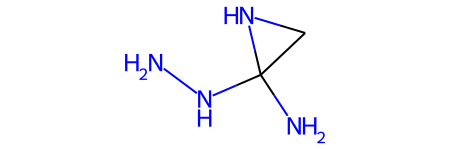

In [32]:
nmols[1]

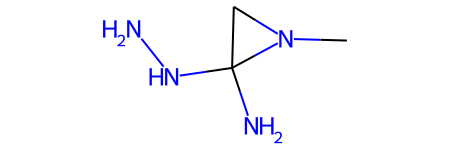

In [31]:
nmols[2]

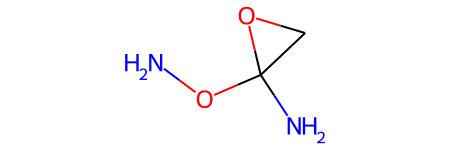

In [40]:
nmols[11]

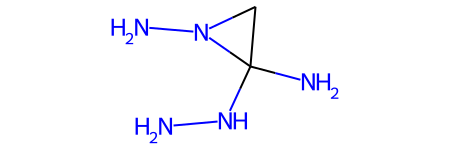

In [42]:
nmols[13]

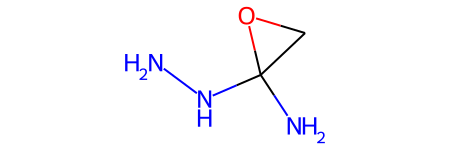

In [44]:
nmols[15]

In [92]:
nmols[63]

IndexError: list index out of range